In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import colors
from numpy.ma import masked_invalid
from time import time
from tqdm import tqdm

from util import decode_npy

In [2]:
# relevant constants
DF = pd.read_csv('../data/main_table.csv')
DF = DF.loc[DF.w_median.notnull()]
FIGURE_PATH = '../figures'

W_MEDIAN_COLNAME = 'w_median'
W_MEAN_COLNAME = 'w_mean'
SGW_COLNAME = 'w_rrms'
W_STD_COLNAME = 'w_std'

D_MEDIAN_COLNAME = 'D_median'
D_MEAN_COLNAME = 'D_mean'
SGD_COLNAME = 'D_rrms'
D_STD_COLNAME = 'D_std'

d_MEDIAN_COLNAME = 'd_median'
d_MEAN_COLNAME = 'd_mean'
SGd_COLNAME = 'd_rrms'
d_STD_COLNAME = 'd_std'

R_MAG_COLNAME = 'psfMag_r'
G_MAG_COLNAME = 'psfMag_g'
U_MAG_COLNAME = 'psfMag_u'

C_ORANGE  = '#e69f00'
C_BLUE    = '#56b4e9'
C_GREEN   = '#009e73'
C_BLACK   = '#000000'
C_PURPLE  = '#800080'

MIN_W, MAX_W = 0, 2
MIN_SGW, MAX_SGW = 0, 0.5
S = 40

In [3]:
# plot fontsize settings

SMALL_FONT_SIZE = 22
MEDIUM_FONT_SIZE = 28
LARGE_FONT_SIZE = 28

plt.rc('font', size=SMALL_FONT_SIZE)          # default text sizes
plt.rc('axes', titlesize=LARGE_FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_FONT_SIZE)   # fontsize of the figure title

In [4]:
is_nonvar = DF.nonvar_match_num == 1
is_var    = DF.var_match_num == 1
is_quasar = DF.quasar_match_num == 1

nonvar_subset = DF[is_nonvar & ~is_var & ~is_quasar]
var_subset    = DF[~is_nonvar & is_var & ~is_quasar]
quasar_subset = DF[~is_nonvar & ~is_var & is_quasar]
# ambi_subset   = DF[is_nonvar | is_var | is_quasar & ~(is_nonvar ^ is_var ^ is_quasar)]
none_subset   = DF[~is_nonvar & ~is_var & ~is_quasar]

In [9]:
RES = 100
bins_std = np.linspace(0, 0.5, RES)
bins_avg = np.linspace(0, 2, RES)

AN = 0.15
AV = 0.5

/tmp/ipykernel_134636/2713715026.py:29: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


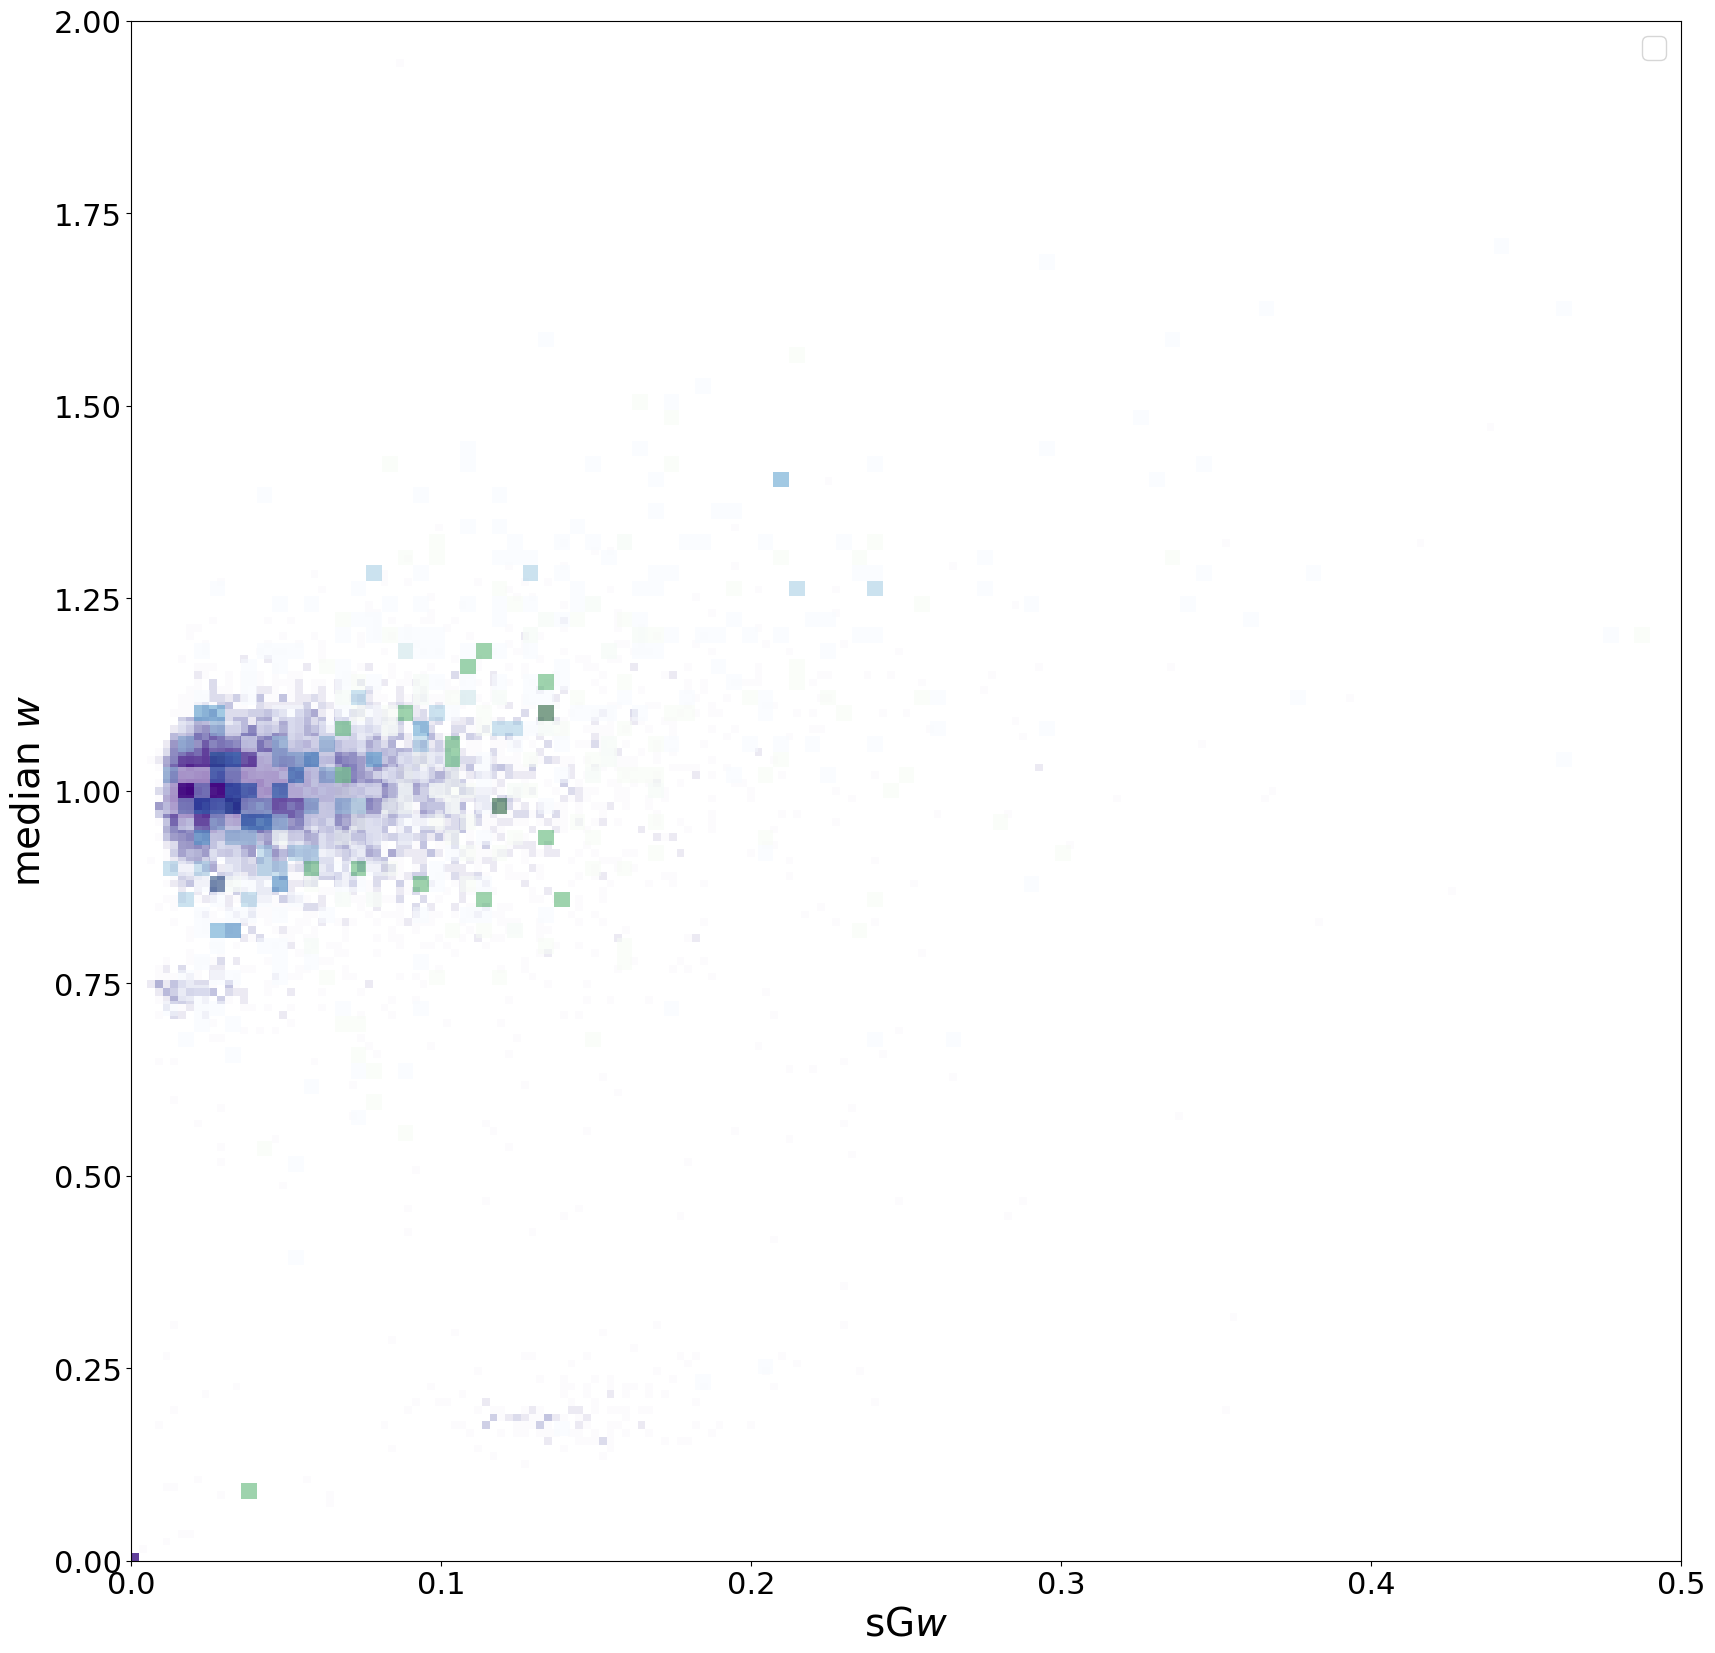

In [35]:
plt.figure(figsize=(20, 20))

plt.xlim(MIN_SGW, MAX_SGW)
plt.ylim(MIN_W, MAX_W)

plt.xlabel('sG$w$')
plt.ylabel('median $w$')

bins_std_nonvar = np.linspace(0, 0.5, RES*2)
bins_avg_nonvar = np.linspace(0, 2, RES*2)
hist_nonvar, _, _ = np.histogram2d(nonvar_subset[SGW_COLNAME], nonvar_subset[W_MEDIAN_COLNAME],
                                 bins=(bins_std_nonvar, bins_avg_nonvar))
hist_var, _, _    = np.histogram2d(var_subset[SGW_COLNAME], var_subset[W_MEDIAN_COLNAME],
                                 bins=(bins_std, bins_avg))
hist_quasar, _, _ = np.histogram2d(quasar_subset[SGW_COLNAME], quasar_subset[W_MEDIAN_COLNAME],
                                 bins=(bins_std, bins_avg))


plt.pcolormesh(bins_std_nonvar, bins_avg_nonvar, hist_nonvar.T, cmap='Purples', norm=colors.LogNorm(), alpha=1.0)
plt.pcolormesh(bins_std, bins_avg, hist_var.T,    cmap='Blues',   norm=colors.LogNorm(), alpha=0.5)
plt.pcolormesh(bins_std, bins_avg, hist_quasar.T, cmap='Greens',  norm=colors.LogNorm(), alpha=0.5)

# plt.scatter(nonvar_subset[SGW_COLNAME], nonvar_subset[W_MEDIAN_COLNAME], c=C_ORANGE,  s=S, label='nonvar')
# plt.scatter(var_subset[SGW_COLNAME],    var_subset[W_MEDIAN_COLNAME],    c=C_BLUE,    s=S, label='var')
# plt.scatter(quasar_subset[SGW_COLNAME], quasar_subset[W_MEDIAN_COLNAME], c=C_GREEN,   s=S, label='quasar')
# plt.scatter(ambi_subset[SGQ_COLNAME],   ambi_subset[Q_MEDIAN_COLNAME],   c=C_PURPLE,  s=S, label='ambiguous')
# plt.scatter(none_subset[SGQ_COLNAME],   none_subset[Q_MEDIAN_COLNAME],   c=C_BLACK,   s=S, label='unclassified')

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


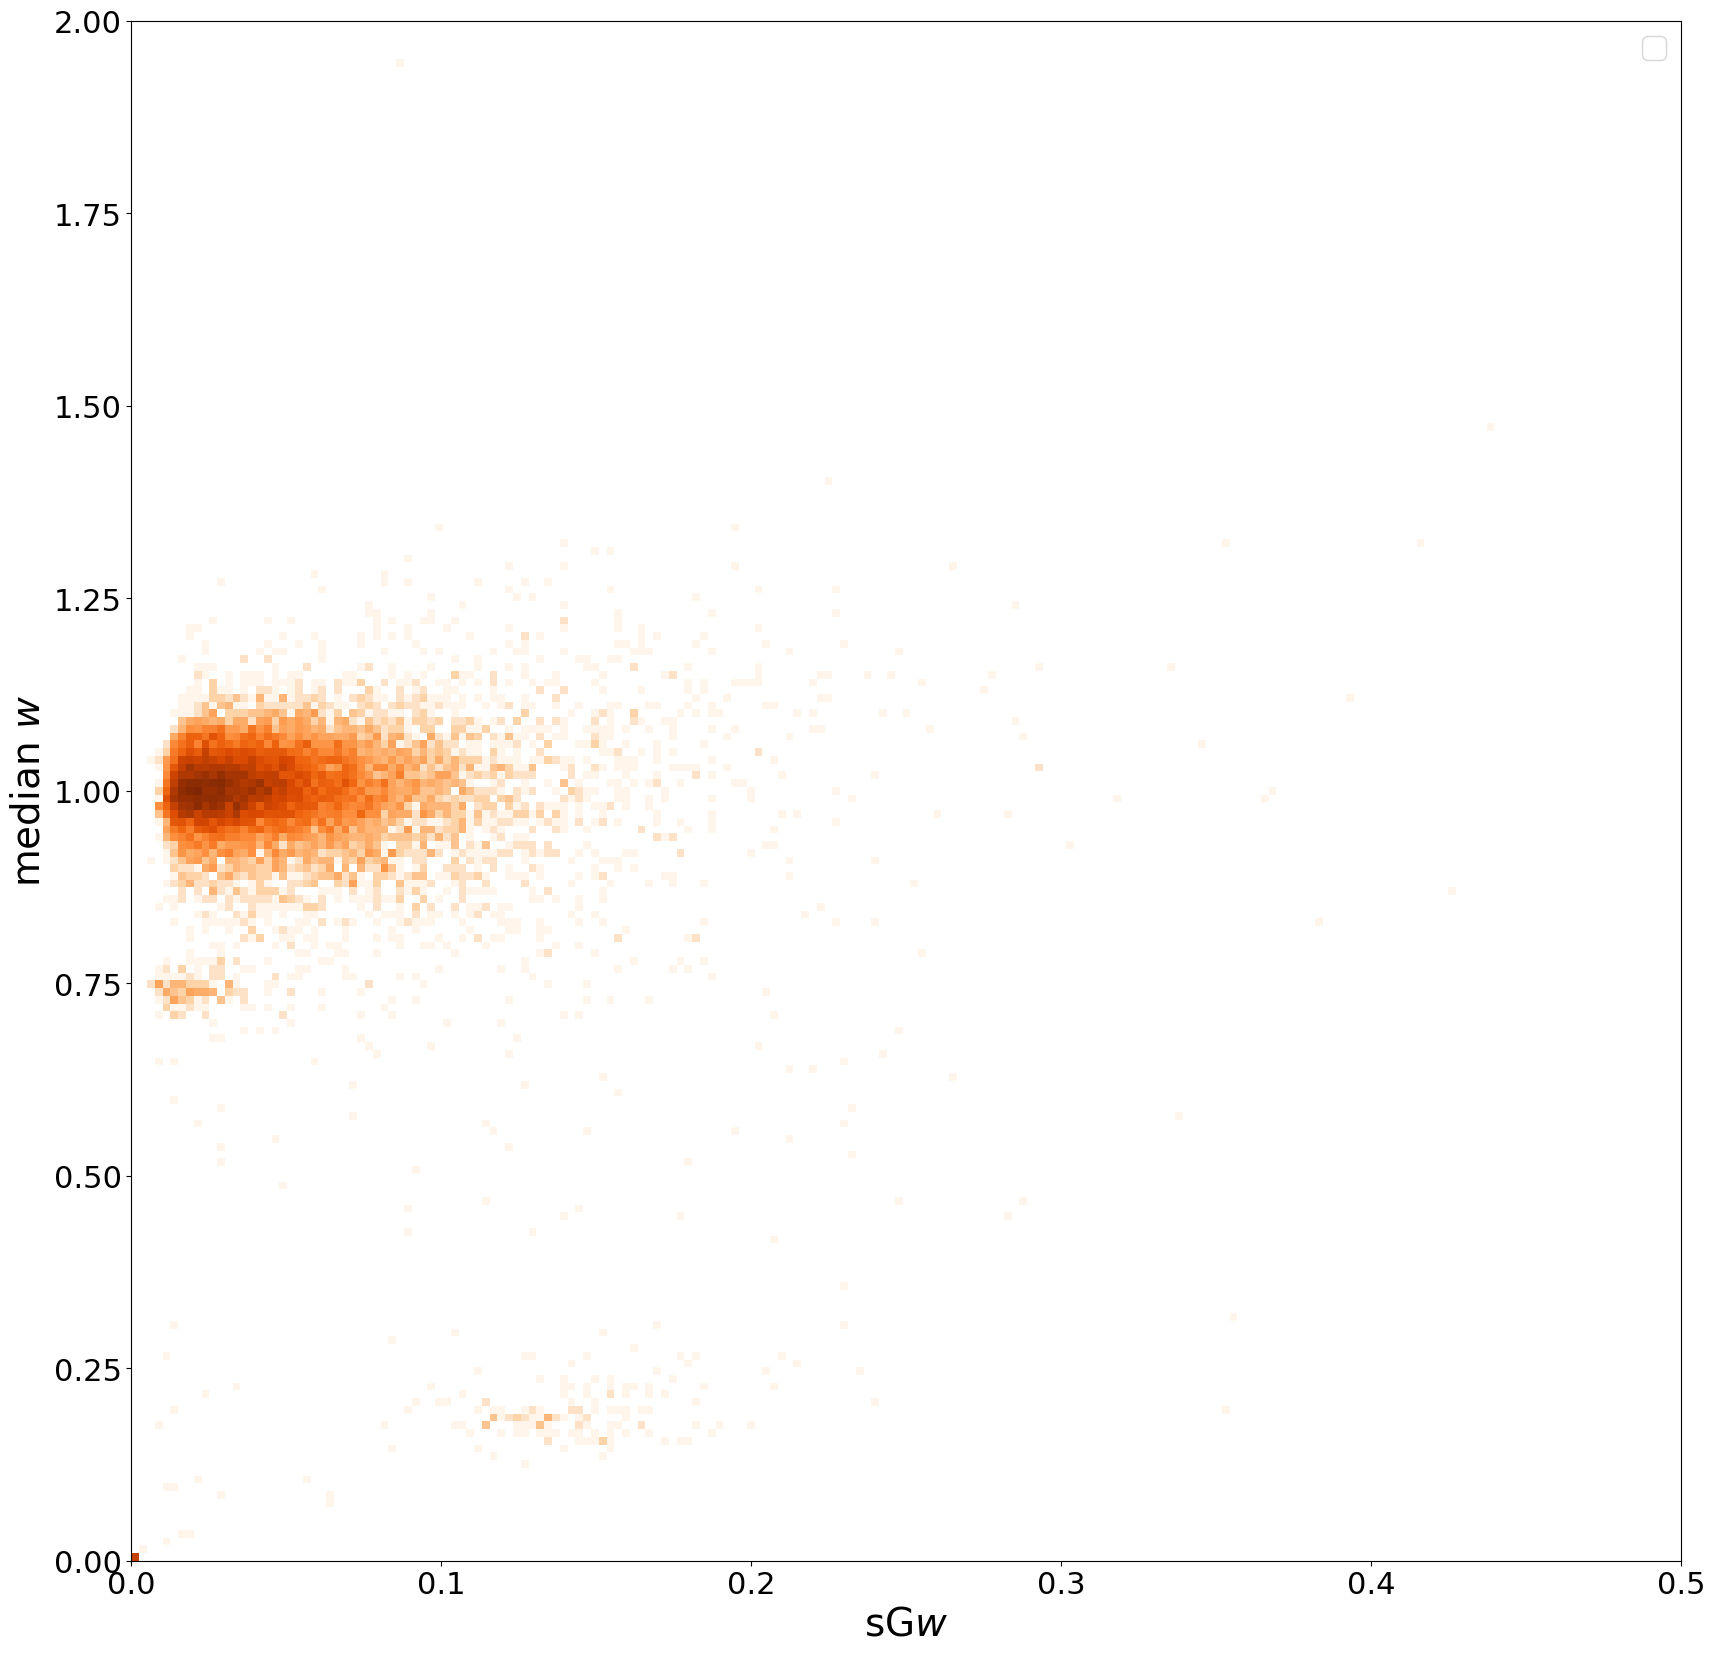

In [50]:
plt.figure(figsize=(20, 20))

plt.xlim(MIN_SGW, MAX_SGW)
plt.ylim(MIN_W, MAX_W)

plt.xlabel('sG$w$')
plt.ylabel('median $w$')

bins_std_nonvar = np.linspace(0, 0.5, RES*2)
bins_avg_nonvar = np.linspace(0, 2, RES*2)
hist_nonvar, _, _ = np.histogram2d(nonvar_subset[SGW_COLNAME], nonvar_subset[W_MEDIAN_COLNAME],
                                 bins=(bins_std_nonvar, bins_avg_nonvar))
hist_var, _, _    = np.histogram2d(var_subset[SGW_COLNAME], var_subset[W_MEDIAN_COLNAME],
                                 bins=(bins_std, bins_avg))
hist_quasar, _, _ = np.histogram2d(quasar_subset[SGW_COLNAME], quasar_subset[W_MEDIAN_COLNAME],
                                 bins=(bins_std, bins_avg))


plt.pcolormesh(bins_std_nonvar, bins_avg_nonvar, hist_nonvar.T, cmap='Oranges', norm=colors.LogNorm(), alpha=1.0)
# plt.pcolormesh(bins_std, bins_avg, hist_var.T,    cmap='Blues',   norm=colors.LogNorm(), alpha=0.5)
# plt.pcolormesh(bins_std, bins_avg, hist_quasar.T, cmap='Greens',  norm=colors.LogNorm(), alpha=0.5)

# plt.scatter(nonvar_subset[SGW_COLNAME], nonvar_subset[W_MEDIAN_COLNAME], c=C_ORANGE,  s=S, label='nonvar')
# plt.scatter(var_subset[SGW_COLNAME],    var_subset[W_MEDIAN_COLNAME],    c=C_BLUE,    s=S, label='var')
# plt.scatter(quasar_subset[SGW_COLNAME], quasar_subset[W_MEDIAN_COLNAME], c=C_GREEN,   s=S, label='quasar')
# plt.scatter(ambi_subset[SGQ_COLNAME],   ambi_subset[Q_MEDIAN_COLNAME],   c=C_PURPLE,  s=S, label='ambiguous')
# plt.scatter(none_subset[SGQ_COLNAME],   none_subset[Q_MEDIAN_COLNAME],   c=C_BLACK,   s=S, label='unclassified')

plt.legend()
plt.show()

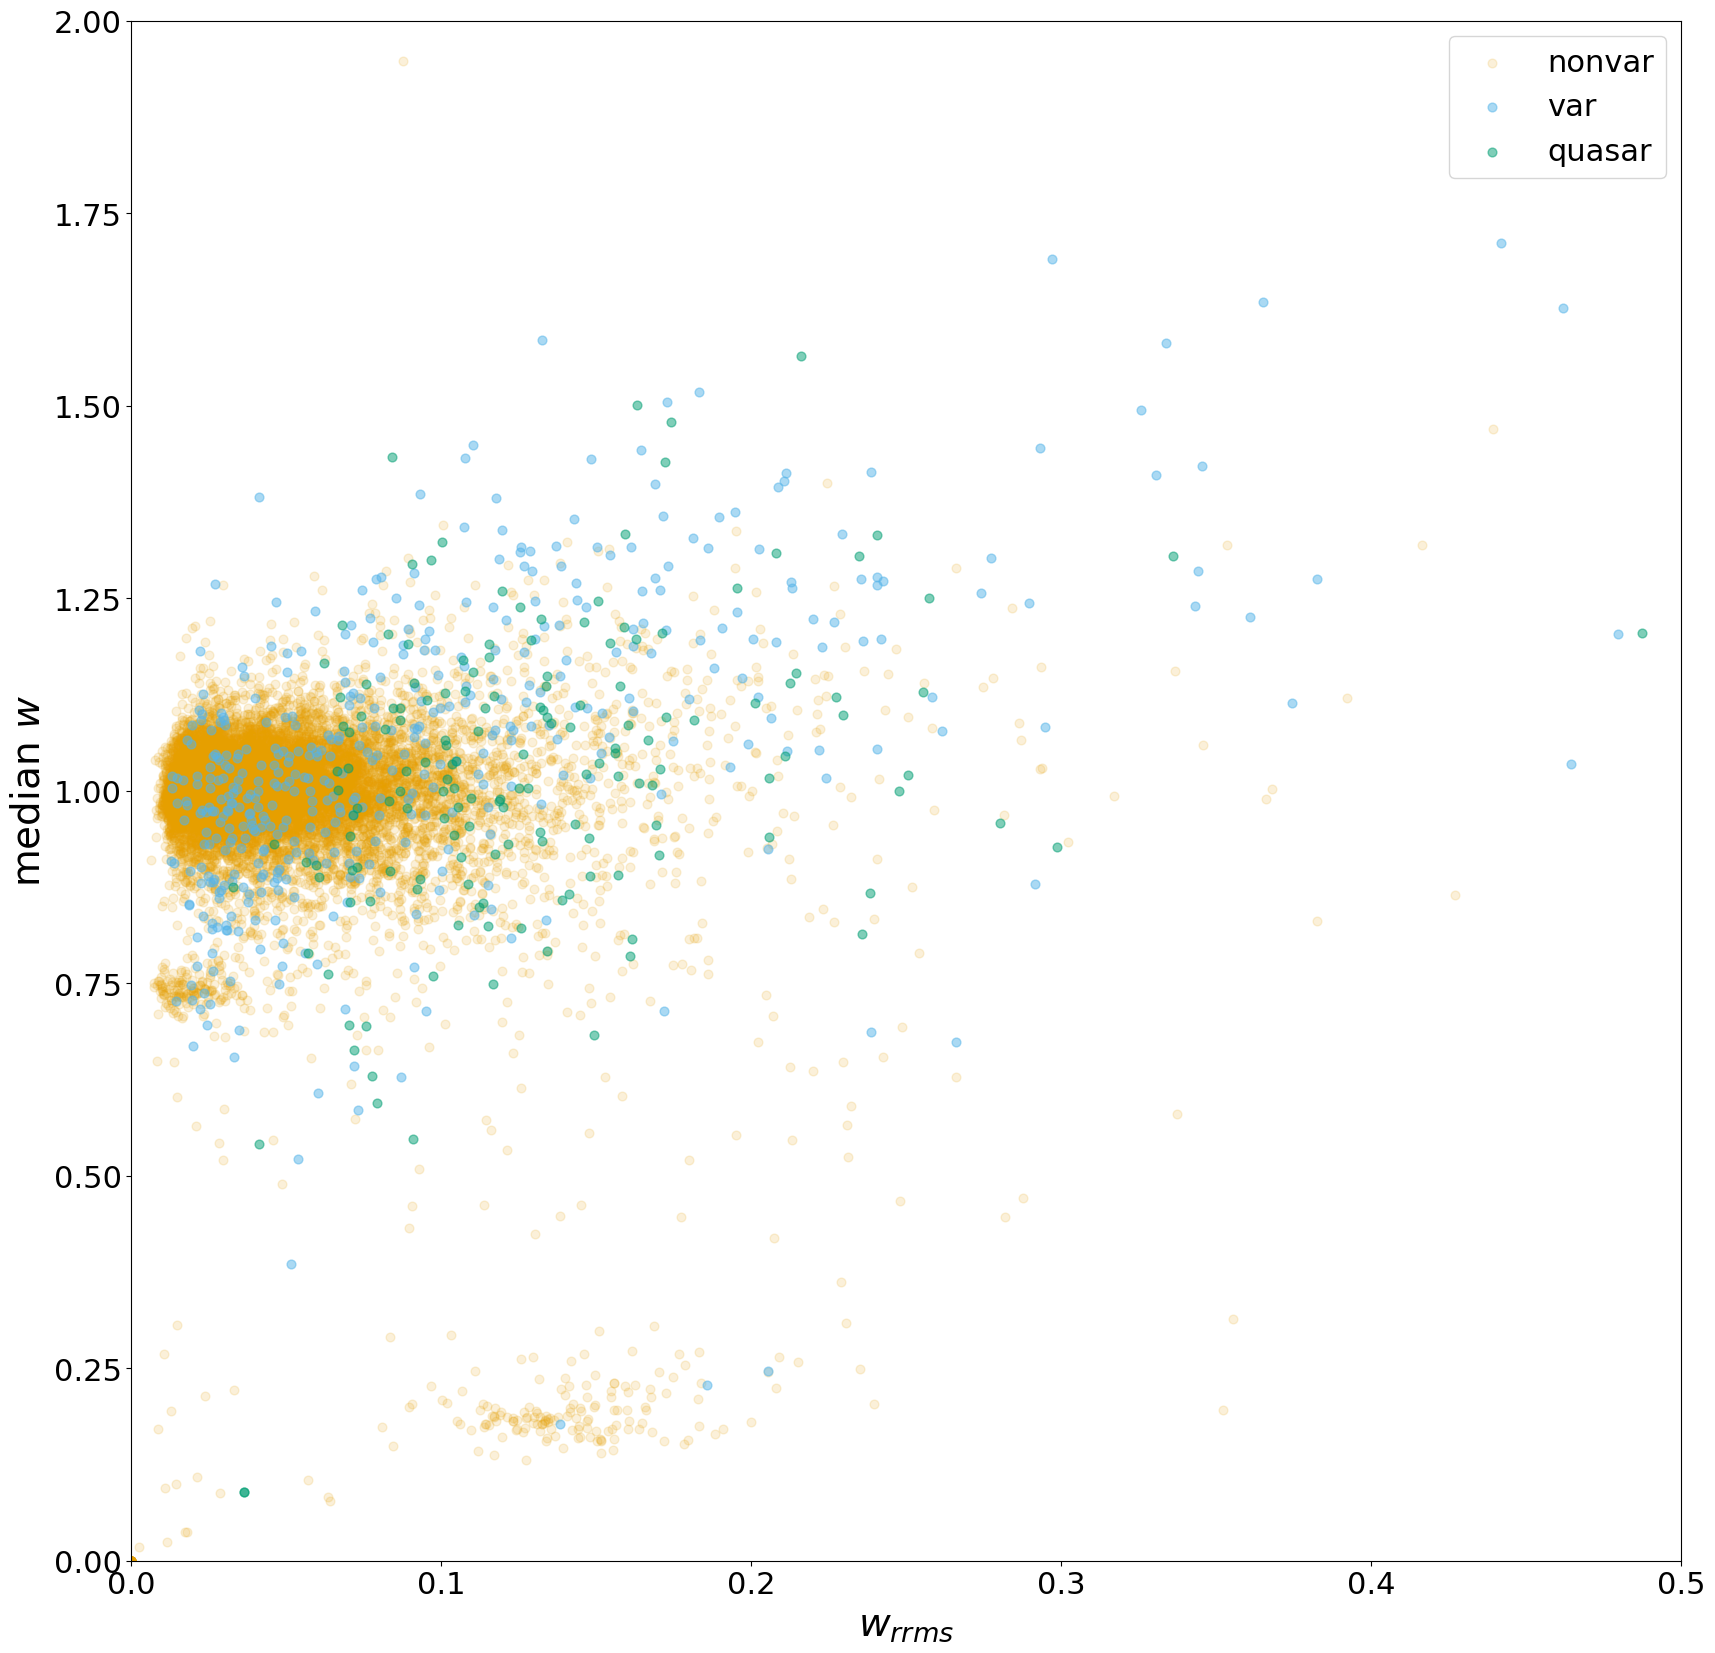

In [199]:
plt.figure(figsize=(20, 20))

plt.xlim(MIN_SGW, MAX_SGW)
plt.ylim(MIN_W, MAX_W)

plt.xlabel('$w_{rrms}$')
plt.ylabel('median $w$')

plt.scatter(nonvar_subset[SGW_COLNAME], nonvar_subset[W_MEDIAN_COLNAME], c=C_ORANGE, s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[SGW_COLNAME],    var_subset[W_MEDIAN_COLNAME],    c=C_BLUE,   s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[SGW_COLNAME], quasar_subset[W_MEDIAN_COLNAME], c=C_GREEN,  s=S, label='quasar', alpha=AV)
# plt.scatter(ambi_subset[SGQ_COLNAME],   ambi_subset[Q_MEDIAN_COLNAME],   c=C_PURPLE,  s=S, label='ambiguous')
# plt.scatter(none_subset[SGQ_COLNAME],   none_subset[Q_MEDIAN_COLNAME],   c=C_BLACK,   s=S, label='unclassified')

plt.legend()
plt.show()

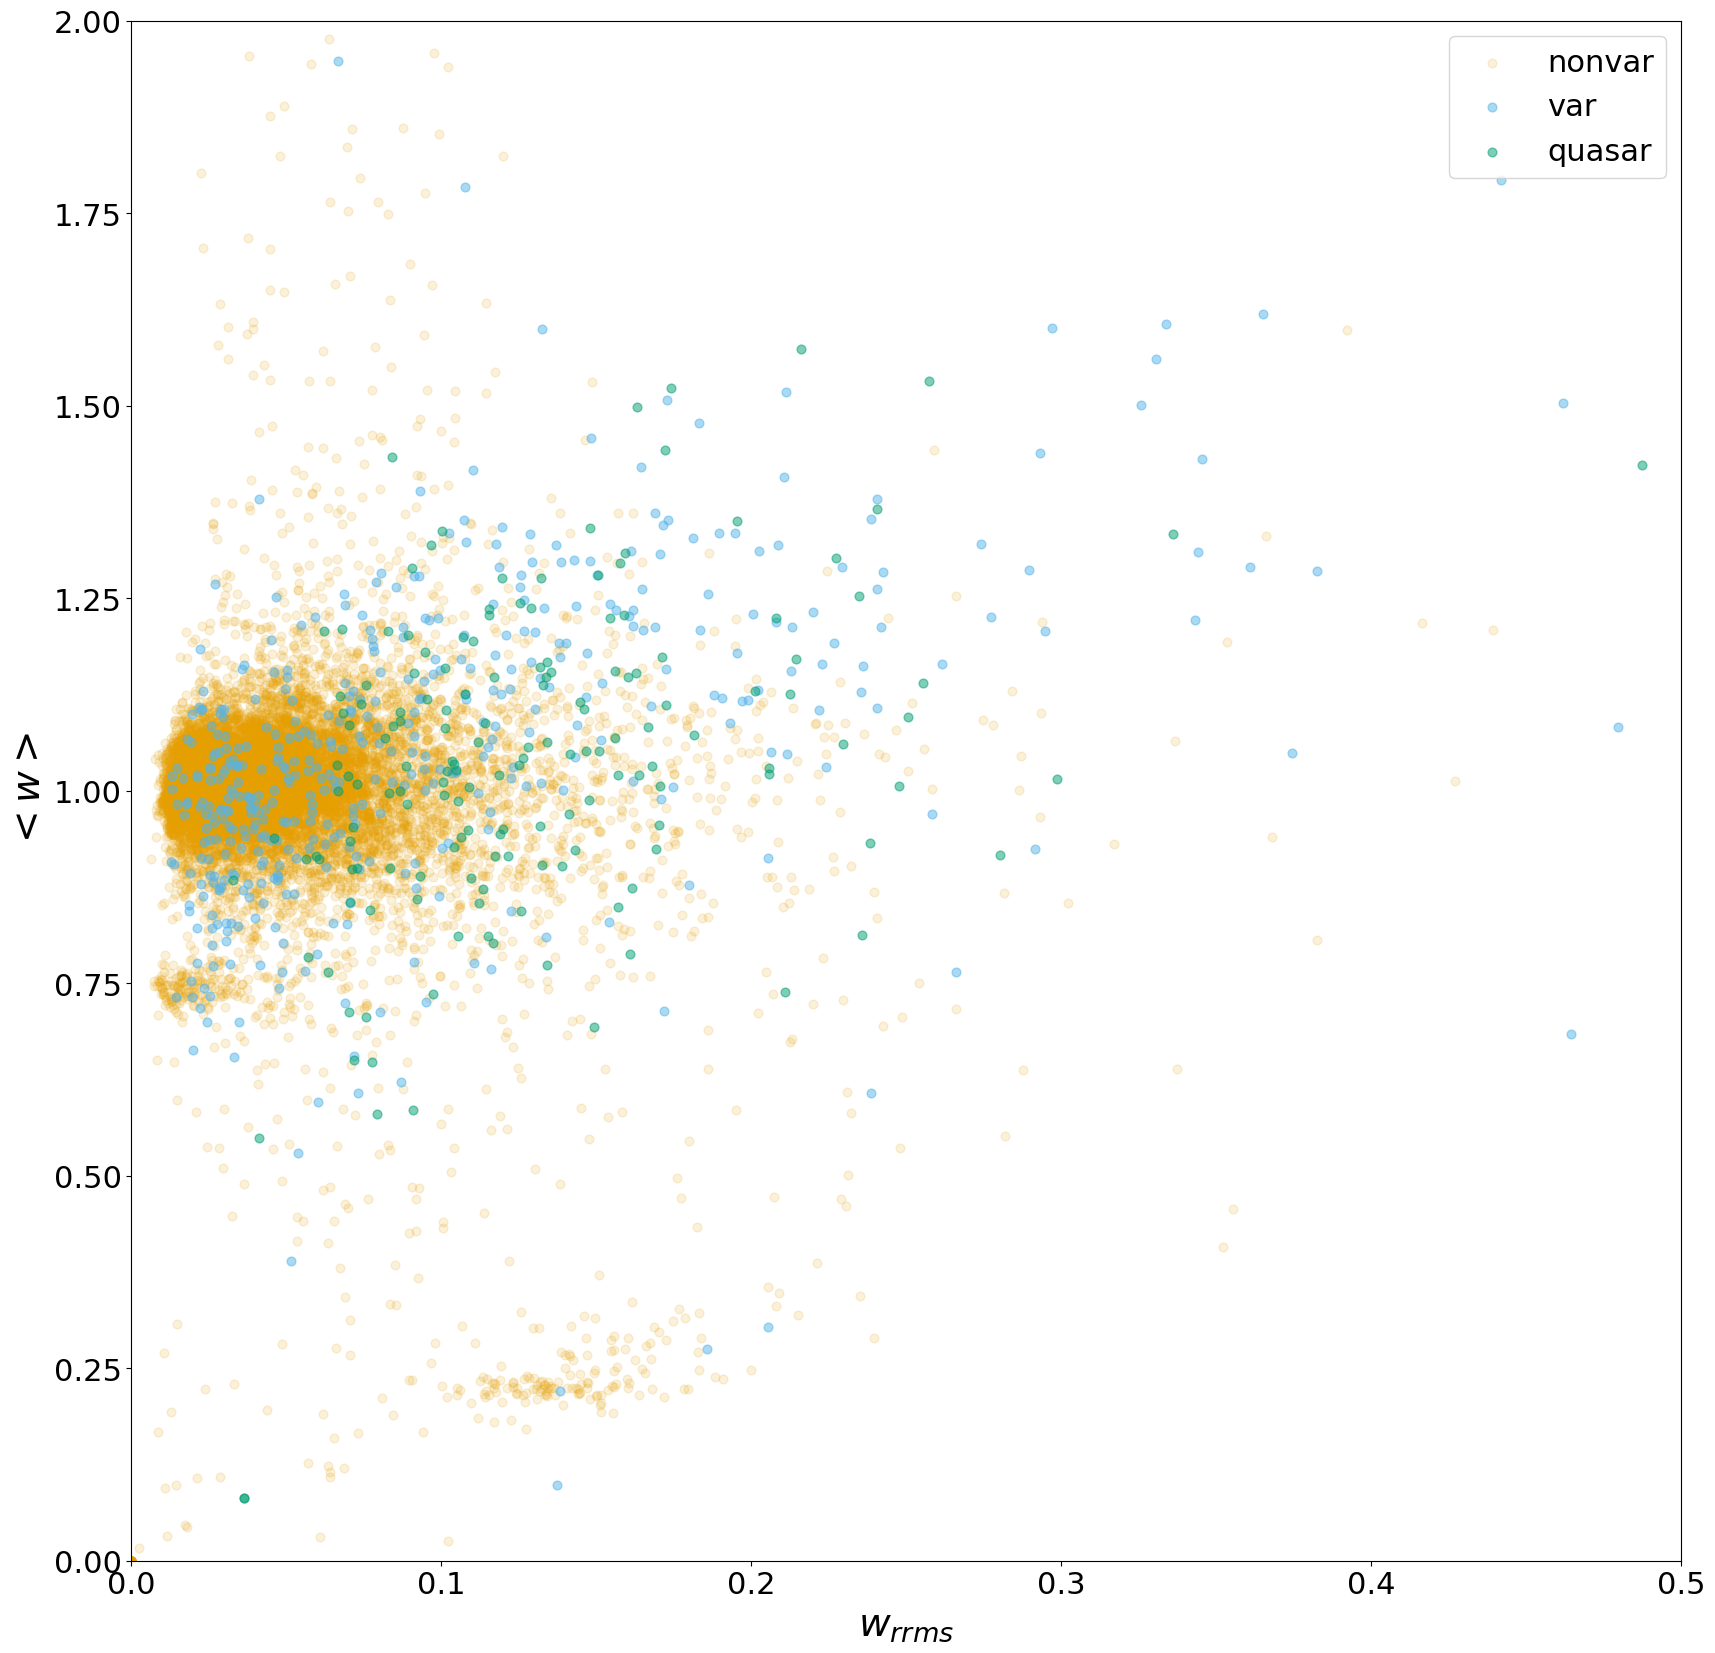

In [52]:
plt.figure(figsize=(20, 20))

plt.xlim(MIN_SGW, MAX_SGW)
plt.ylim(MIN_W, MAX_W)

plt.xlabel('$w_{rrms}$')
plt.ylabel('$<w>$')

plt.scatter(nonvar_subset[SGW_COLNAME], nonvar_subset[W_MEAN_COLNAME], c=C_ORANGE,  s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[SGW_COLNAME],    var_subset[W_MEAN_COLNAME],    c=C_BLUE,    s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[SGW_COLNAME], quasar_subset[W_MEAN_COLNAME], c=C_GREEN,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

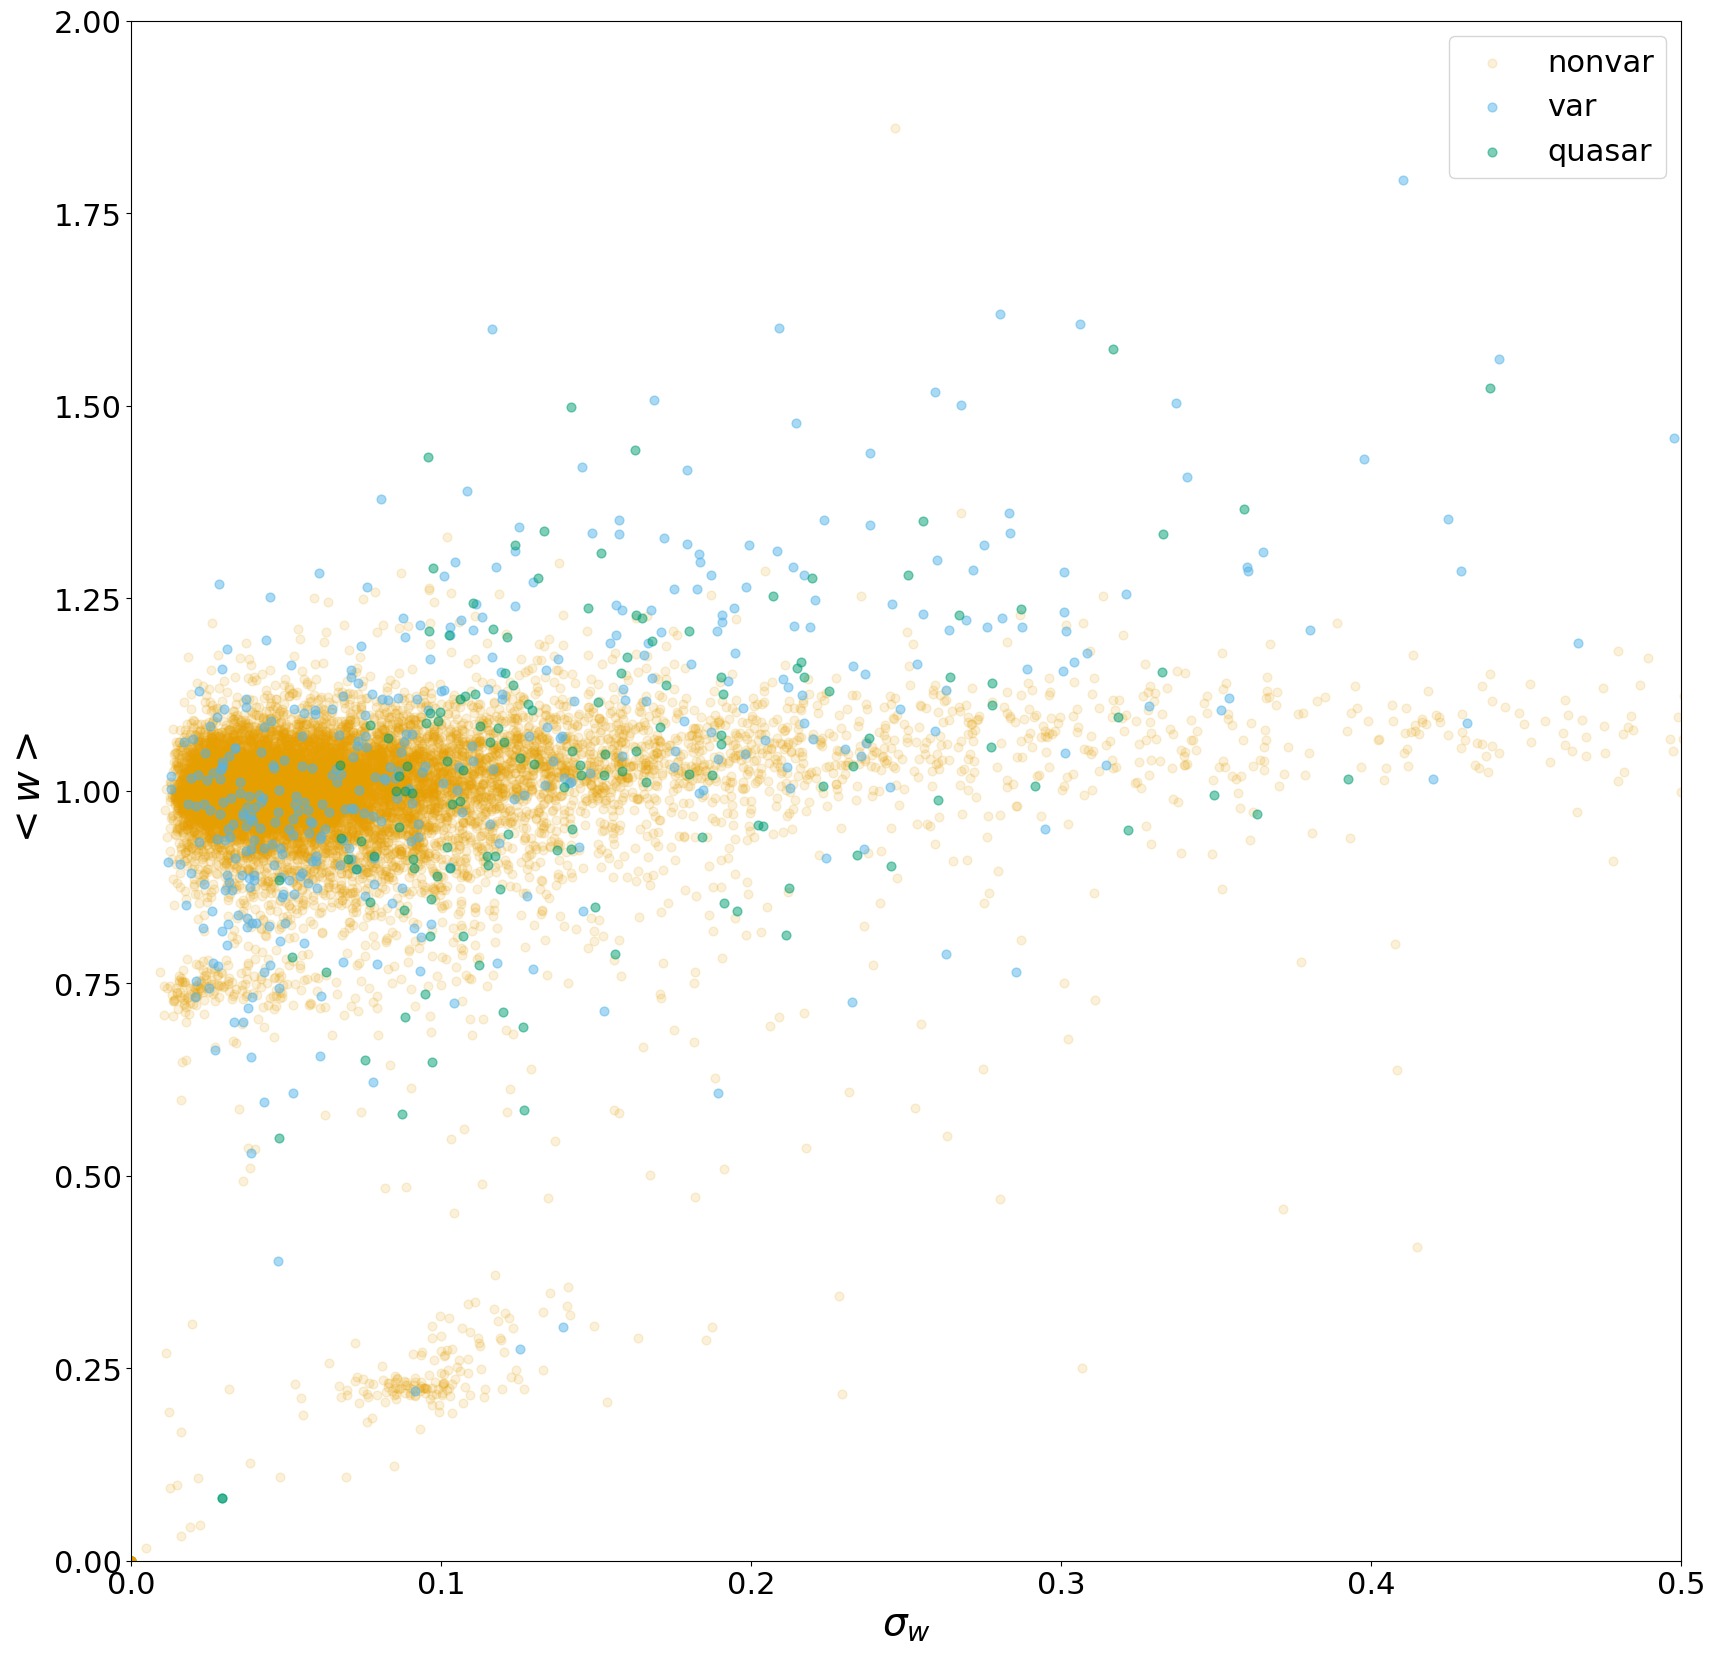

In [51]:
plt.figure(figsize=(20, 20))

plt.xlim(MIN_SGW, MAX_SGW)
plt.ylim(MIN_W, MAX_W)

plt.xlabel('$\\sigma_w$')
plt.ylabel('$<w>$')

plt.scatter(nonvar_subset[W_STD_COLNAME], nonvar_subset[W_MEAN_COLNAME], c=C_ORANGE,  s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[W_STD_COLNAME],    var_subset[W_MEAN_COLNAME],    c=C_BLUE,    s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[W_STD_COLNAME], quasar_subset[W_MEAN_COLNAME], c=C_GREEN,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

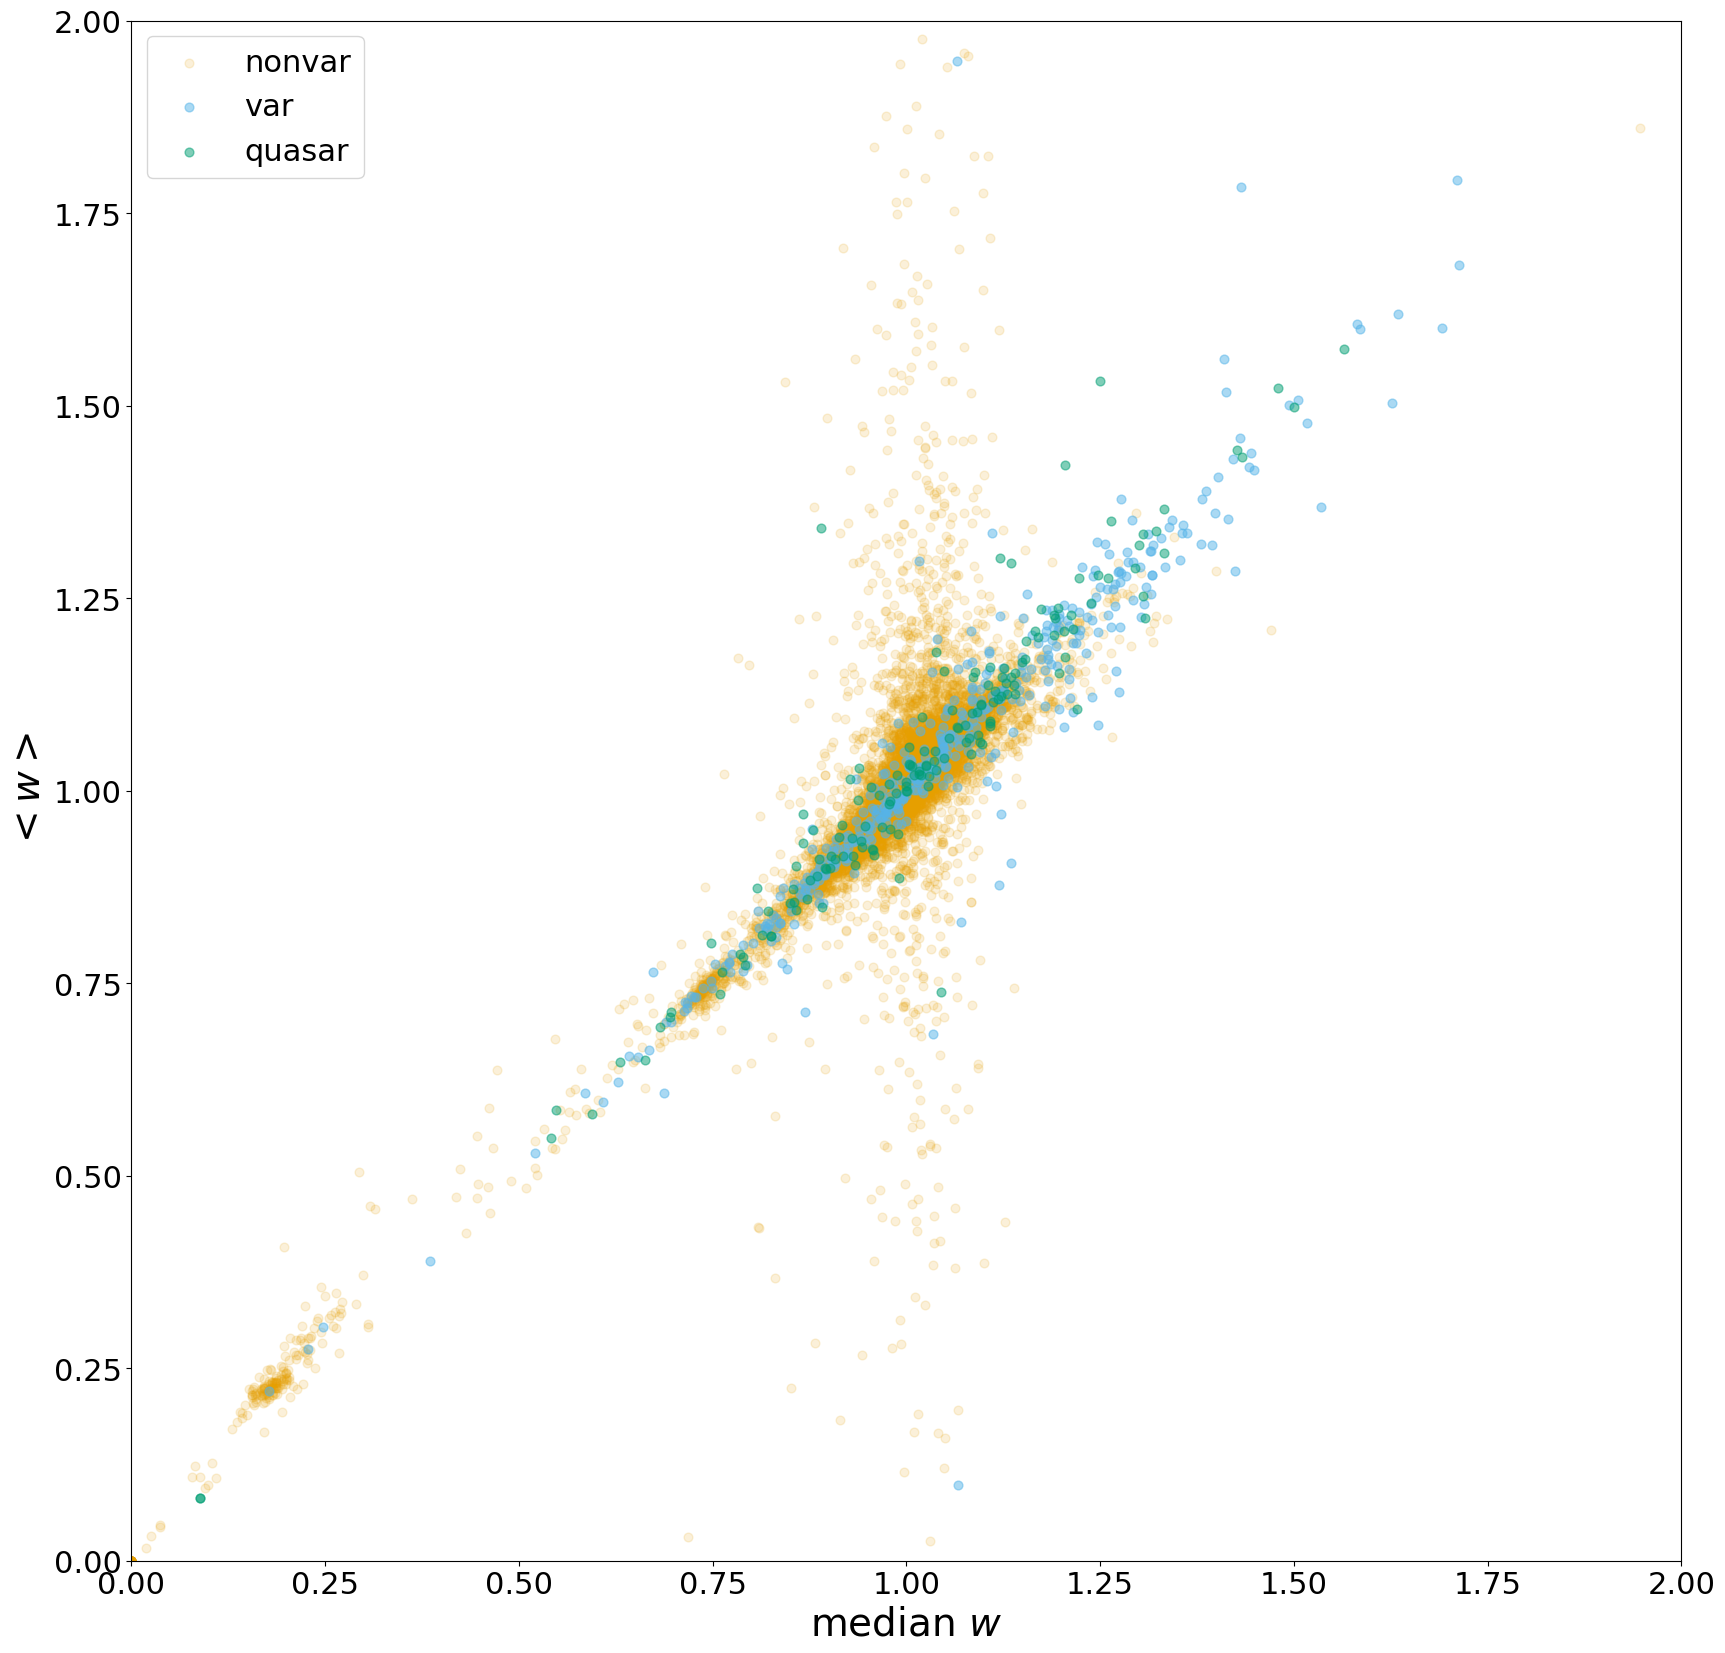

In [53]:
plt.figure(figsize=(20, 20))

plt.xlim(MIN_W, MAX_W)
plt.ylim(MIN_W, MAX_W)

plt.xlabel('median $w$')
plt.ylabel('$<w>$')

plt.scatter(nonvar_subset[W_MEDIAN_COLNAME], nonvar_subset[W_MEAN_COLNAME], c=C_ORANGE,  s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[W_MEDIAN_COLNAME],    var_subset[W_MEAN_COLNAME],    c=C_BLUE,    s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[W_MEDIAN_COLNAME], quasar_subset[W_MEAN_COLNAME], c=C_GREEN,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

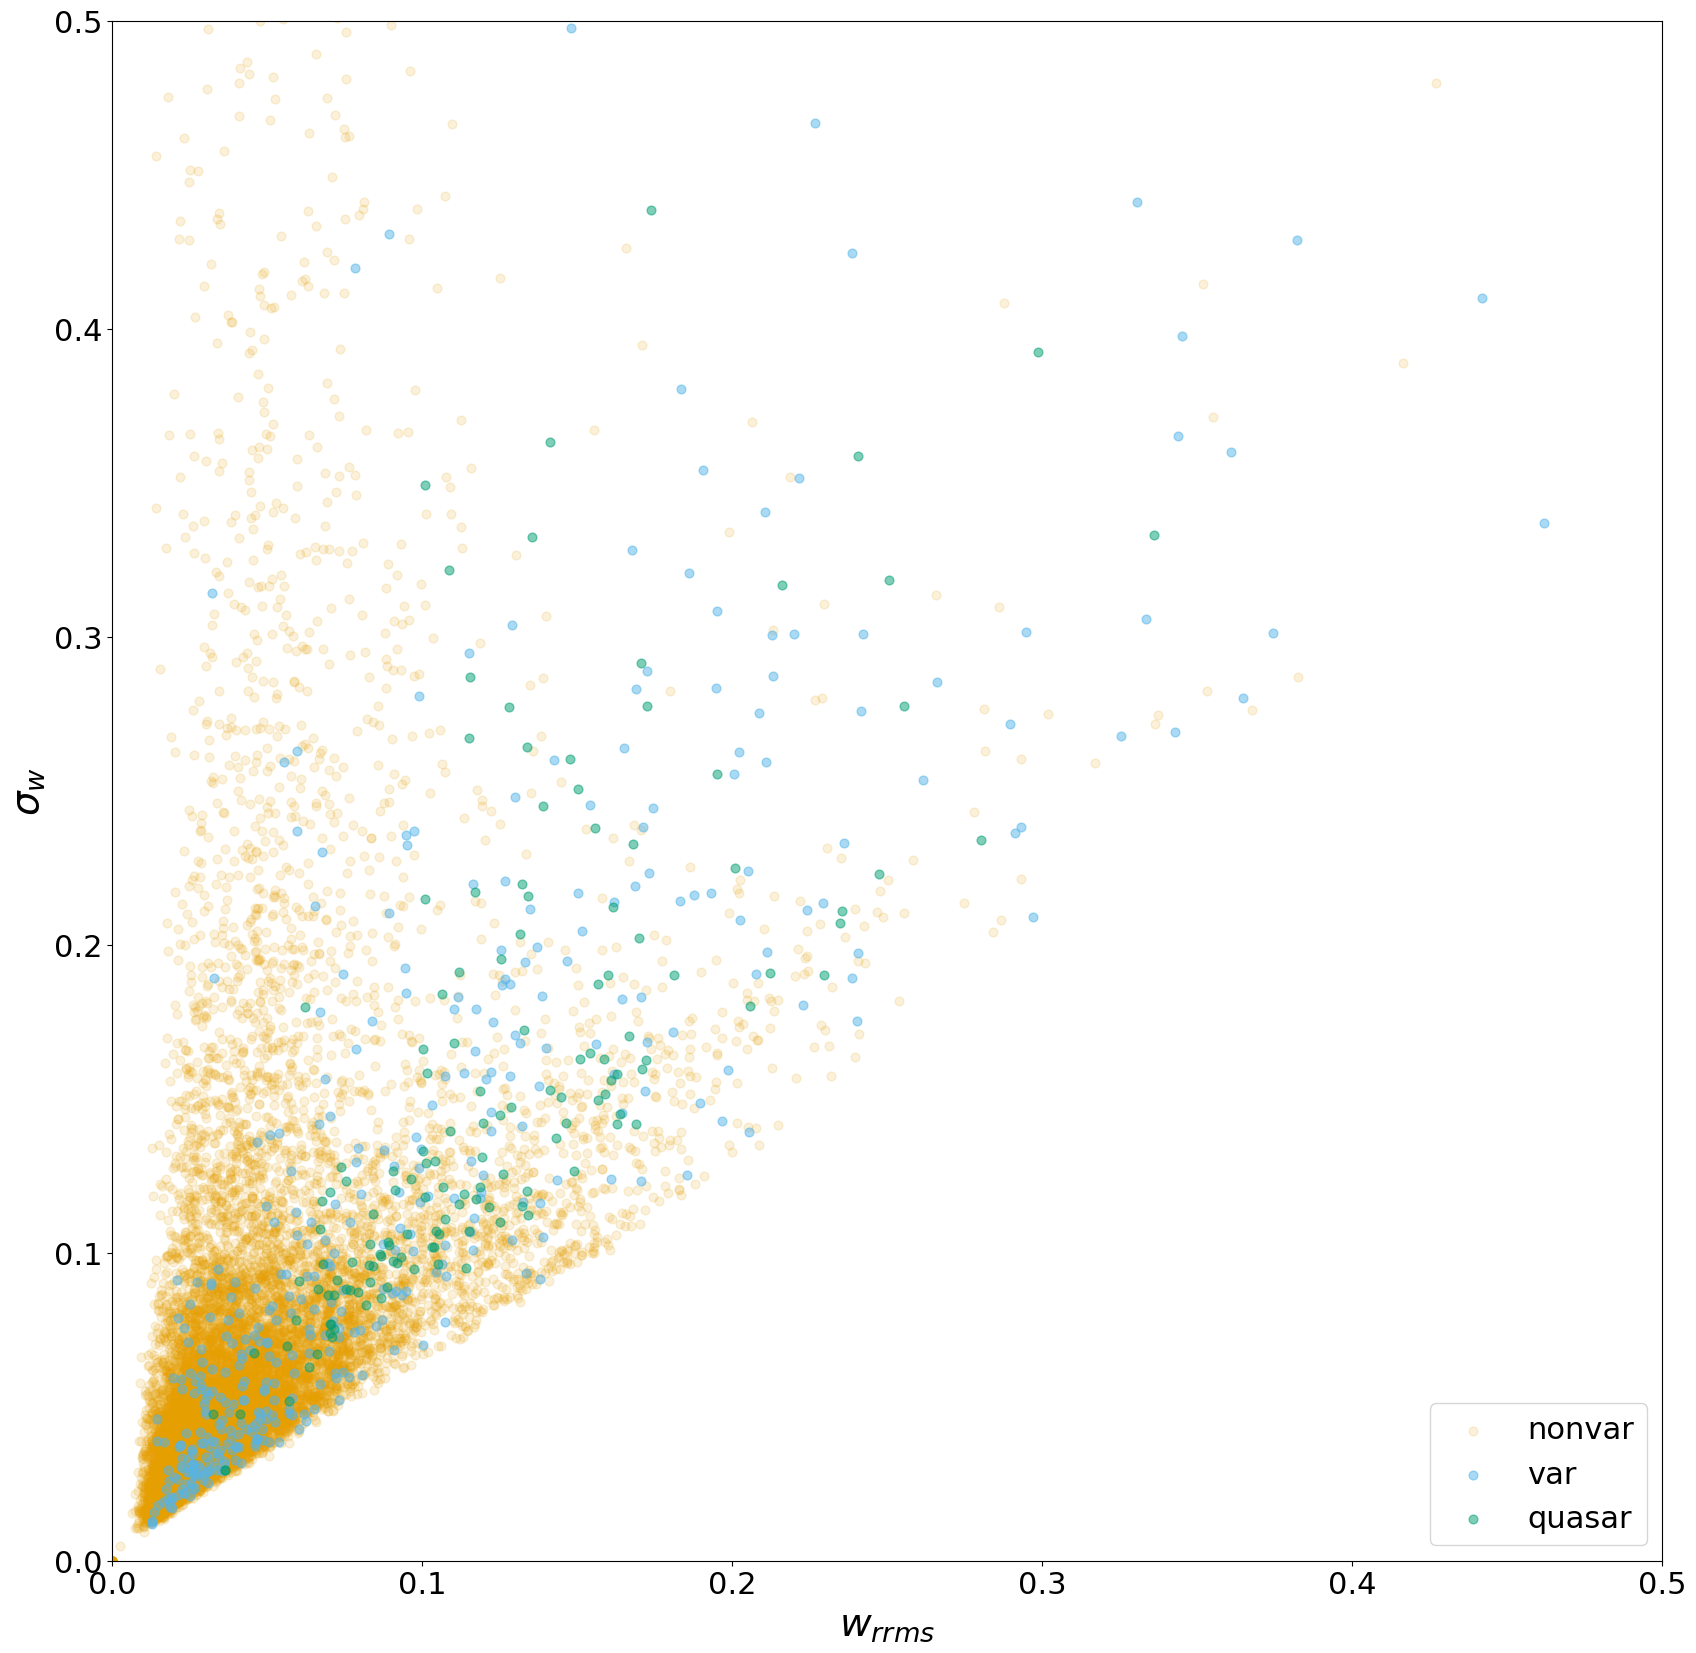

In [230]:
plt.figure(figsize=(20, 20))

plt.xlim(MIN_SGW, MAX_SGW)
plt.ylim(MIN_SGW, MAX_SGW)

plt.xlabel('$w_{rrms}$')
plt.ylabel('$\\sigma_w$')

plt.scatter(nonvar_subset[SGW_COLNAME], nonvar_subset[W_STD_COLNAME], c=C_ORANGE,  s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[SGW_COLNAME],    var_subset[W_STD_COLNAME],    c=C_BLUE,    s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[SGW_COLNAME], quasar_subset[W_STD_COLNAME], c=C_GREEN,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

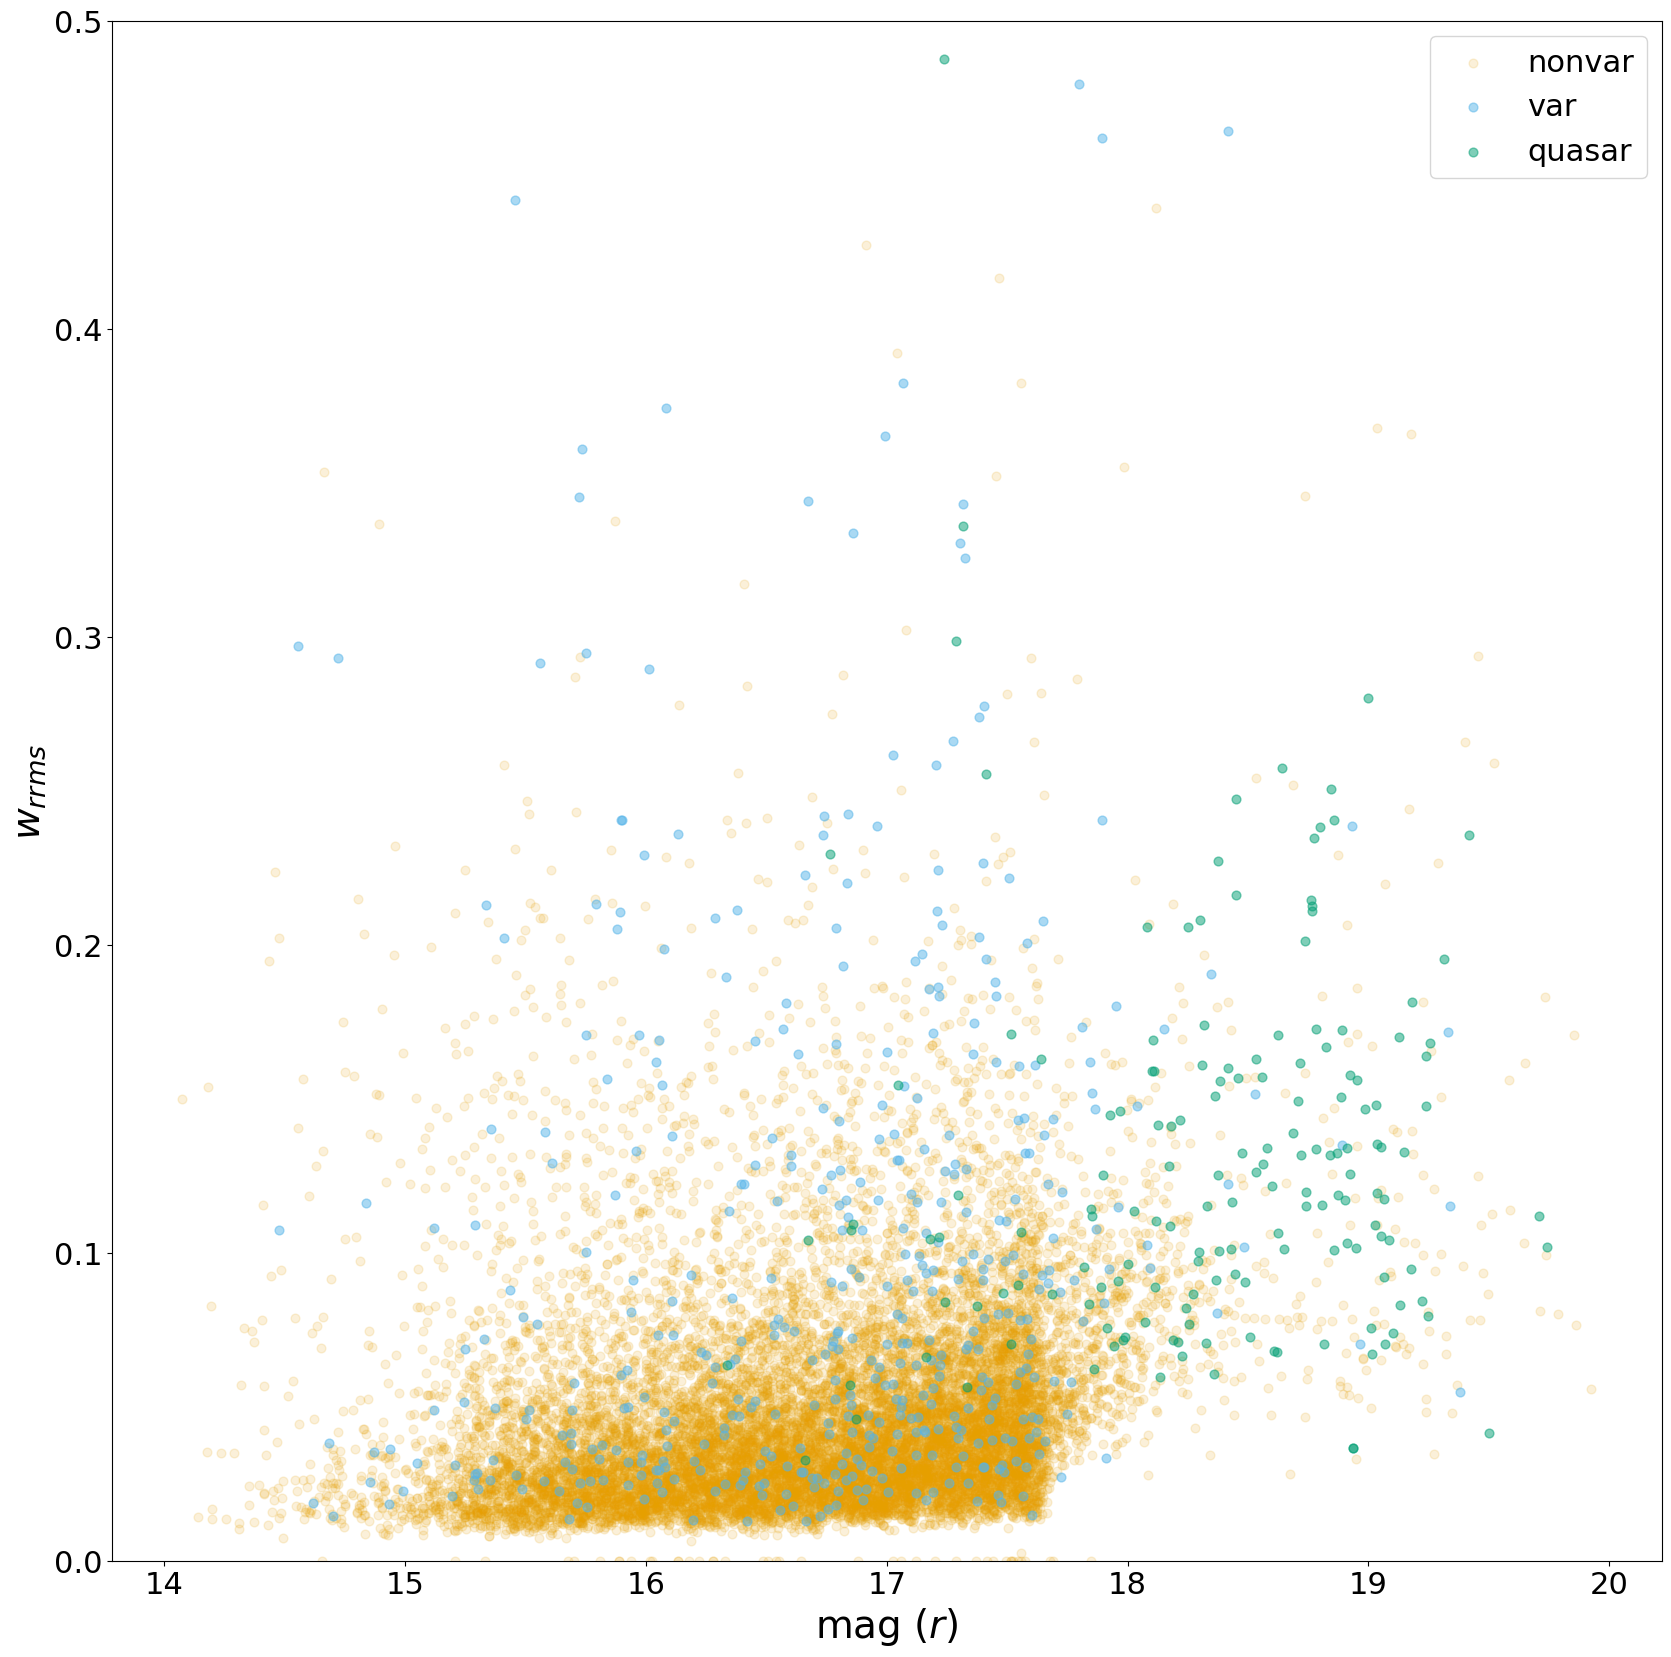

In [55]:
plt.figure(figsize=(20, 20))

plt.ylim(MIN_SGW, MAX_SGW)

plt.xlabel('mag ($r$)')
plt.ylabel('$w_{rrms}$')

plt.scatter(nonvar_subset[R_MAG_COLNAME], nonvar_subset[SGW_COLNAME], c=C_ORANGE,  s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[R_MAG_COLNAME],    var_subset[SGW_COLNAME],    c=C_BLUE,    s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[R_MAG_COLNAME], quasar_subset[SGW_COLNAME], c=C_GREEN,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

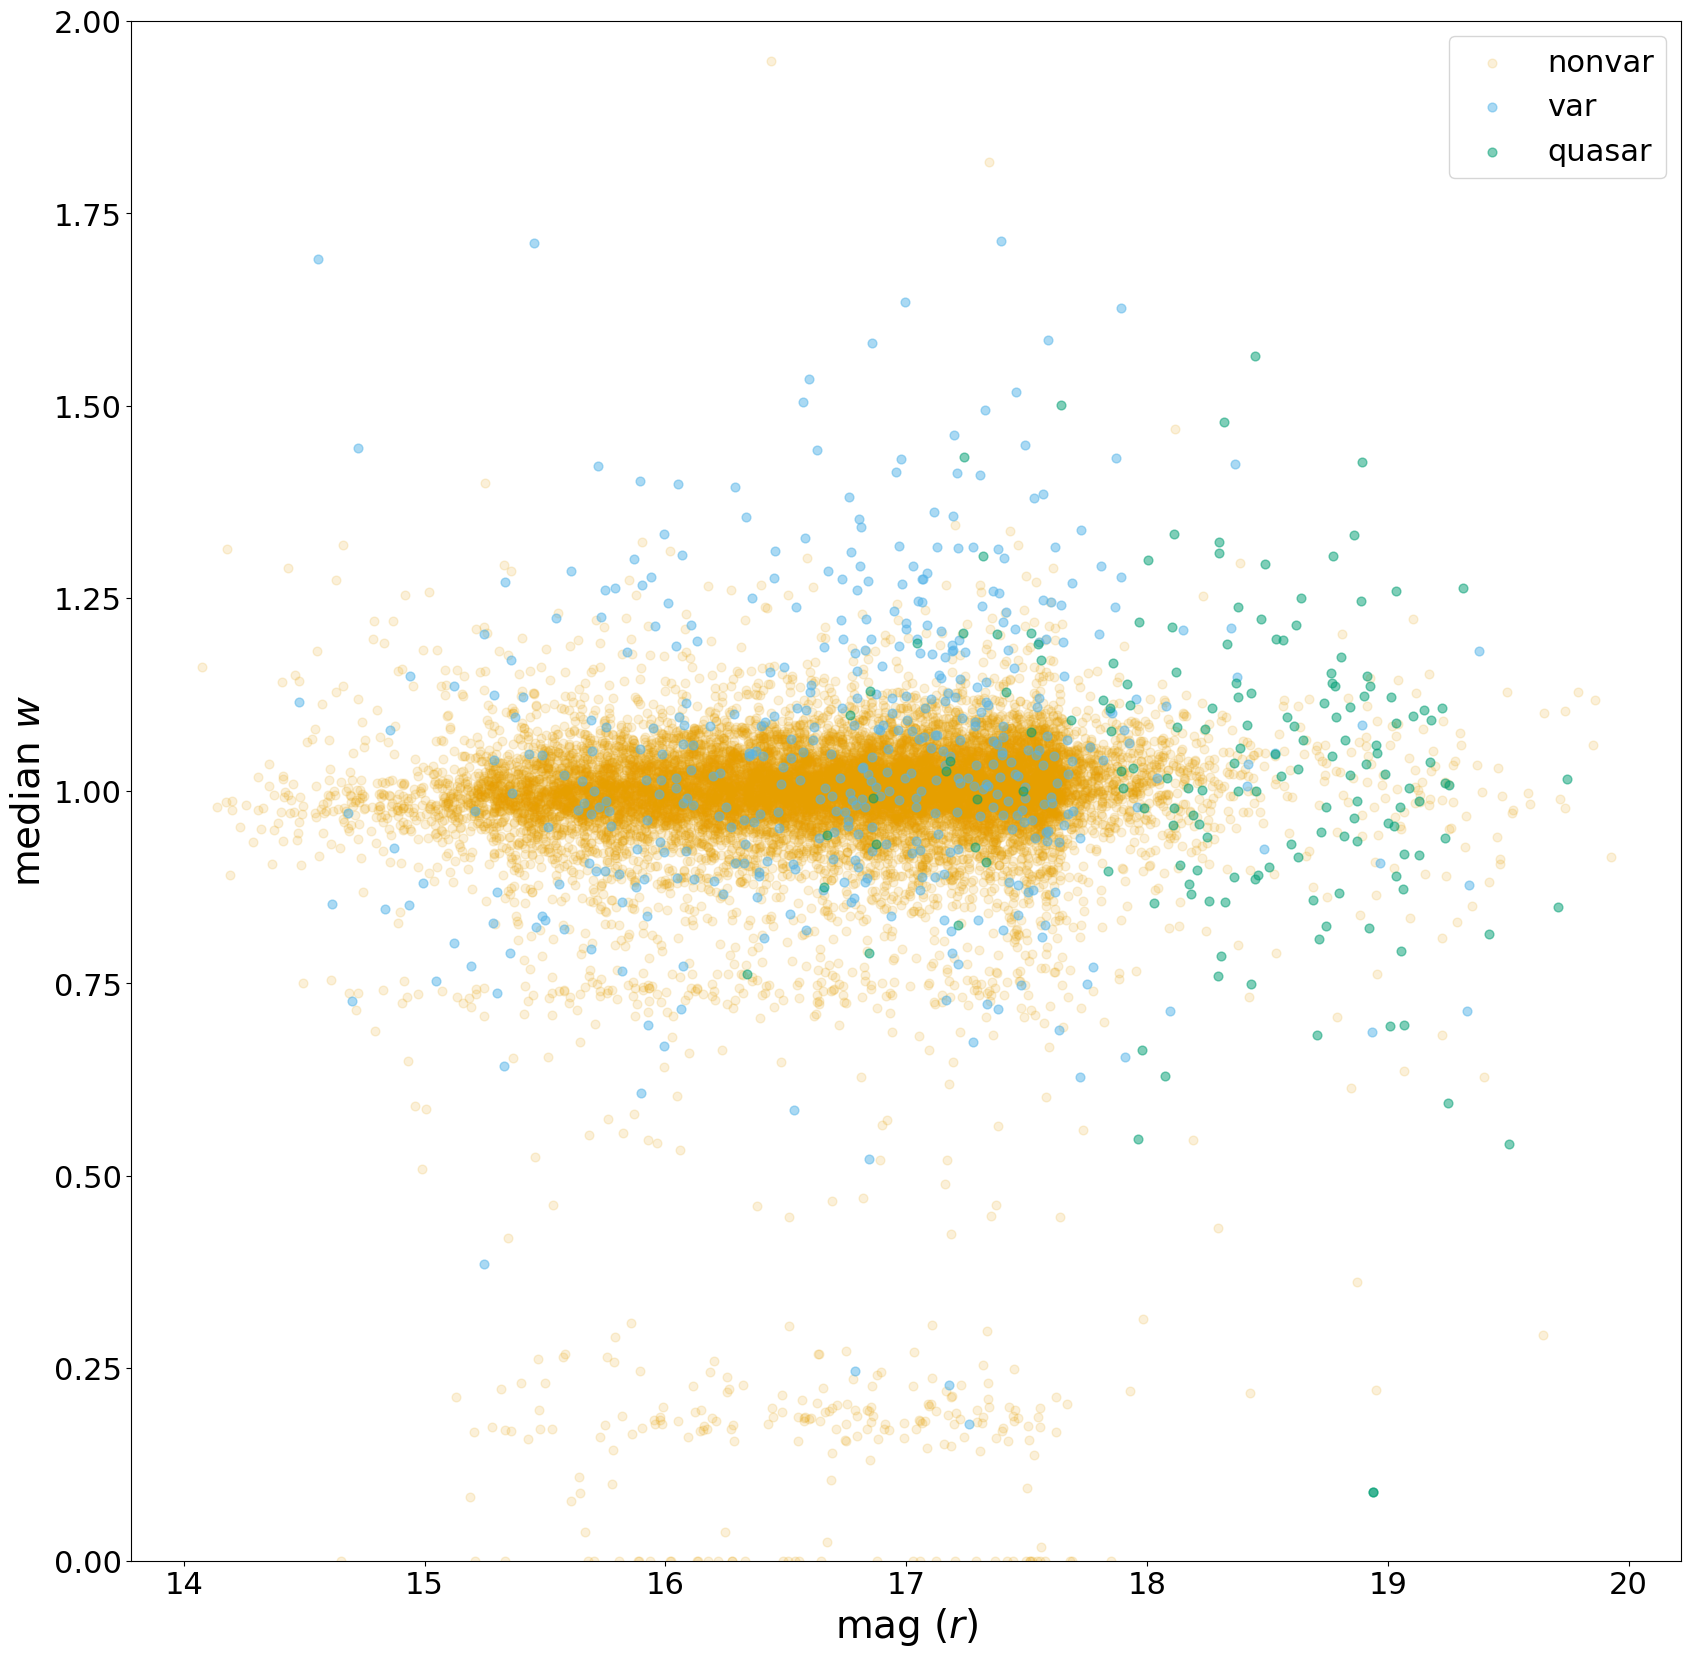

In [56]:
plt.figure(figsize=(20, 20))

plt.ylim(MIN_W, MAX_W)

plt.xlabel('mag ($r$)')
plt.ylabel('median $w$')

plt.scatter(nonvar_subset[R_MAG_COLNAME], nonvar_subset[W_MEDIAN_COLNAME], c=C_ORANGE,  s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[R_MAG_COLNAME],    var_subset[W_MEDIAN_COLNAME],    c=C_BLUE,    s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[R_MAG_COLNAME], quasar_subset[W_MEDIAN_COLNAME], c=C_GREEN,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


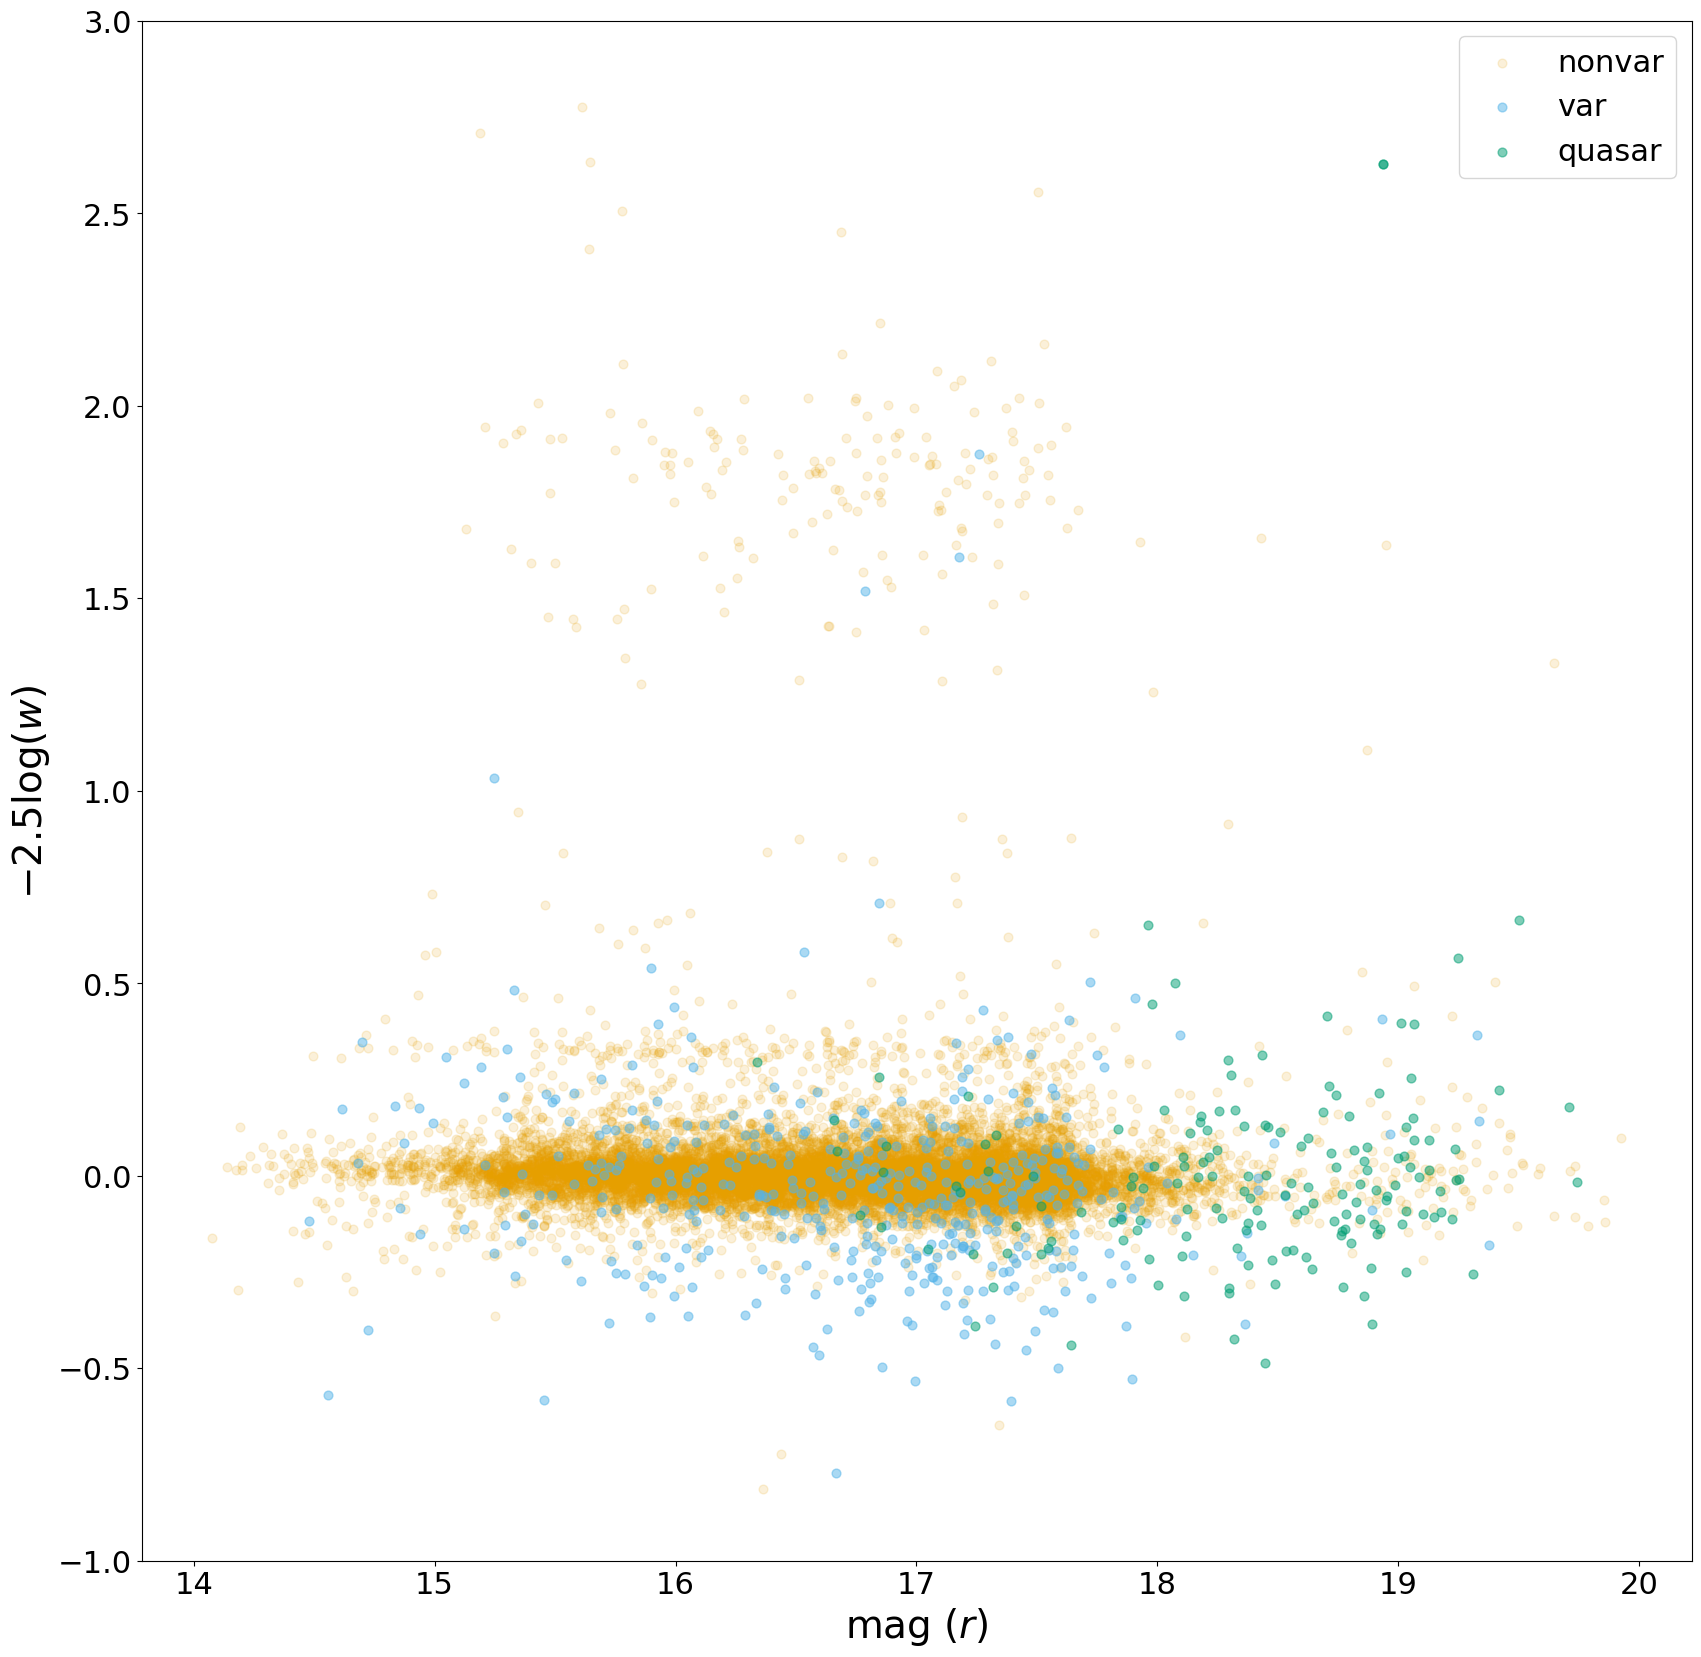

In [159]:
plt.figure(figsize=(20, 20))

plt.ylim(-1, 3)

plt.xlabel('mag ($r$)')
plt.ylabel('$-2.5 \\log(w)$')

m = lambda x: -2.5 * np.log10(x)

plt.scatter(nonvar_subset[R_MAG_COLNAME], m(nonvar_subset[W_MEDIAN_COLNAME]), c=C_ORANGE,  s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[R_MAG_COLNAME],    m(var_subset[W_MEDIAN_COLNAME]),    c=C_BLUE,    s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[R_MAG_COLNAME], m(quasar_subset[W_MEDIAN_COLNAME]), c=C_GREEN,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

# \Delta

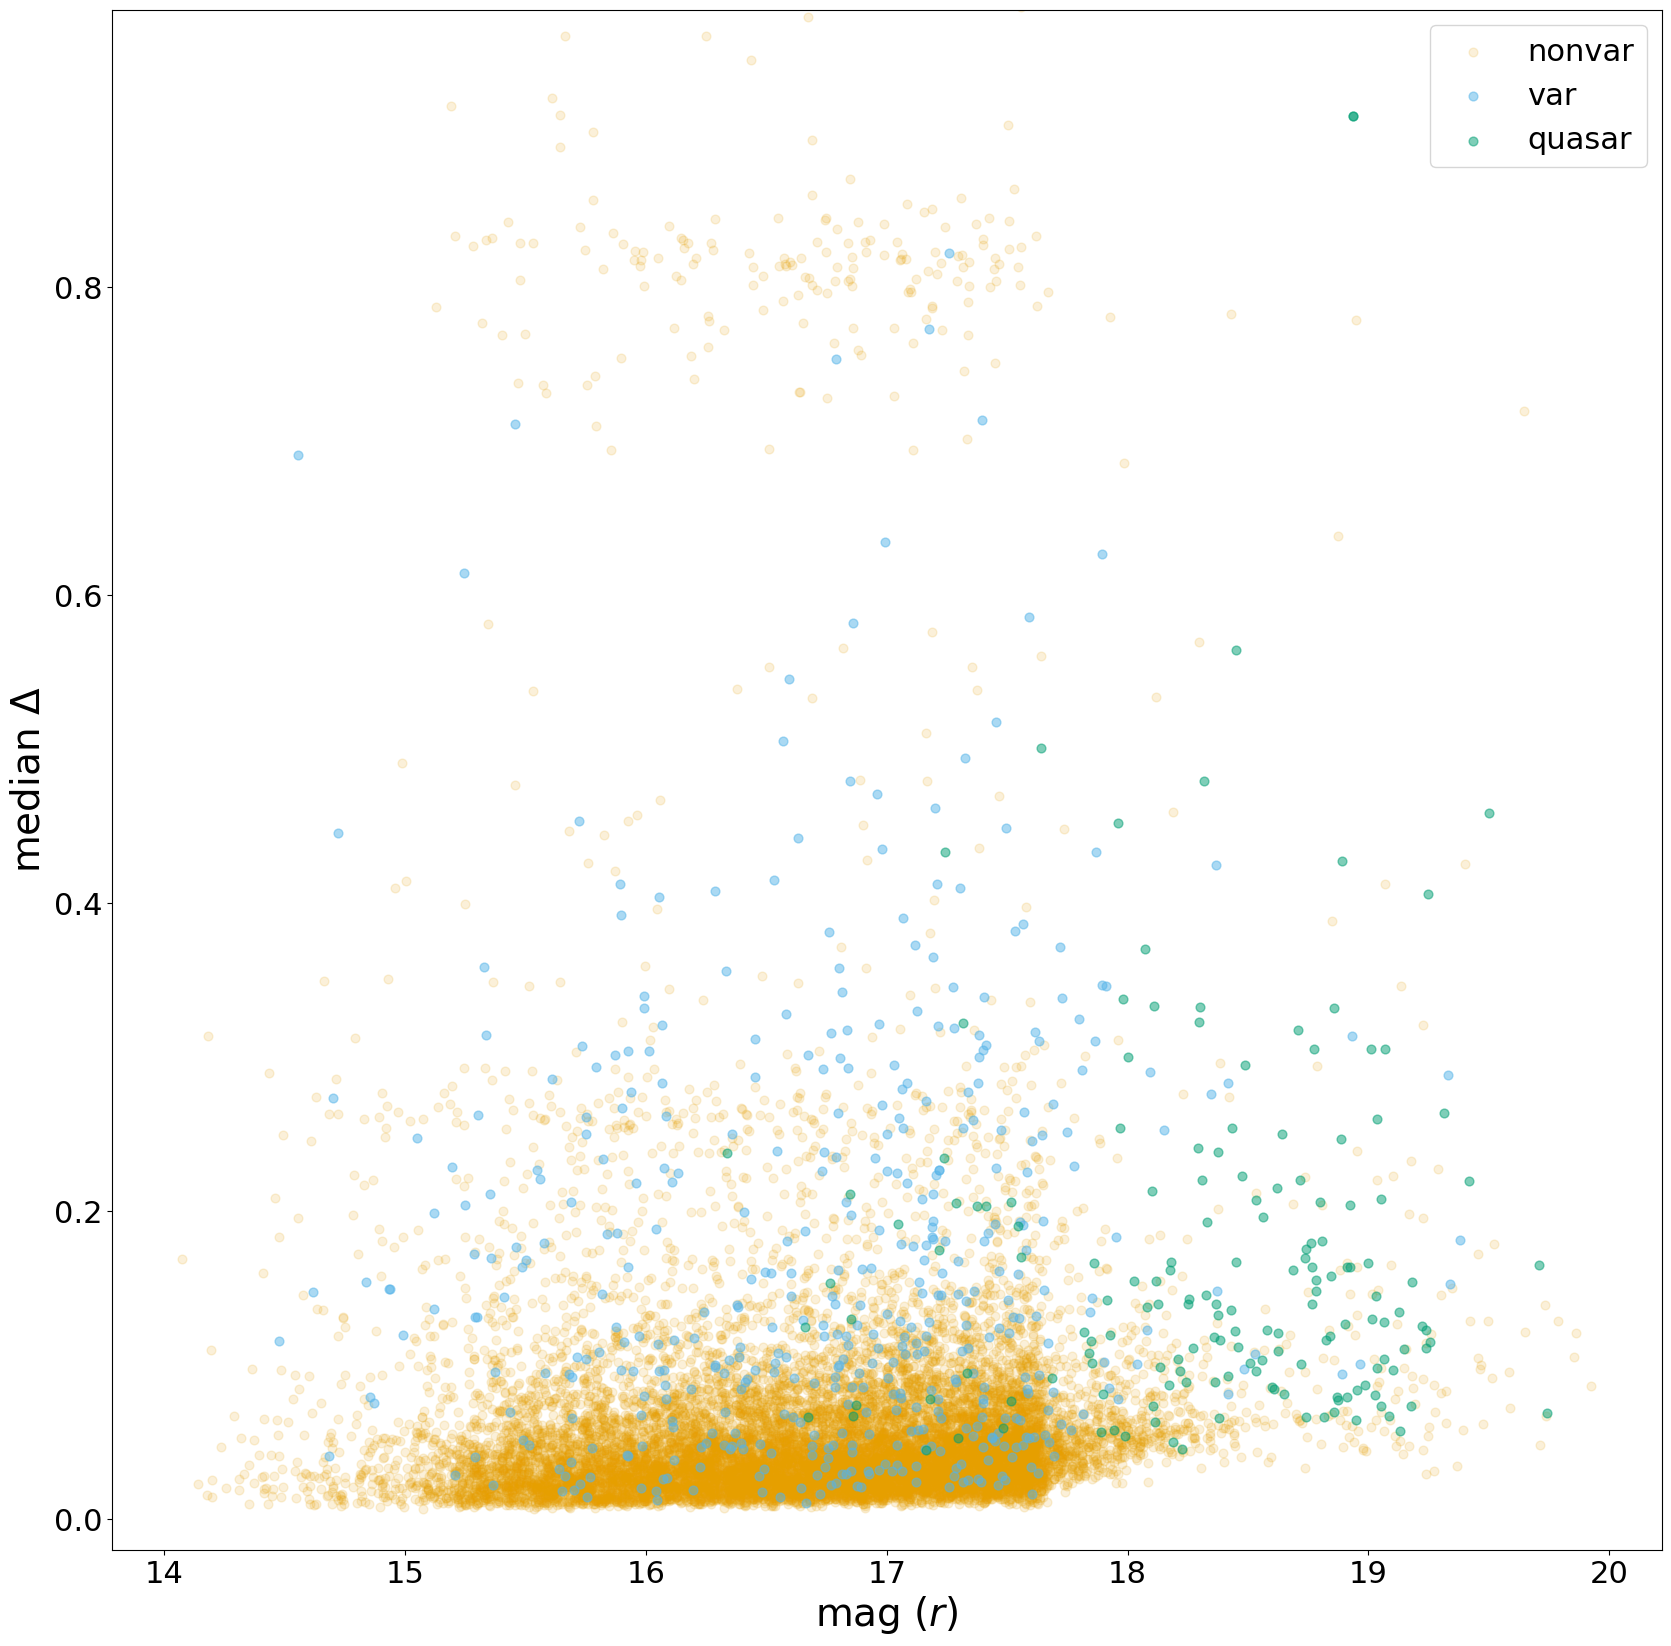

In [10]:
plt.figure(figsize=(20, 20))

plt.ylim(-0.02, 0.98)

plt.xlabel('mag ($r$)')
plt.ylabel('median $\\Delta$')

plt.scatter(nonvar_subset[R_MAG_COLNAME], nonvar_subset[D_MEDIAN_COLNAME], c=C_ORANGE,  s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[R_MAG_COLNAME],    var_subset[D_MEDIAN_COLNAME],    c=C_BLUE,    s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[R_MAG_COLNAME], quasar_subset[D_MEDIAN_COLNAME], c=C_GREEN,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

NameError: name 'm' is not defined

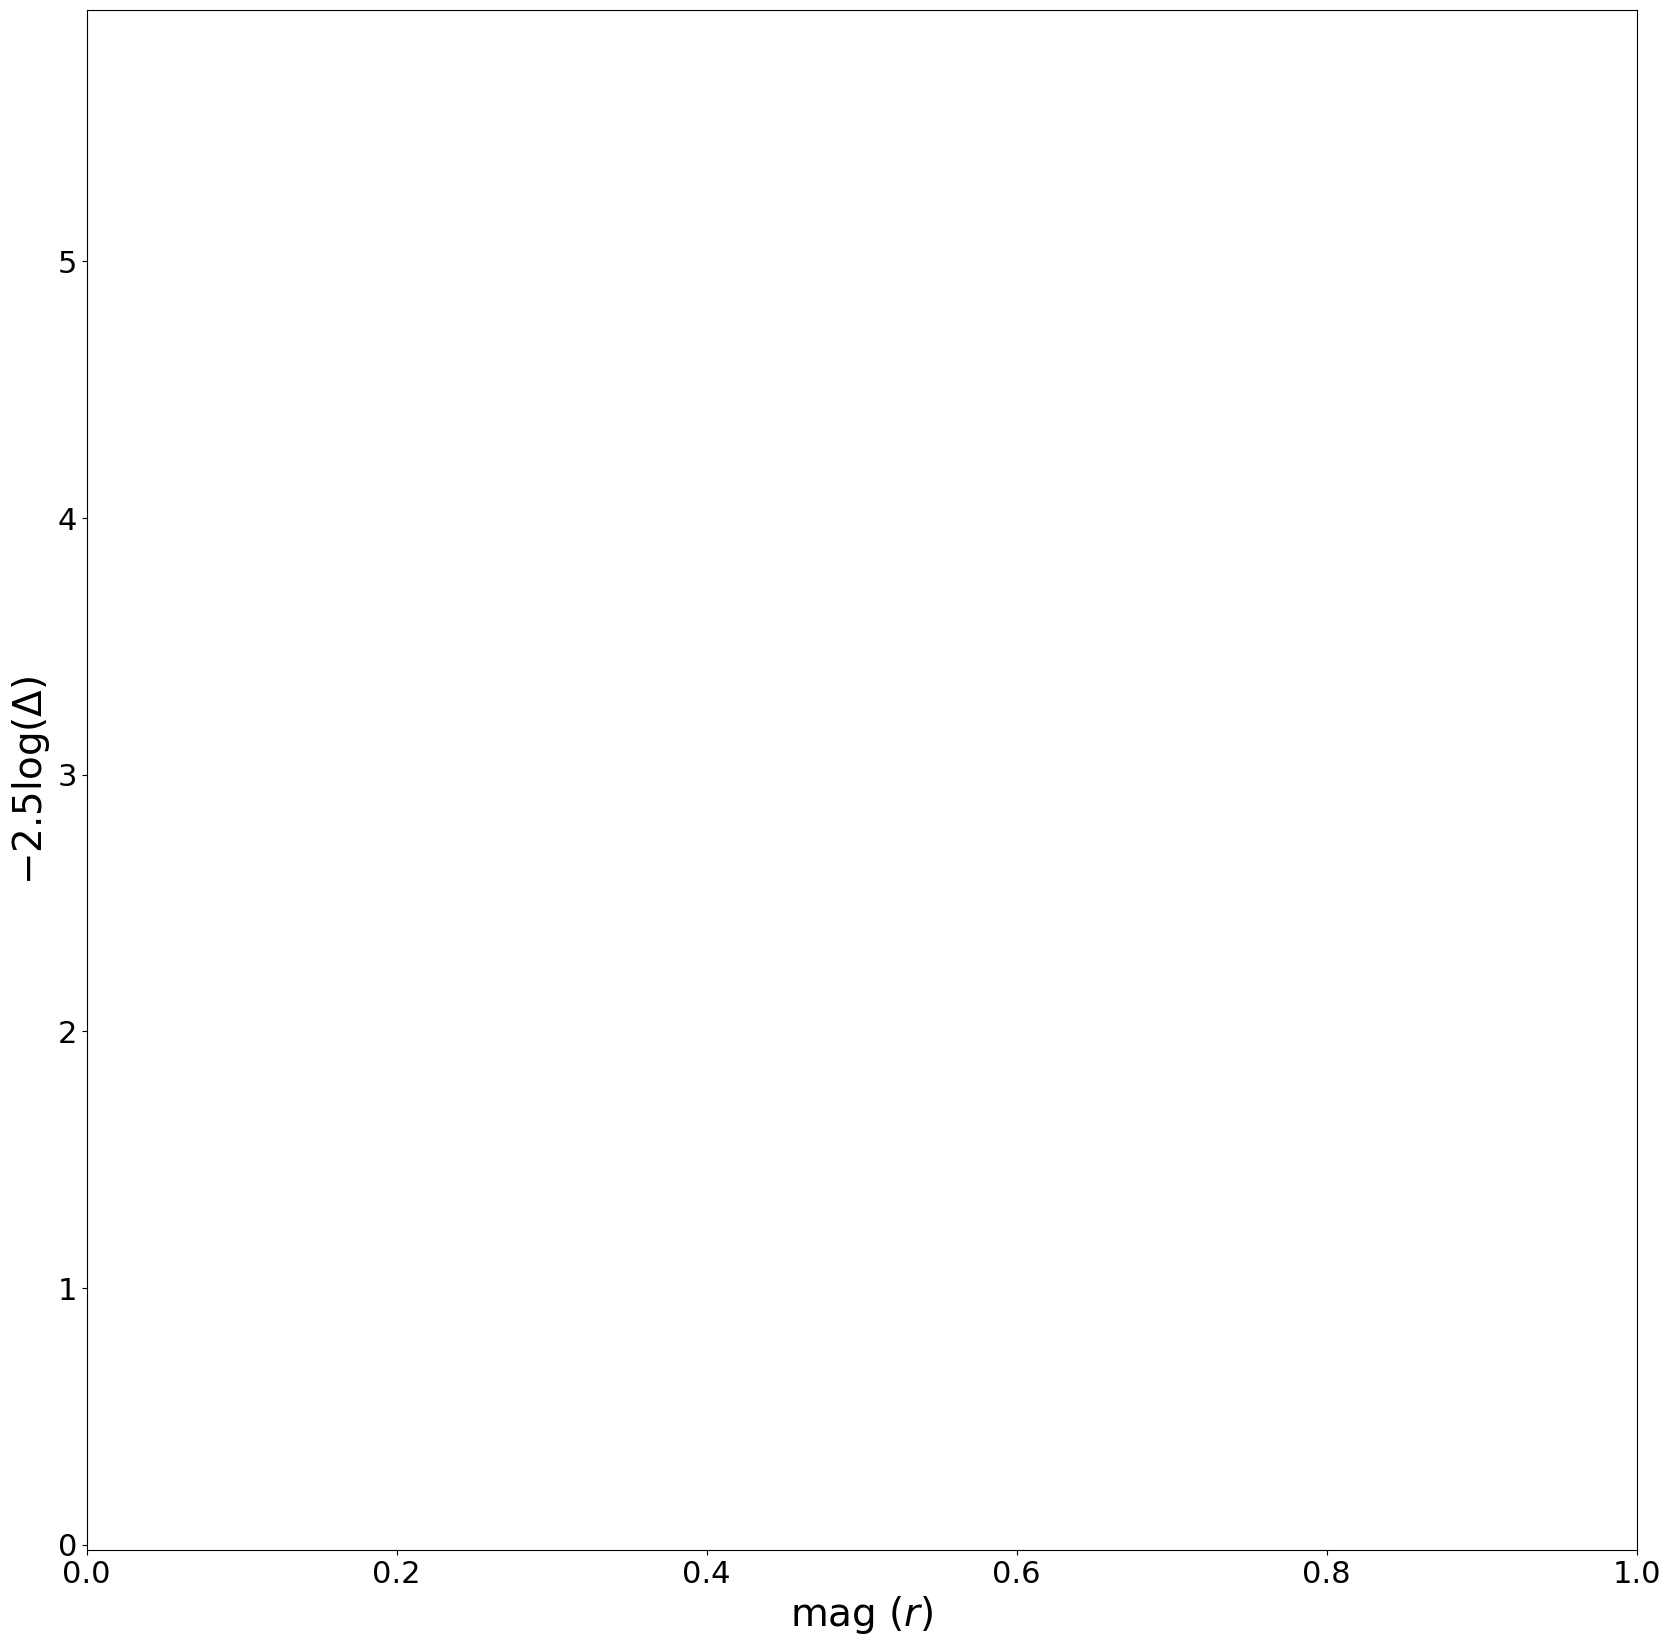

In [11]:
plt.figure(figsize=(20, 20))

plt.ylim(-0.02, 5.98)

plt.xlabel('mag ($r$)')
plt.ylabel('$-2.5 \\log(\\Delta$)')

plt.scatter(nonvar_subset[R_MAG_COLNAME], m(nonvar_subset[D_MEDIAN_COLNAME]), c=C_ORANGE,  s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[R_MAG_COLNAME],    m(var_subset[D_MEDIAN_COLNAME]),    c=C_BLUE,    s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[R_MAG_COLNAME], m(quasar_subset[D_MEDIAN_COLNAME]), c=C_GREEN,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

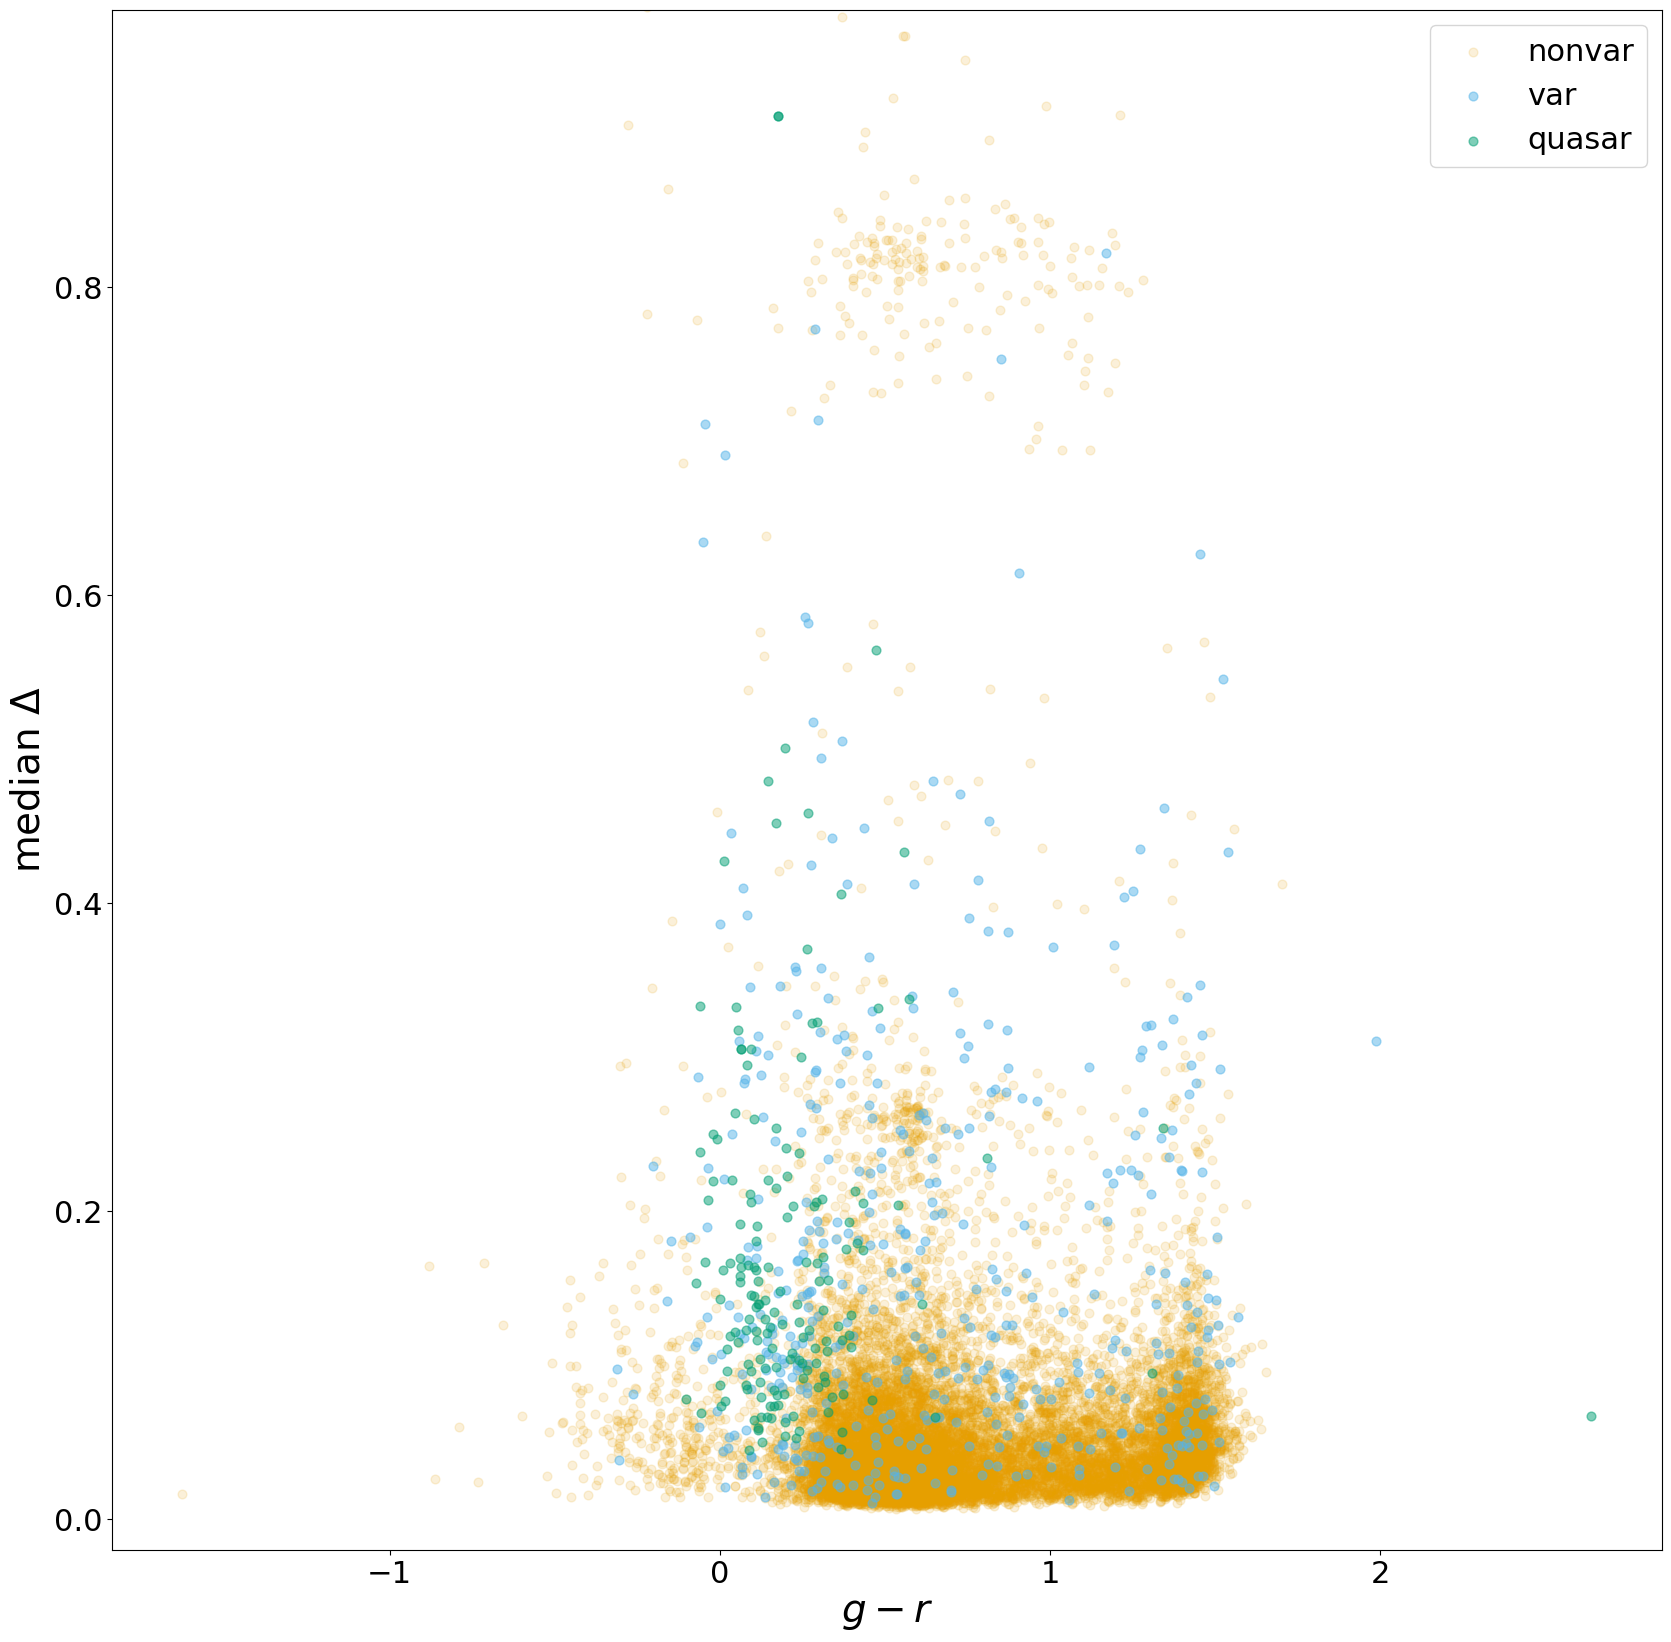

In [12]:
plt.figure(figsize=(20, 20))

plt.ylim(-0.02, 0.98)

plt.xlabel('$g-r$')
plt.ylabel('median $\\Delta$')

gMr = lambda x: x[G_MAG_COLNAME] - x[R_MAG_COLNAME]

plt.scatter(gMr(nonvar_subset), nonvar_subset[D_MEDIAN_COLNAME], c=C_ORANGE,  s=S, label='nonvar', alpha=AN)
plt.scatter(gMr(var_subset),    var_subset[D_MEDIAN_COLNAME],    c=C_BLUE,    s=S, label='var',    alpha=AV)
plt.scatter(gMr(quasar_subset), quasar_subset[D_MEDIAN_COLNAME], c=C_GREEN,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

NameError: name 'm' is not defined

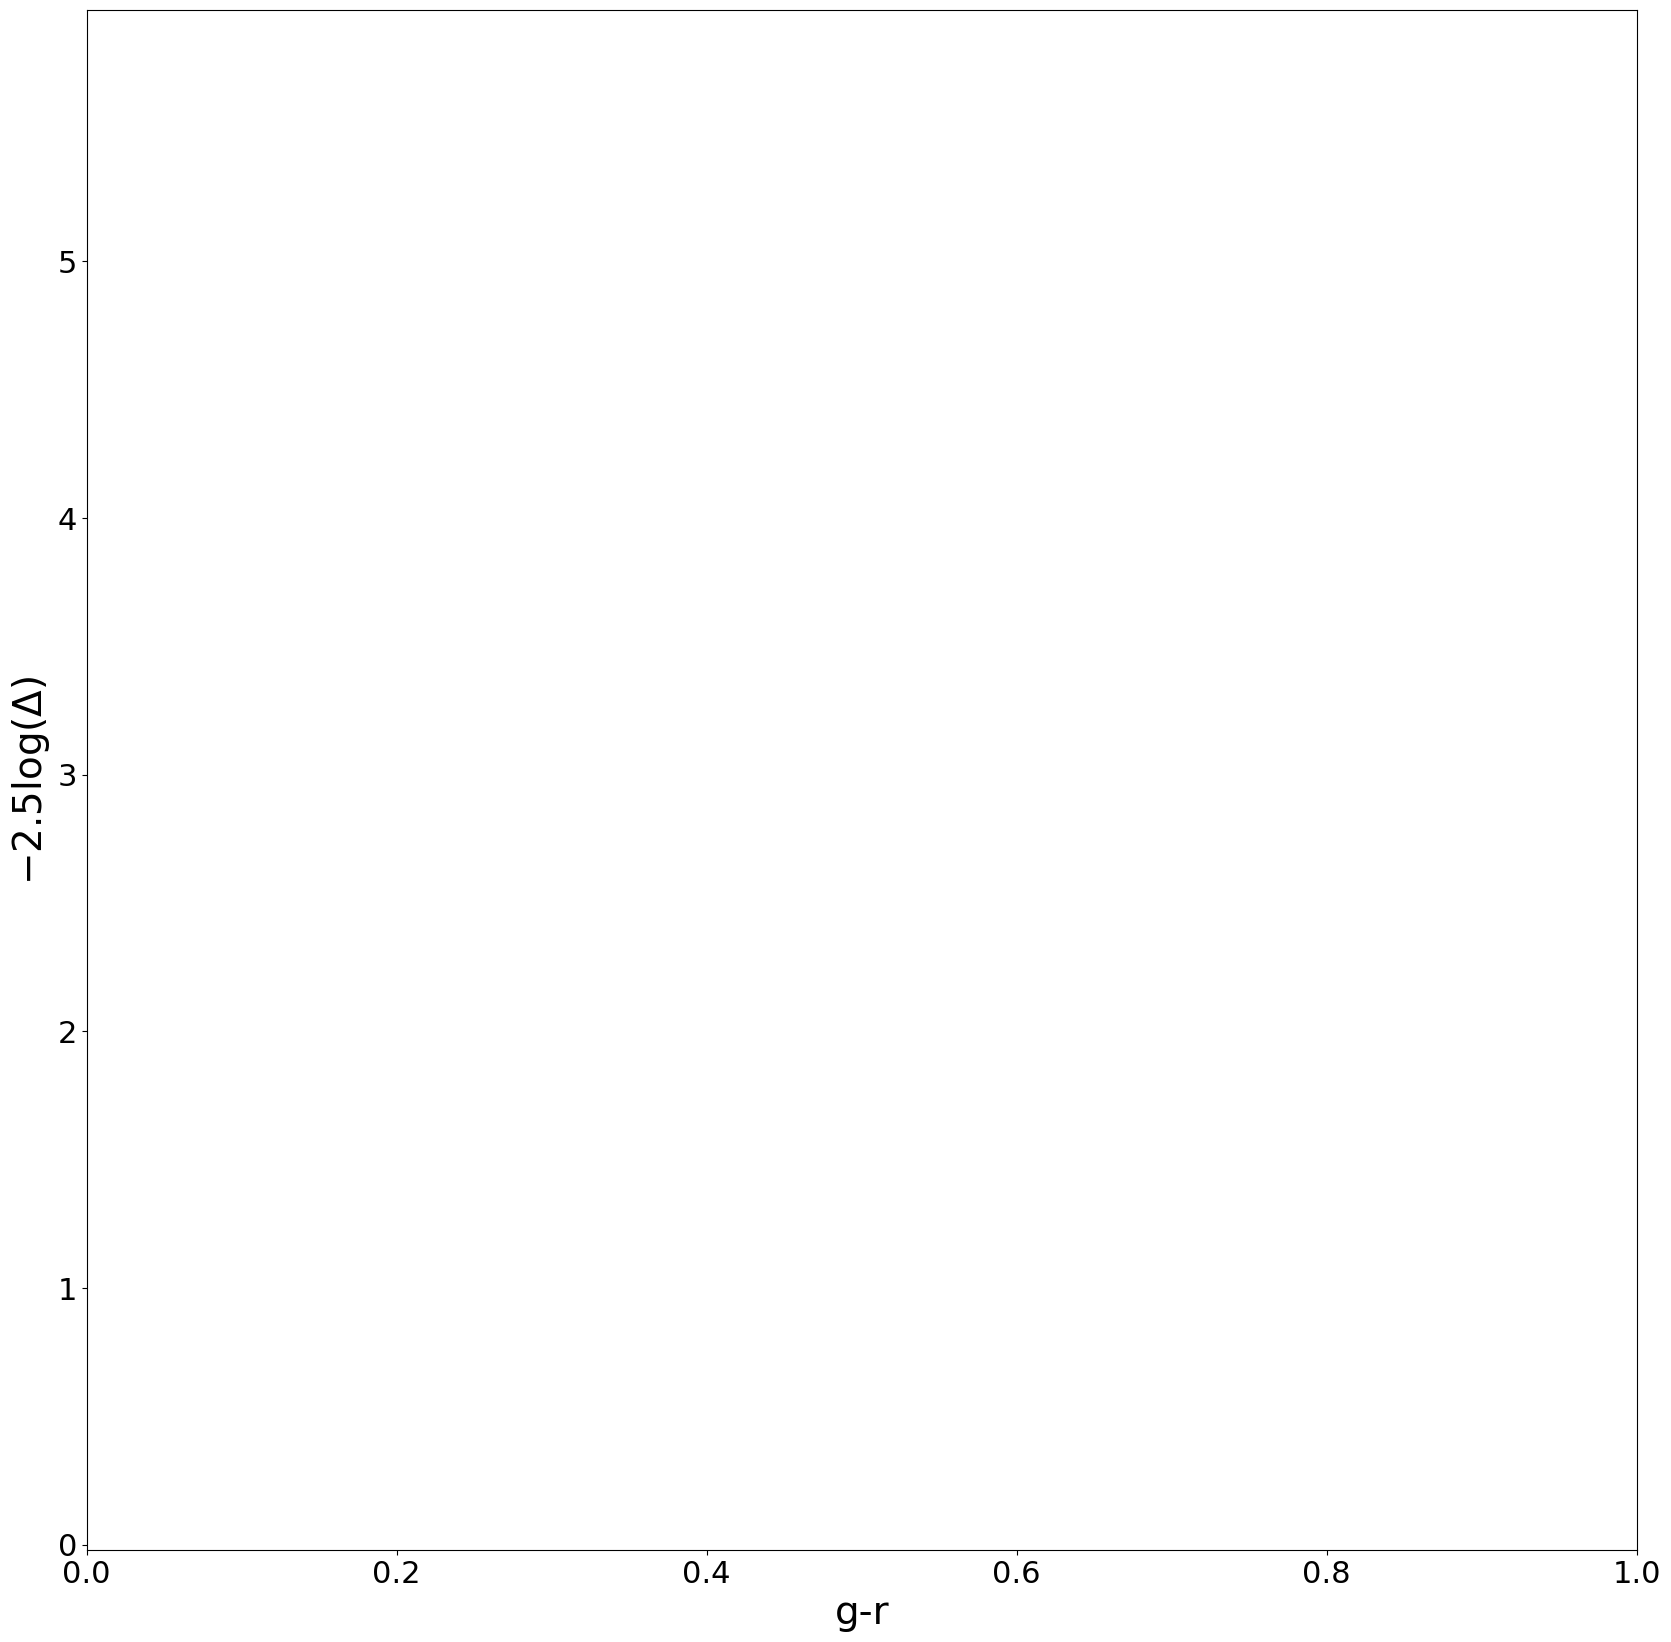

In [13]:
plt.figure(figsize=(20, 20))

plt.ylim(-0.02, 5.98)

plt.xlabel('g-r')
plt.ylabel('$-2.5 \\log(\\Delta$)')

plt.scatter(gMr(nonvar_subset), m(nonvar_subset[D_MEDIAN_COLNAME]), c=C_ORANGE,  s=S, label='nonvar', alpha=AN)
plt.scatter(gMr(var_subset),    m(var_subset[D_MEDIAN_COLNAME]),    c=C_BLUE,    s=S, label='var',    alpha=AV)
plt.scatter(gMr(quasar_subset), m(quasar_subset[D_MEDIAN_COLNAME]), c=C_GREEN,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

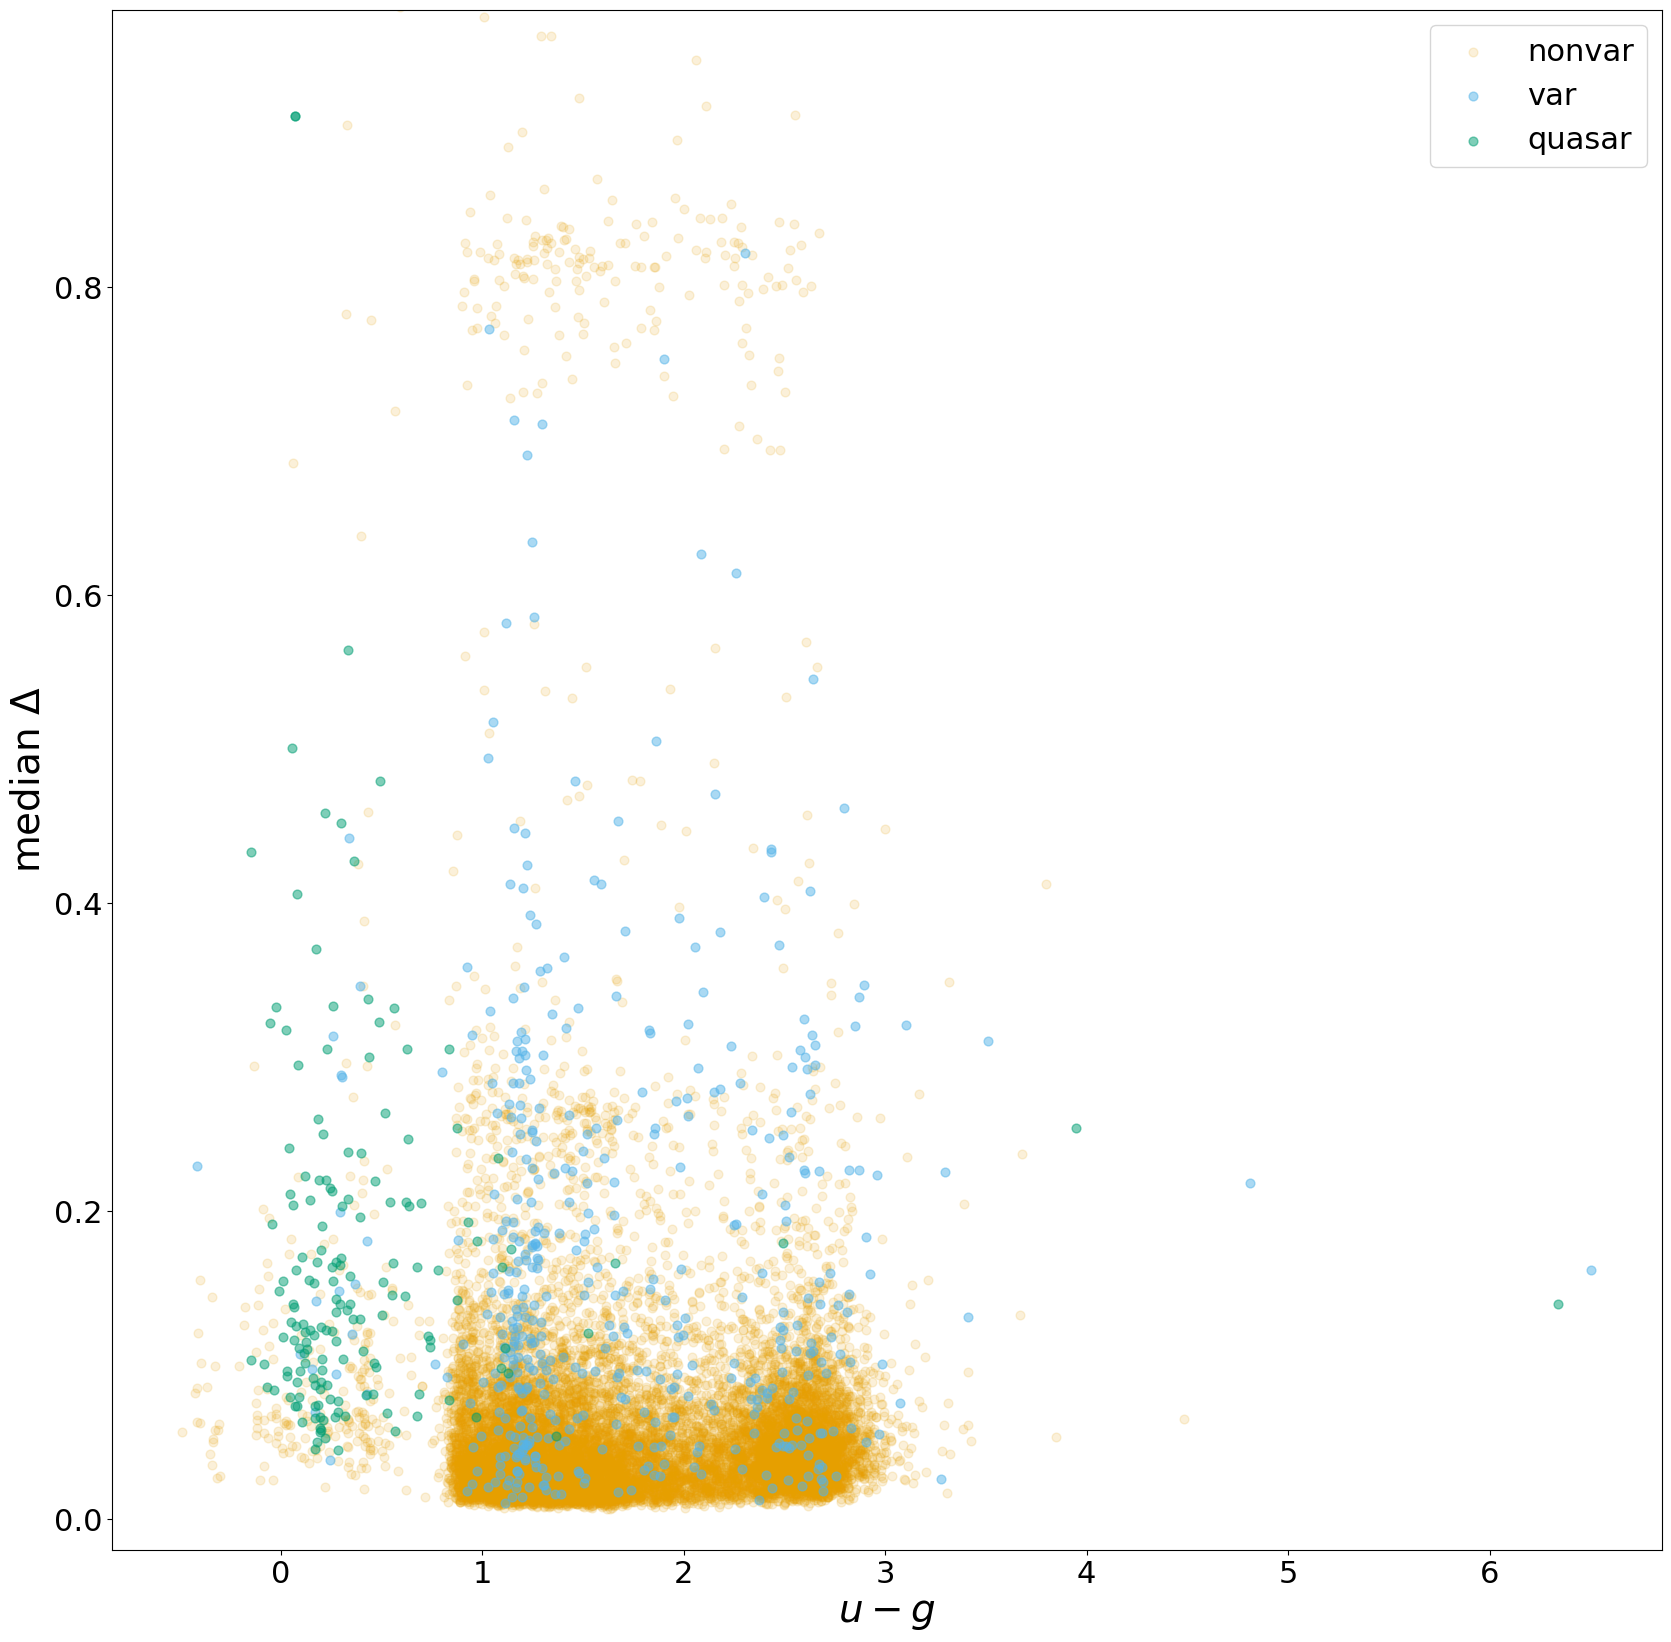

In [14]:
plt.figure(figsize=(20, 20))

plt.ylim(-0.02, 0.98)

plt.xlabel('$u-g$')
plt.ylabel('median $\\Delta$')

uMg = lambda x: x[U_MAG_COLNAME] - x[G_MAG_COLNAME]

plt.scatter(uMg(nonvar_subset), nonvar_subset[D_MEDIAN_COLNAME], c=C_ORANGE,  s=S, label='nonvar', alpha=AN)
plt.scatter(uMg(var_subset),    var_subset[D_MEDIAN_COLNAME],    c=C_BLUE,    s=S, label='var',    alpha=AV)
plt.scatter(uMg(quasar_subset), quasar_subset[D_MEDIAN_COLNAME], c=C_GREEN,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

NameError: name 'm' is not defined

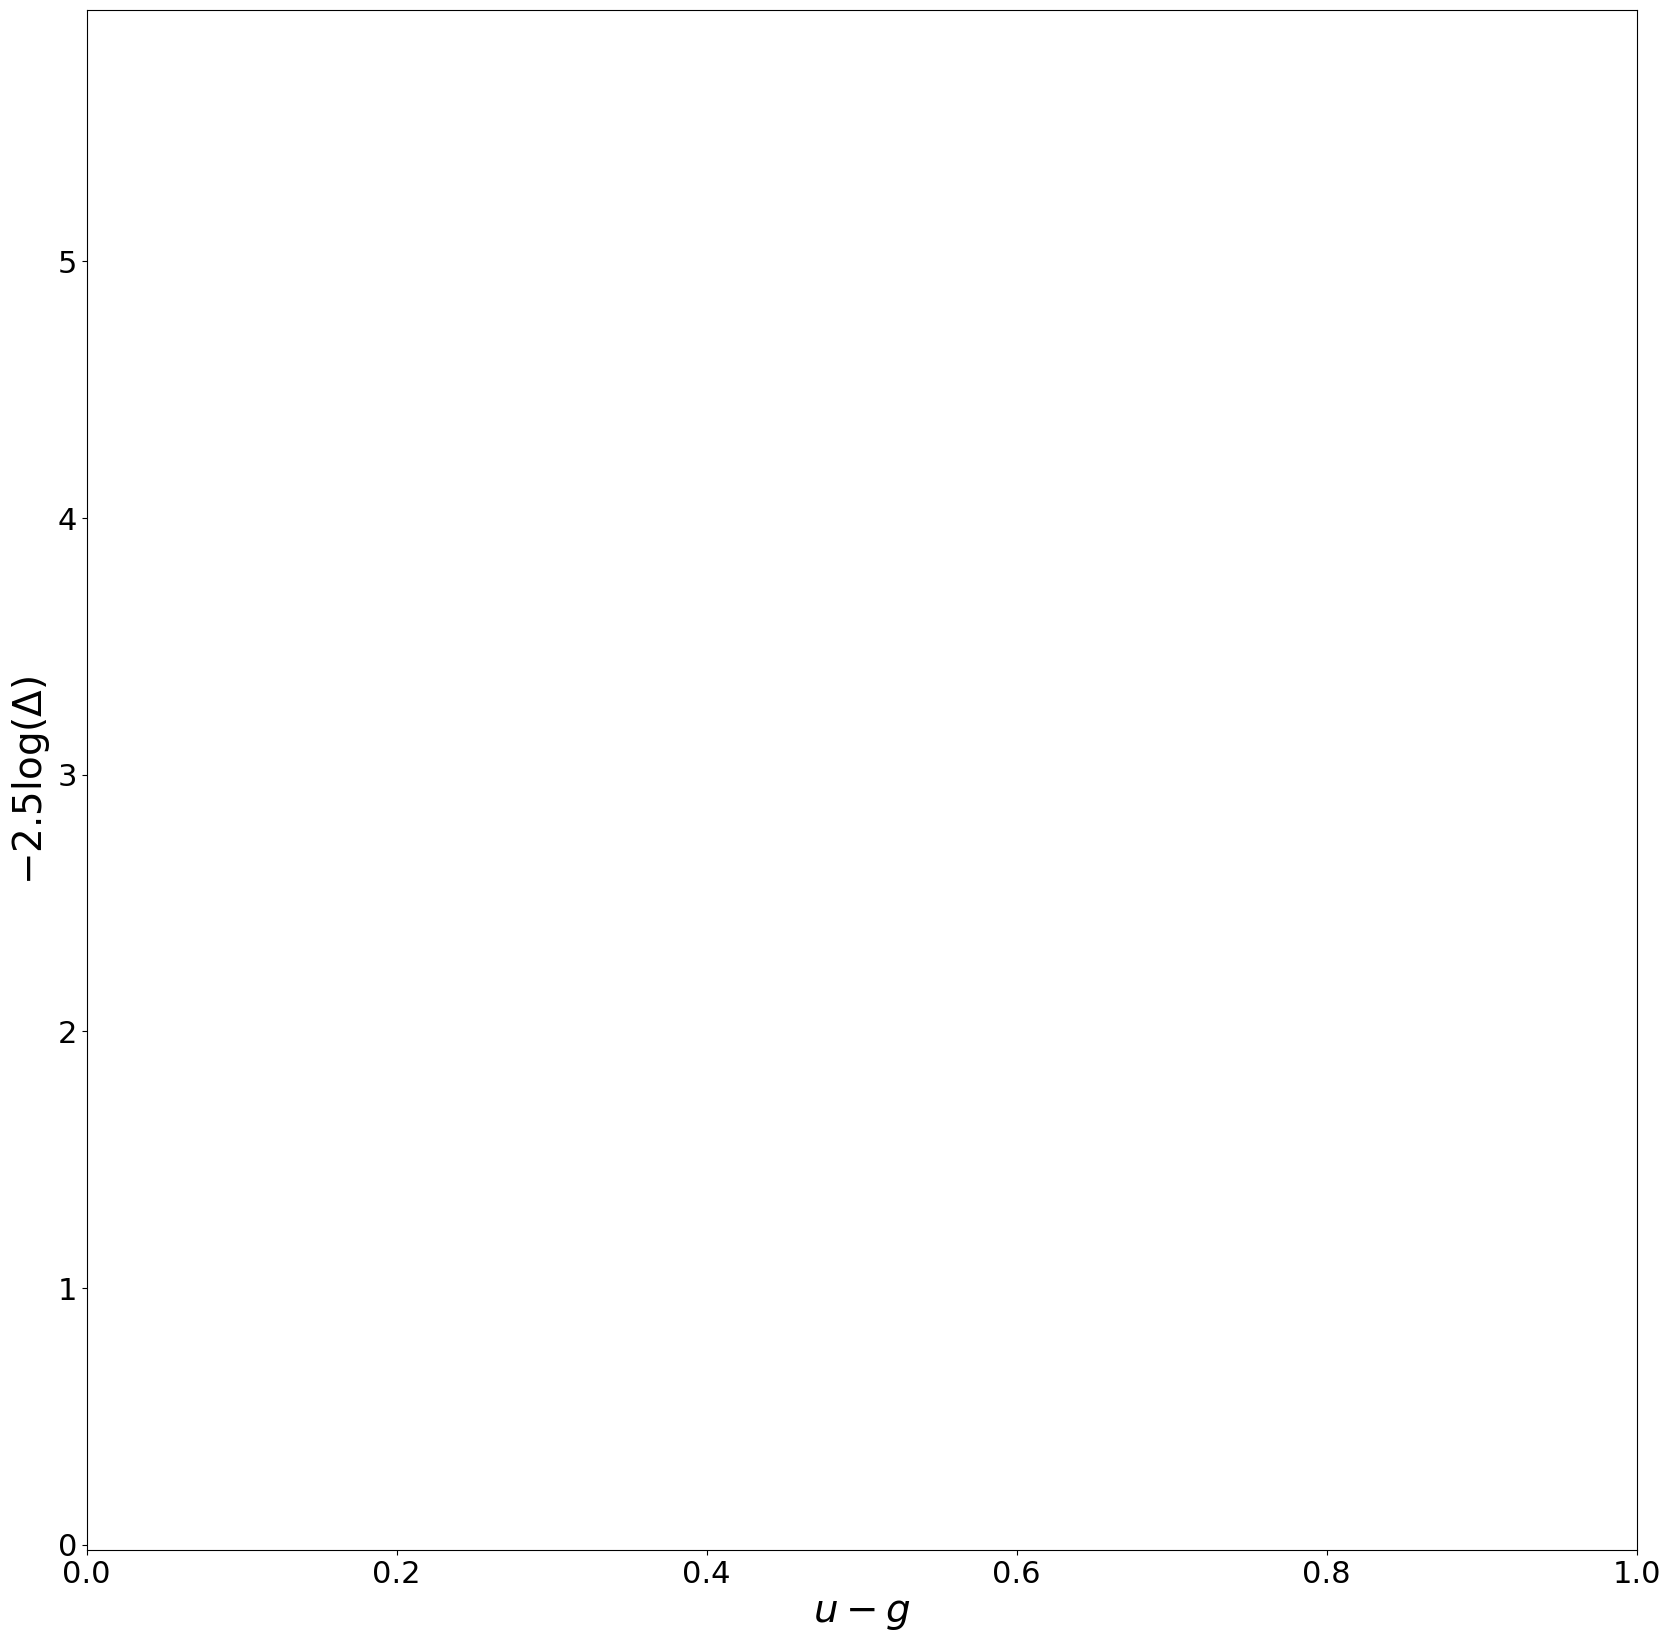

In [15]:
plt.figure(figsize=(20, 20))

plt.ylim(-0.02, 5.98)

plt.xlabel('$u-g$')
plt.ylabel('$-2.5 \\log(\\Delta$)')

plt.scatter(uMg(nonvar_subset), m(nonvar_subset[D_MEDIAN_COLNAME]), c=C_ORANGE,  s=S, label='nonvar', alpha=AN)
plt.scatter(uMg(var_subset),    m(var_subset[D_MEDIAN_COLNAME]),    c=C_BLUE,    s=S, label='var',    alpha=AV)
plt.scatter(uMg(quasar_subset), m(quasar_subset[D_MEDIAN_COLNAME]), c=C_GREEN,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

# \delta

KeyError: 'd_median'

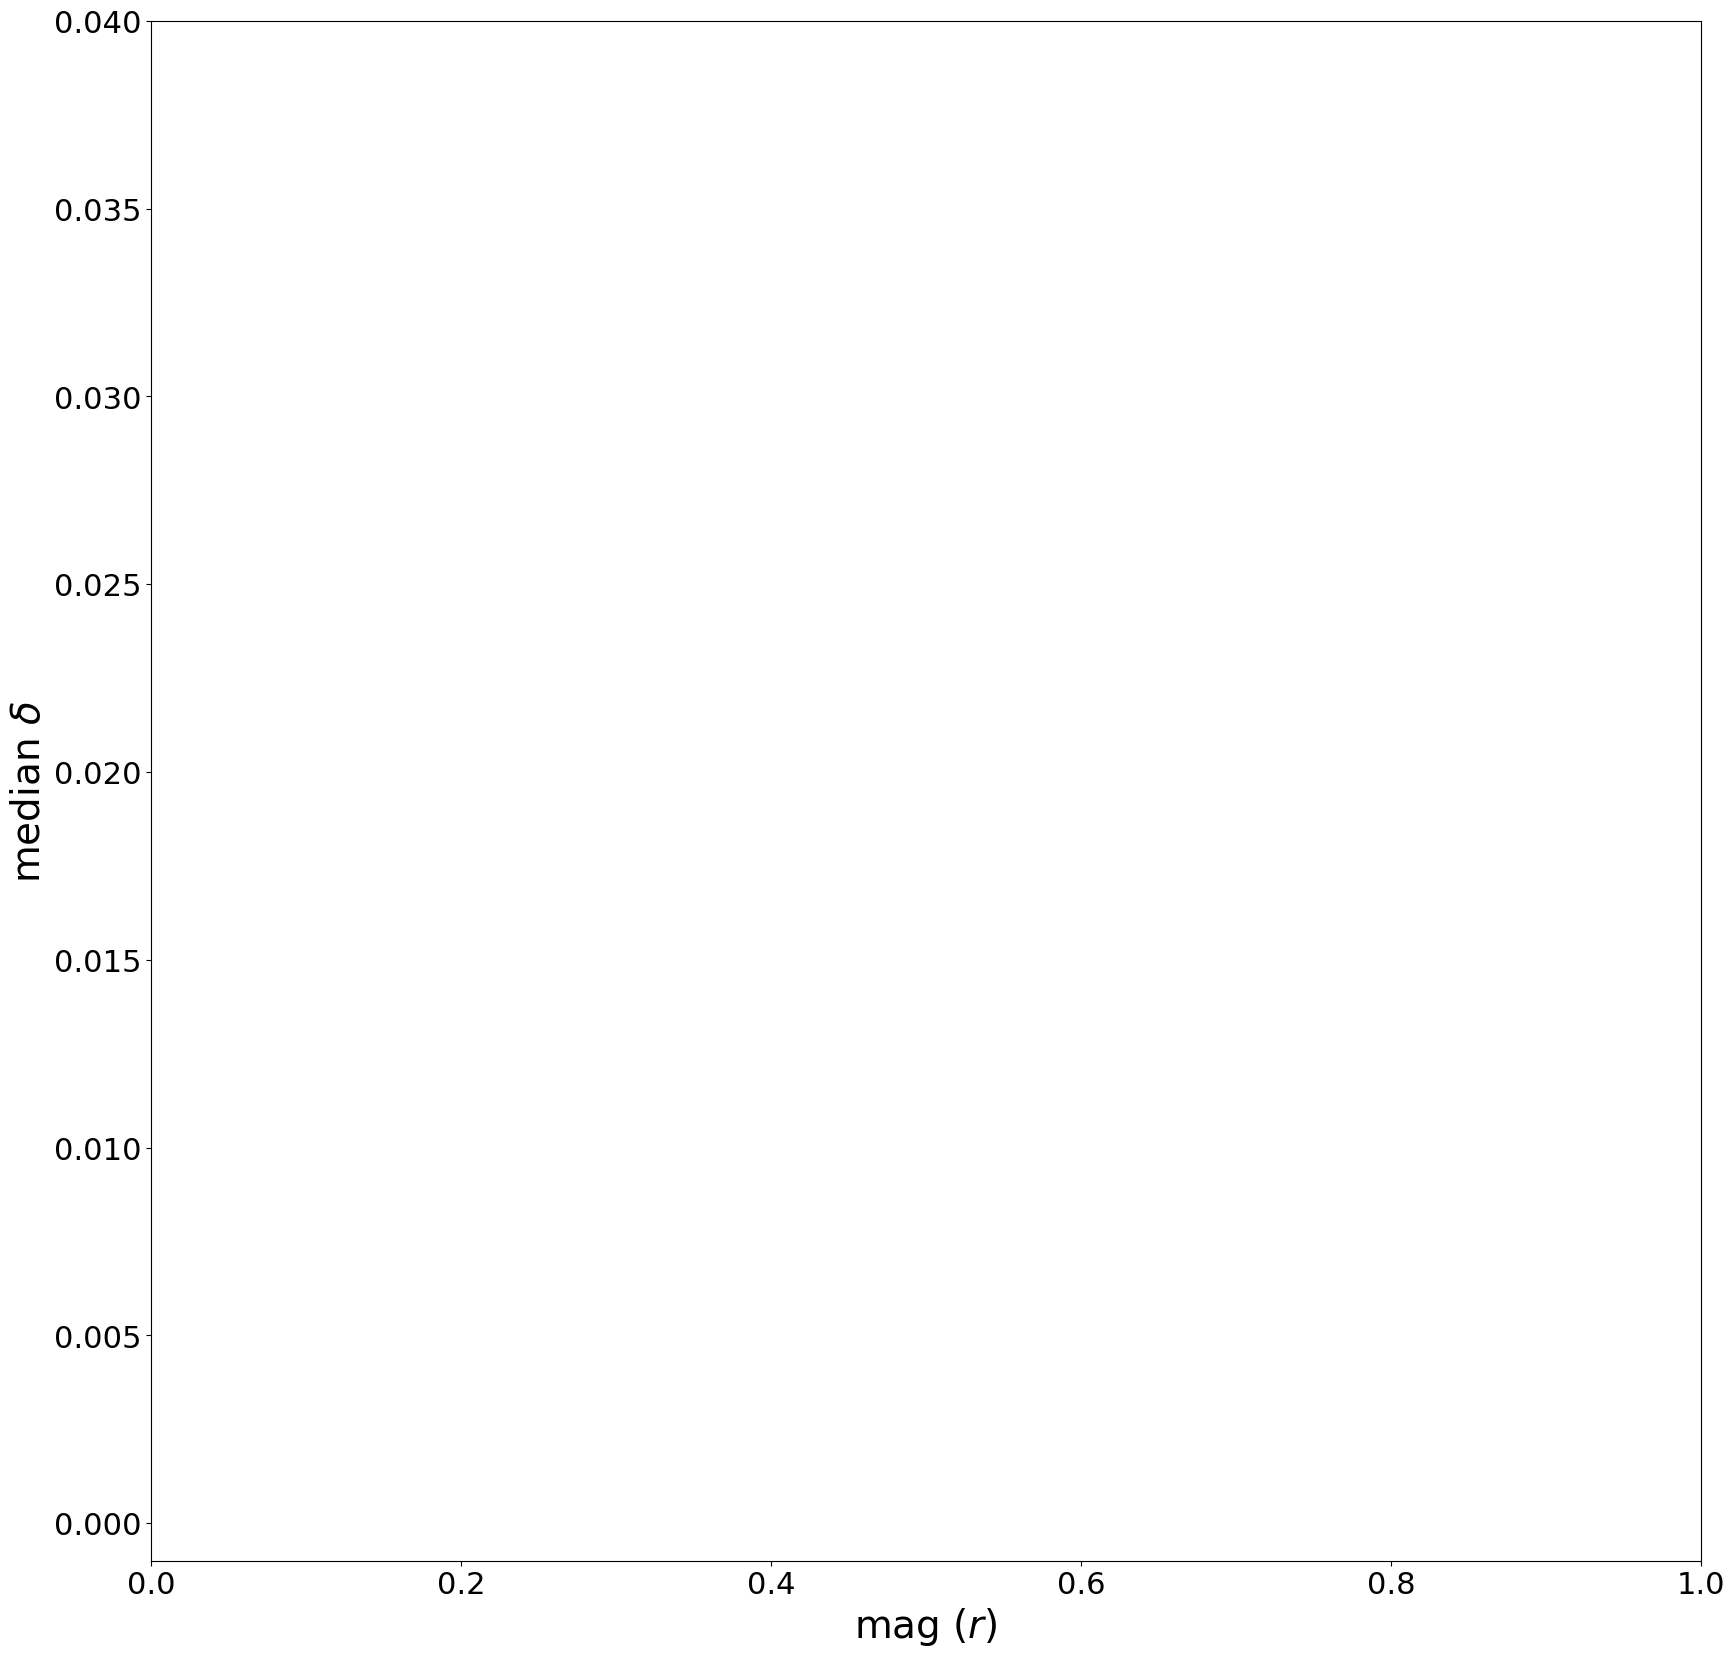

In [16]:
plt.figure(figsize=(20, 20))

plt.ylim(-0.001, 0.04)

plt.xlabel('mag ($r$)')
plt.ylabel('median $\\delta$')

plt.scatter(nonvar_subset[R_MAG_COLNAME], nonvar_subset[d_MEDIAN_COLNAME], c=C_ORANGE,  s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[R_MAG_COLNAME],    var_subset[d_MEDIAN_COLNAME],    c=C_BLUE,    s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[R_MAG_COLNAME], quasar_subset[d_MEDIAN_COLNAME], c=C_GREEN,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

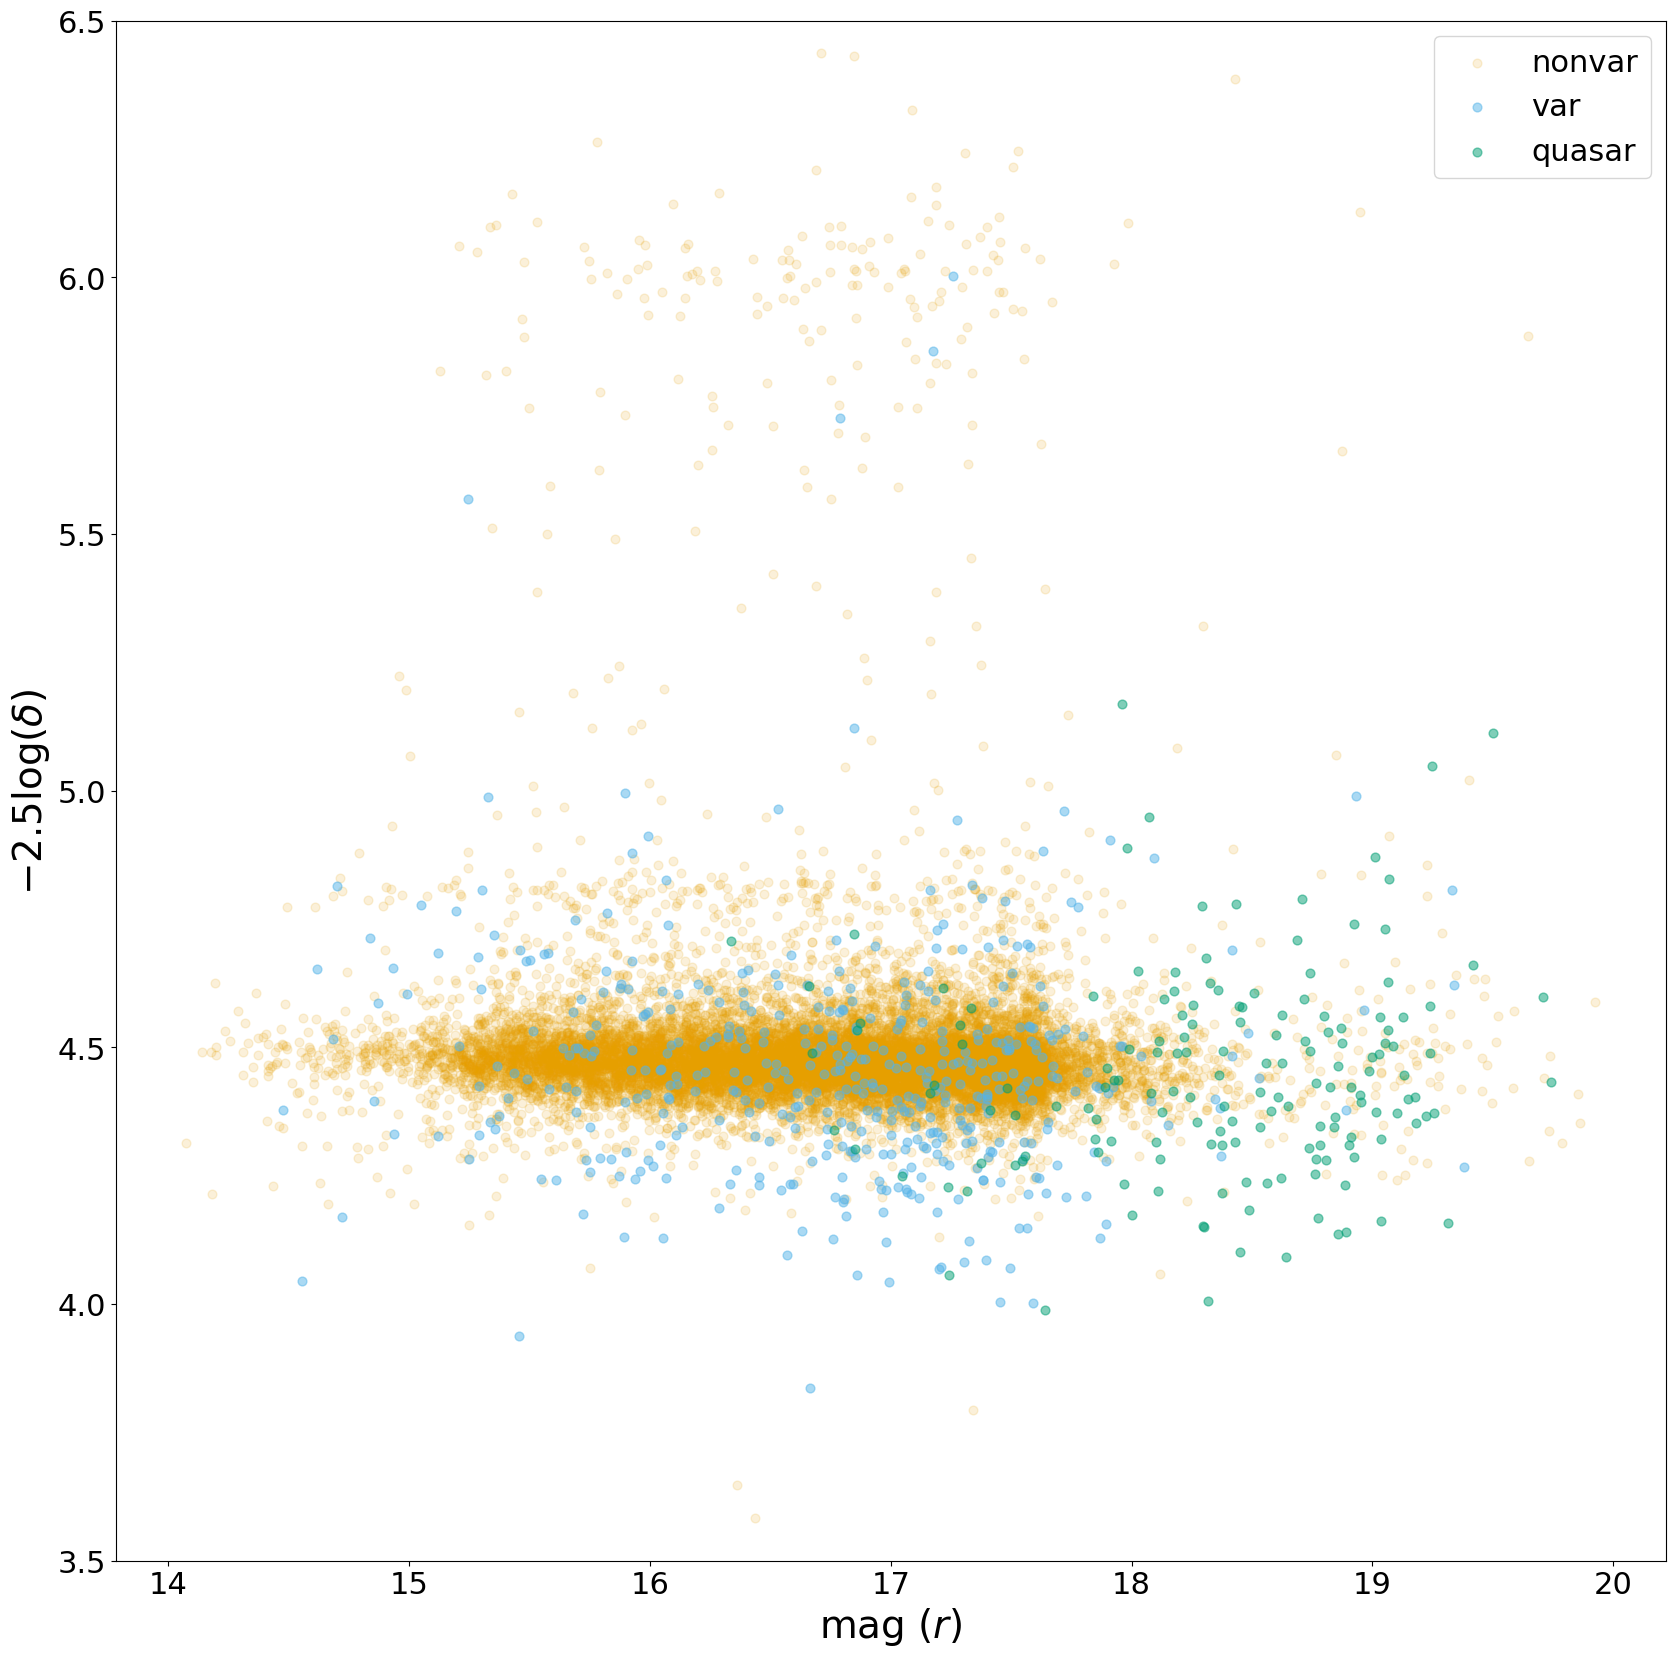

In [87]:
plt.figure(figsize=(20, 20))

plt.ylim(3.5, 6.5)

plt.xlabel('mag ($r$)')
plt.ylabel('$-2.5 \\log(\\delta$)')

plt.scatter(nonvar_subset[R_MAG_COLNAME], m(nonvar_subset[d_MEDIAN_COLNAME]), c=C_ORANGE,  s=S, label='nonvar', alpha=AN)
plt.scatter(var_subset[R_MAG_COLNAME],    m(var_subset[d_MEDIAN_COLNAME]),    c=C_BLUE,    s=S, label='var',    alpha=AV)
plt.scatter(quasar_subset[R_MAG_COLNAME], m(quasar_subset[d_MEDIAN_COLNAME]), c=C_GREEN,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

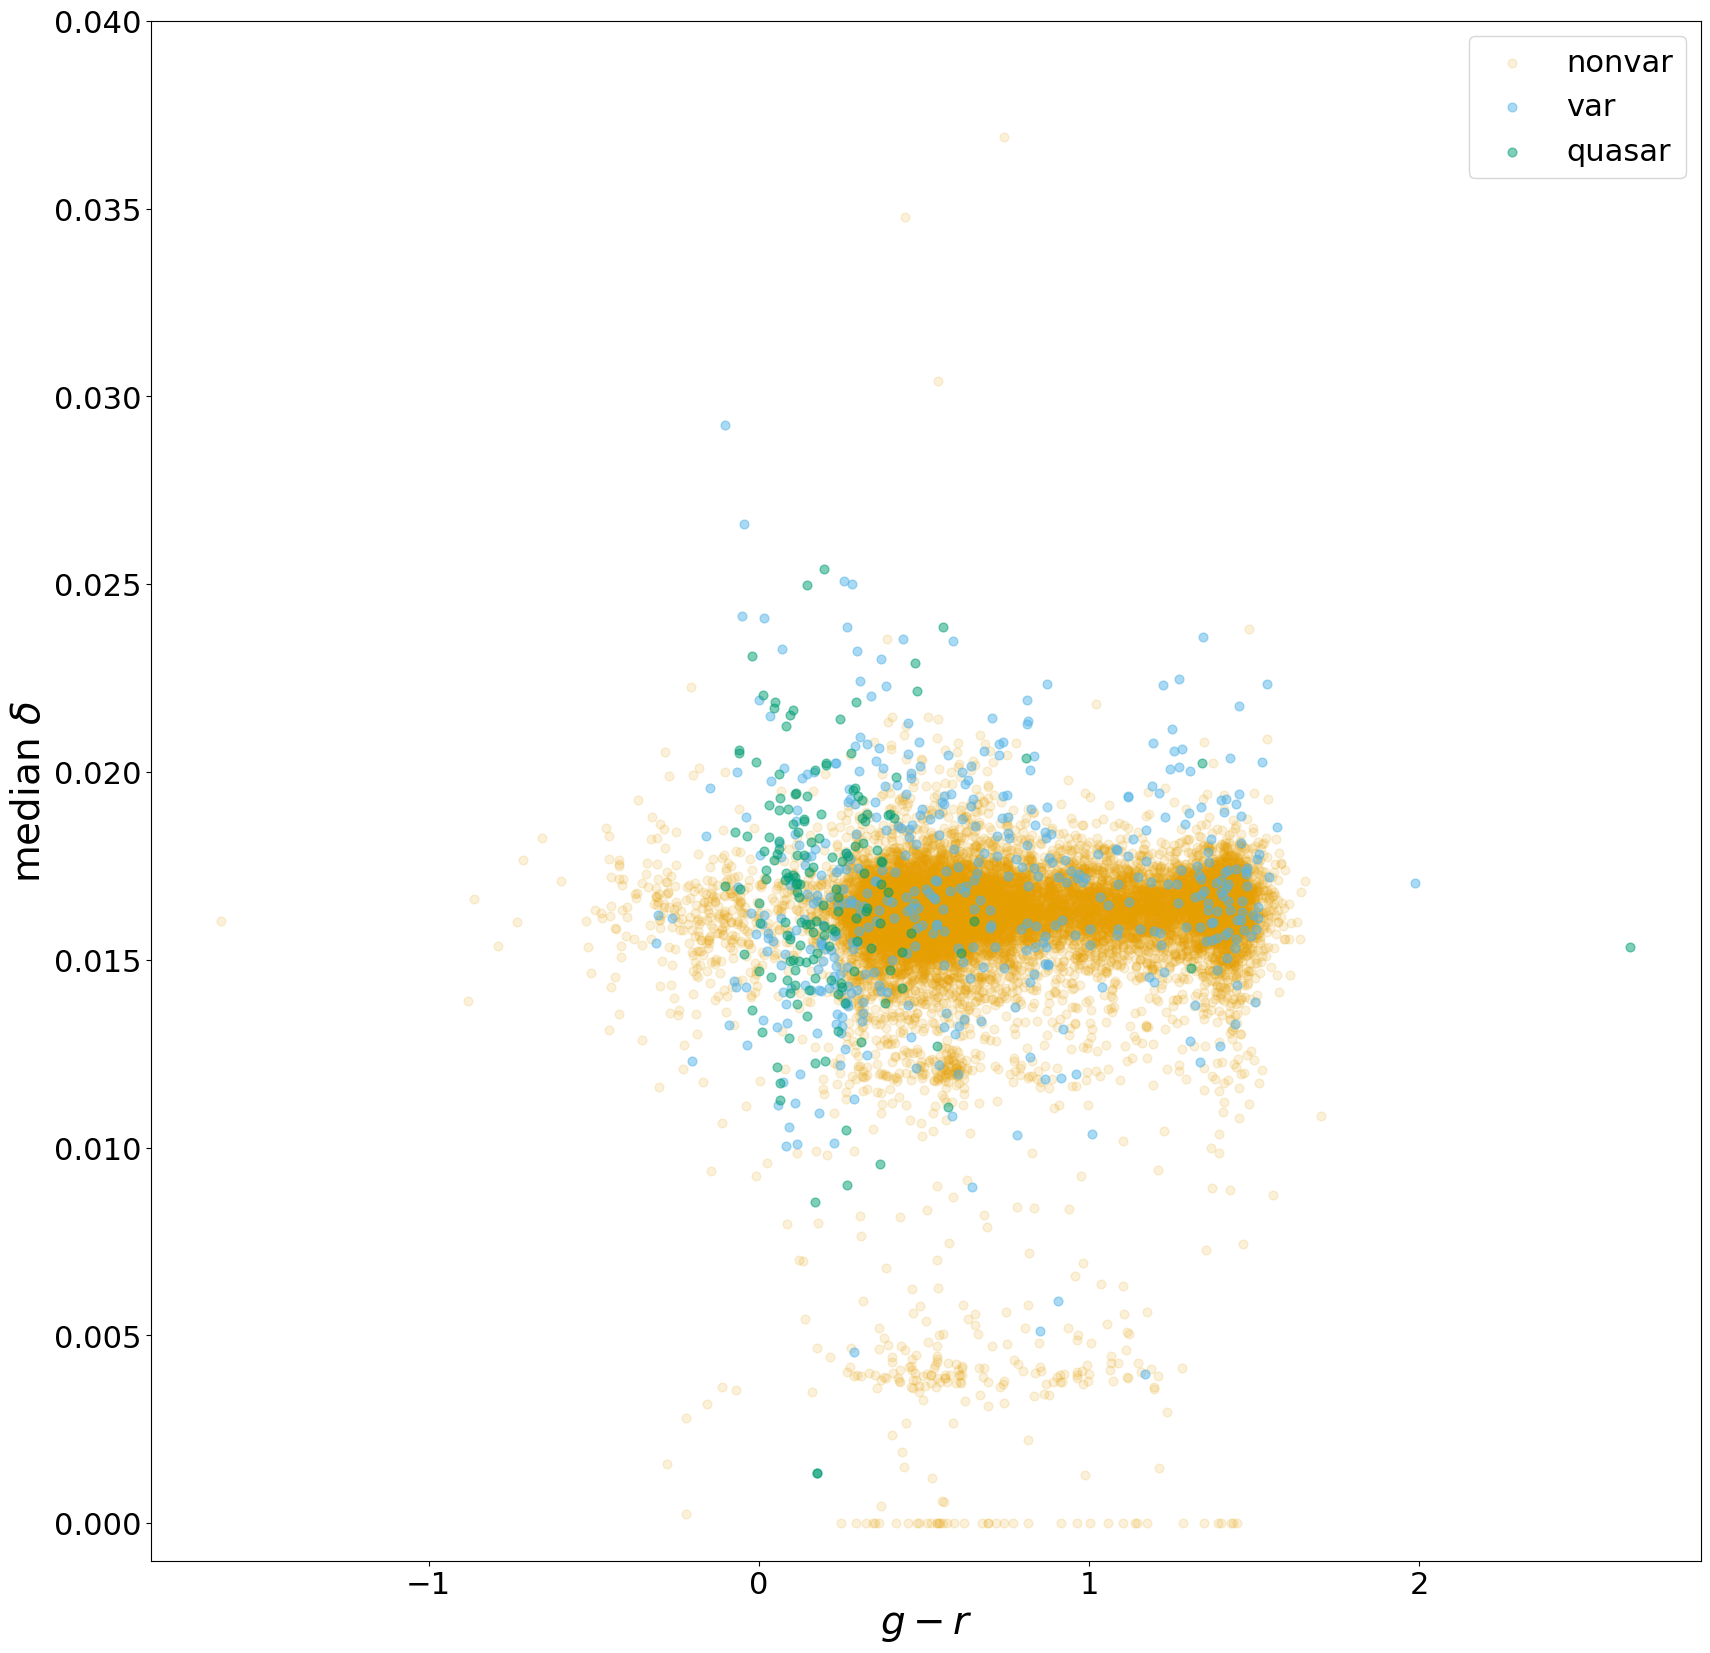

In [91]:
plt.figure(figsize=(20, 20))

plt.ylim(-0.001, 0.04)

plt.xlabel('$g-r$')
plt.ylabel('median $\\delta$')

gMr = lambda x: x[G_MAG_COLNAME] - x[R_MAG_COLNAME]

plt.scatter(gMr(nonvar_subset), nonvar_subset[d_MEDIAN_COLNAME], c=C_ORANGE,  s=S, label='nonvar', alpha=AN)
plt.scatter(gMr(var_subset),    var_subset[d_MEDIAN_COLNAME],    c=C_BLUE,    s=S, label='var',    alpha=AV)
plt.scatter(gMr(quasar_subset), quasar_subset[d_MEDIAN_COLNAME], c=C_GREEN,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

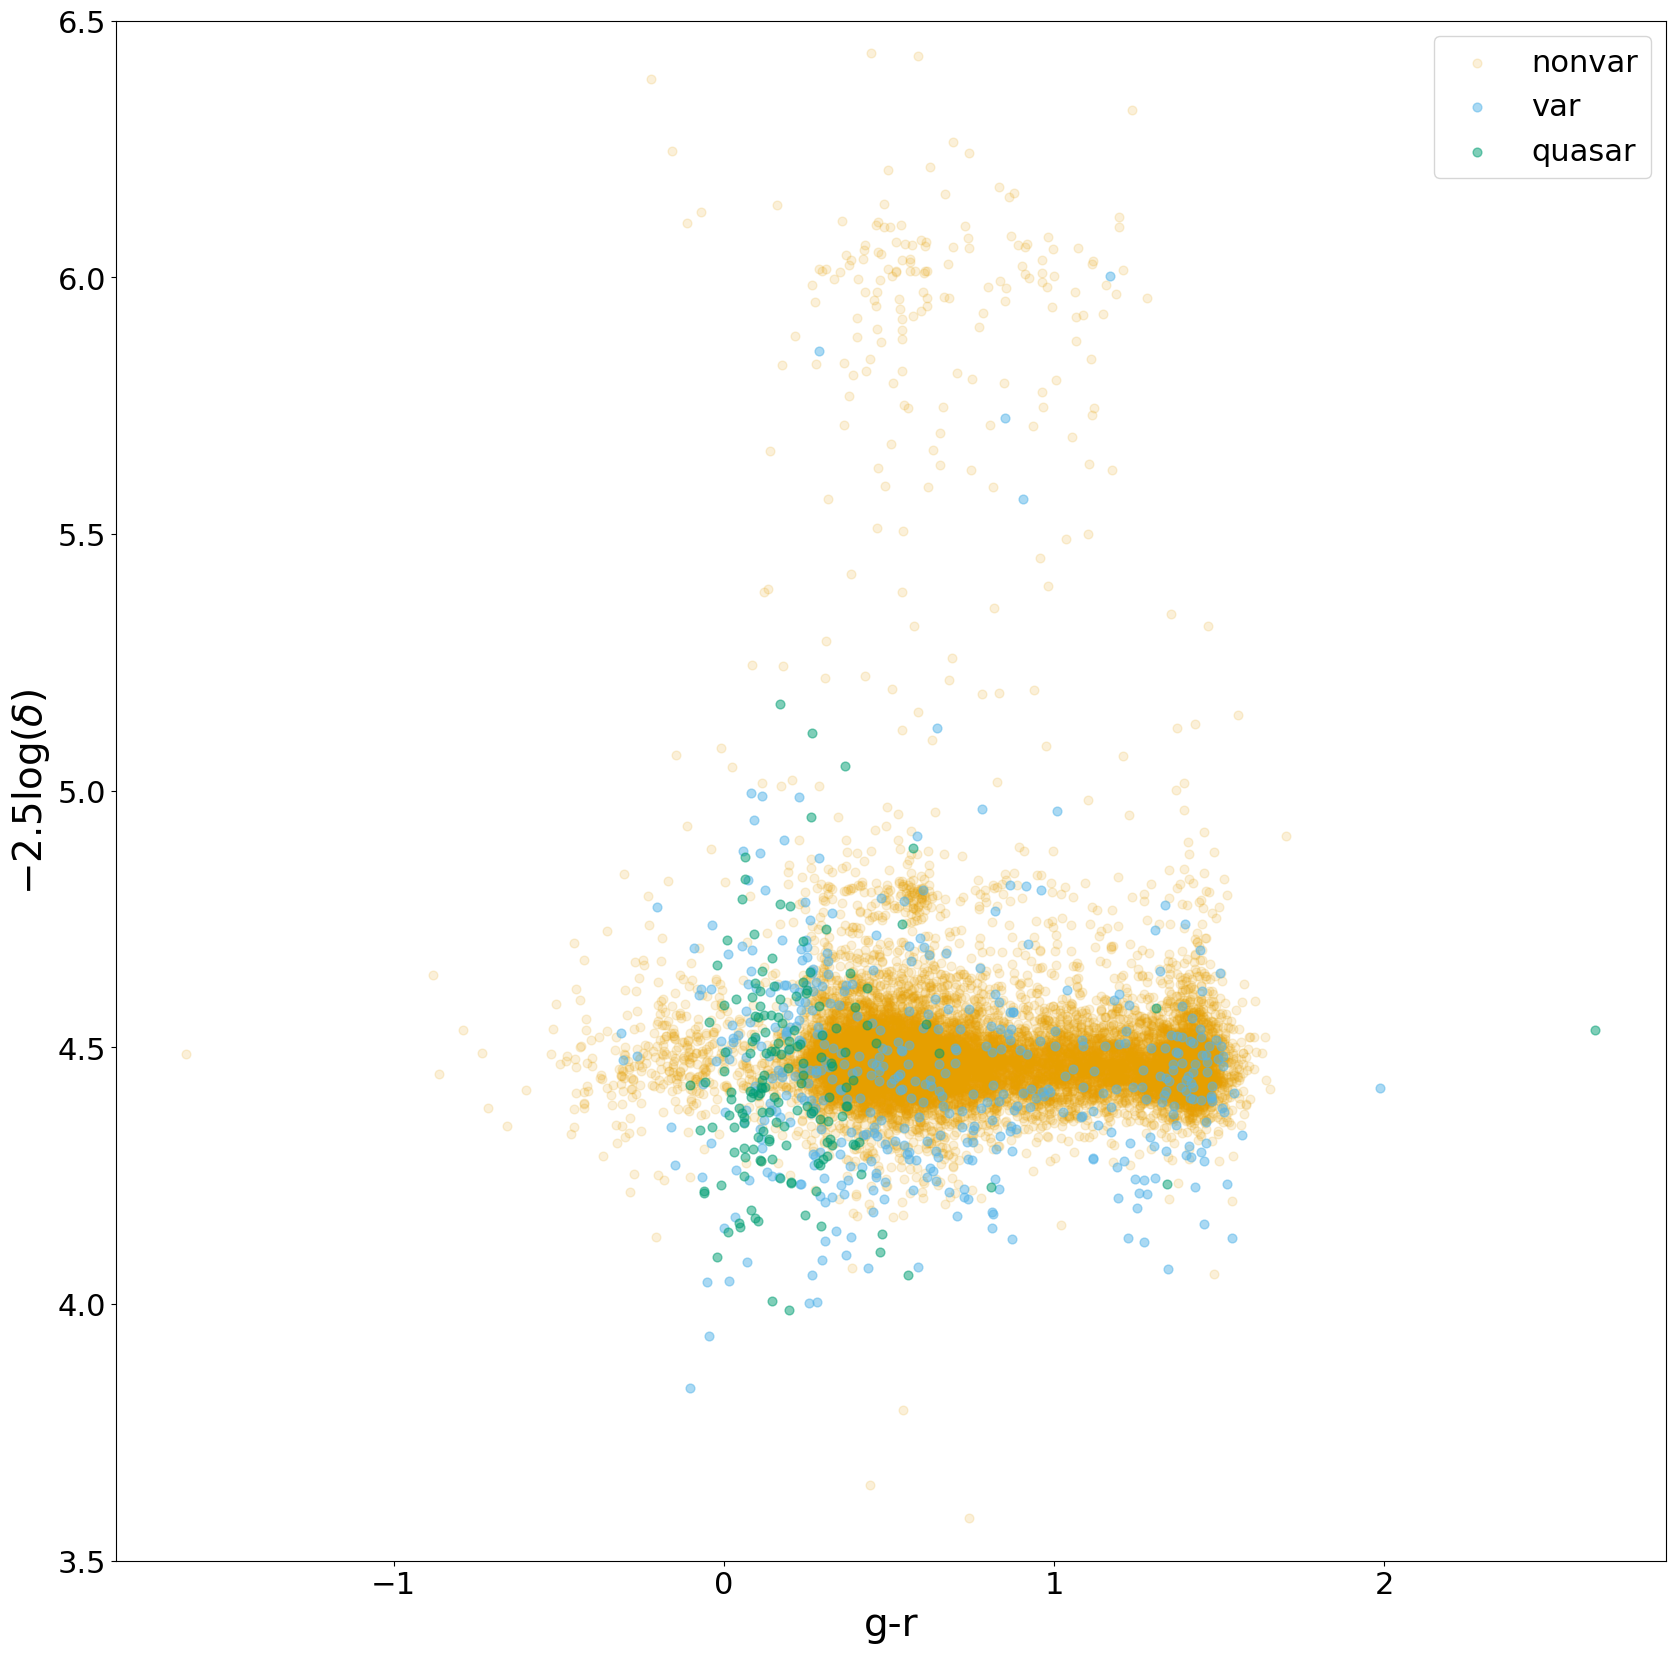

In [93]:
plt.figure(figsize=(20, 20))

plt.ylim(3.5, 6.5)

plt.xlabel('g-r')
plt.ylabel('$-2.5 \\log(\\delta$)')

plt.scatter(gMr(nonvar_subset), m(nonvar_subset[d_MEDIAN_COLNAME]), c=C_ORANGE,  s=S, label='nonvar', alpha=AN)
plt.scatter(gMr(var_subset),    m(var_subset[d_MEDIAN_COLNAME]),    c=C_BLUE,    s=S, label='var',    alpha=AV)
plt.scatter(gMr(quasar_subset), m(quasar_subset[d_MEDIAN_COLNAME]), c=C_GREEN,   s=S, label='quasar', alpha=AV)

plt.legend()
plt.show()

# color-color

In [6]:
TITLES = [['all', 'nonvar'], ['var', 'quasar']]

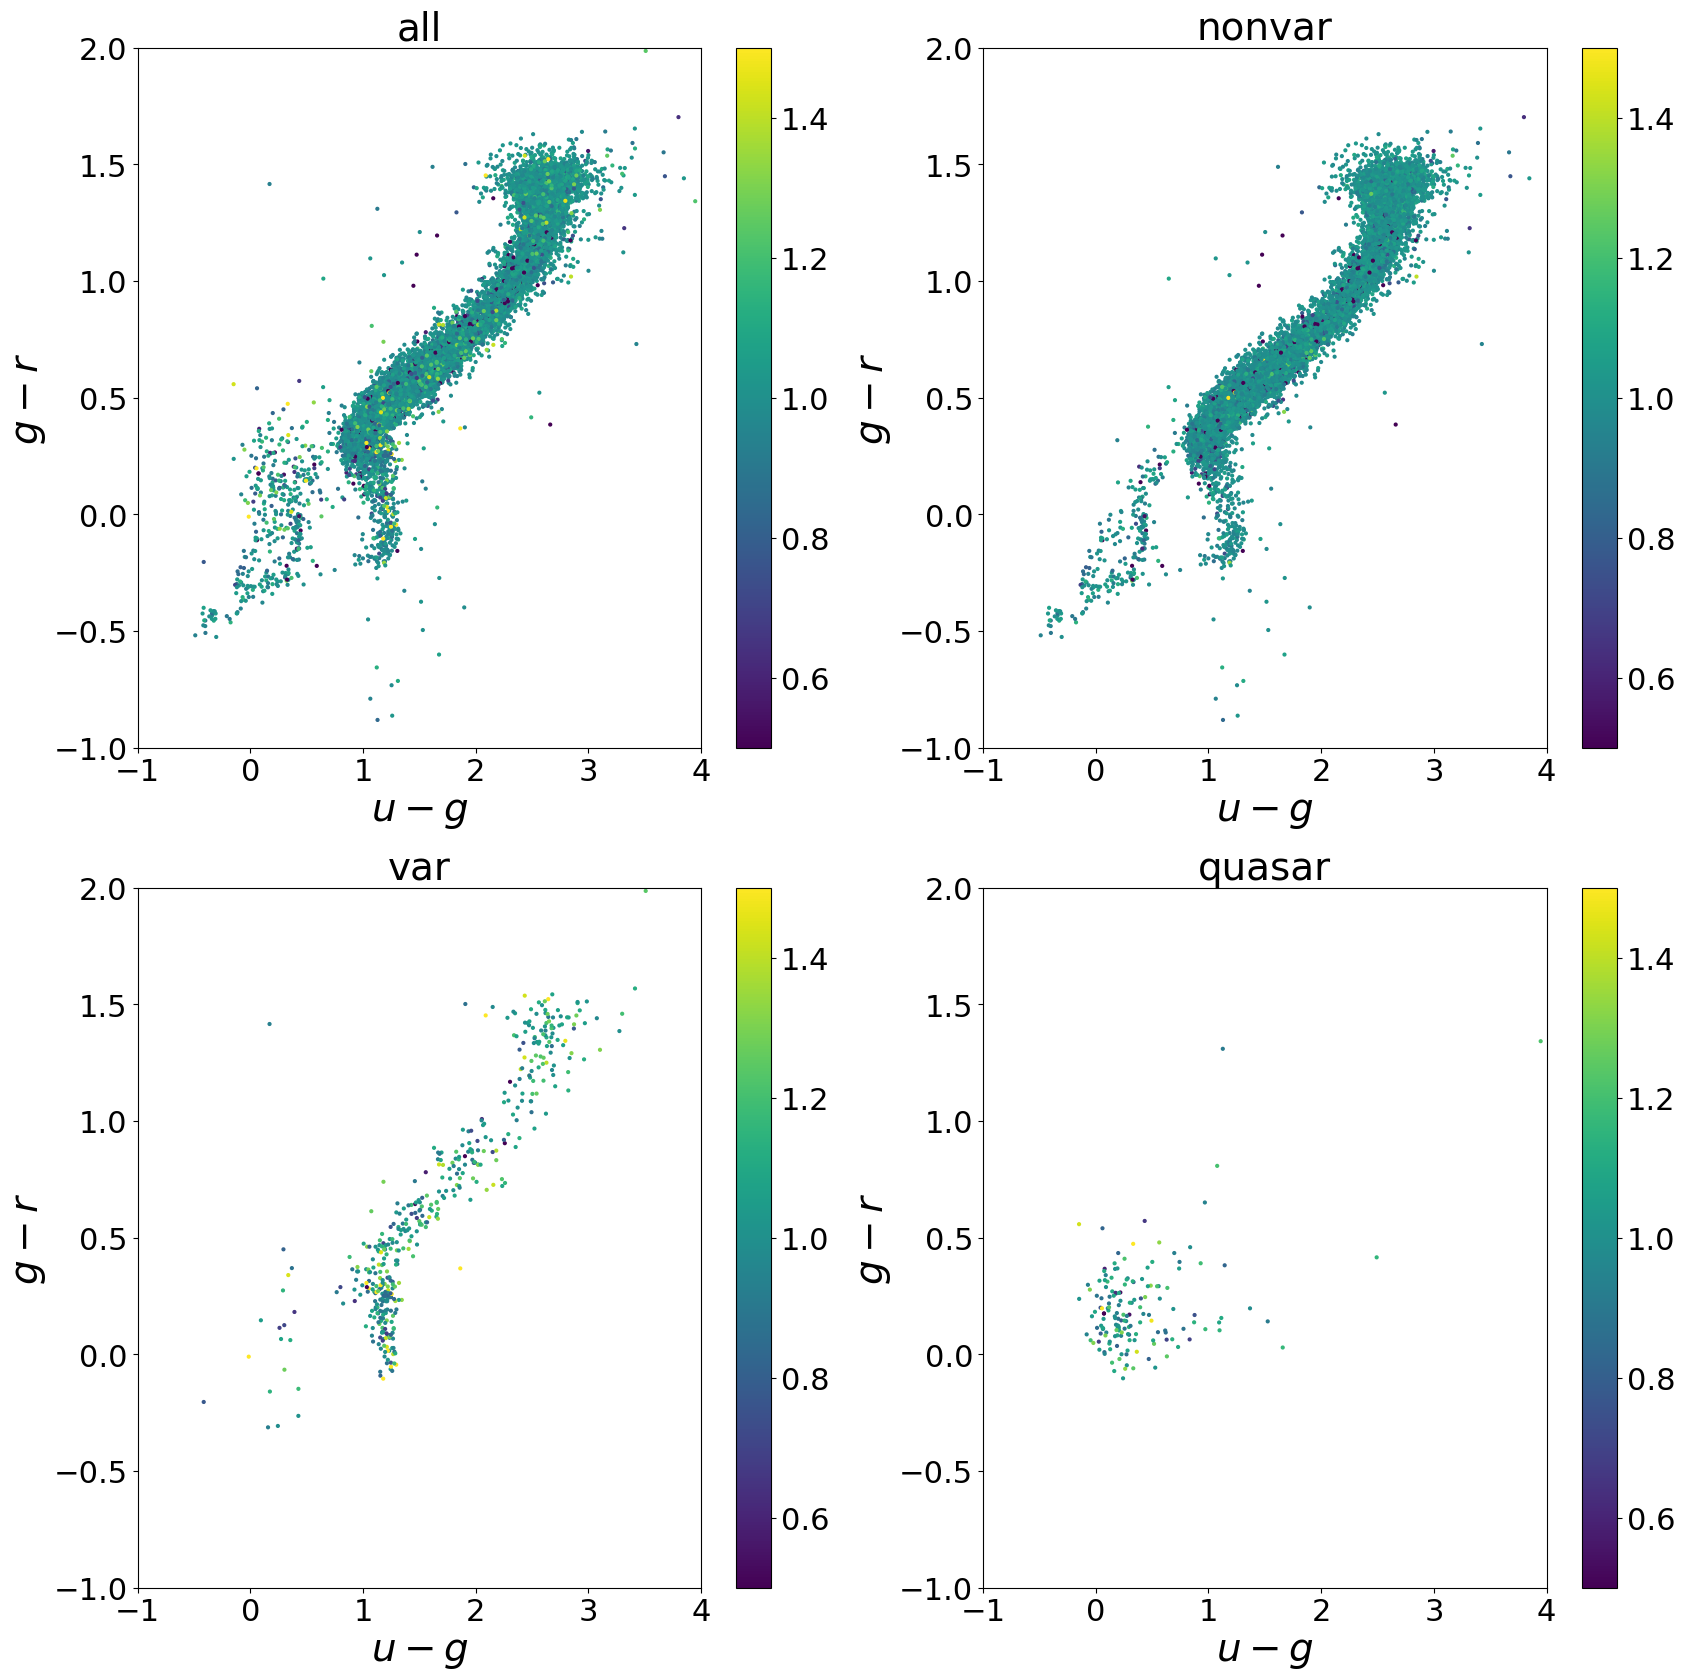

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

S_cc = 4
W_MAX = 1.2
W_MIN = 0.8

for i in (0, 1):
    for j in (0, 1):
        ax[i][j].set_xlabel('$u-g$')
        ax[i][j].set_ylabel('$g-r$')
        ax[i][j].set_xlim(-1, 4)
        ax[i][j].set_ylim(-1, 2)
        ax[i][j].set_title(TITLES[i][j])

unambi_subset = pd.concat([nonvar_subset, var_subset, quasar_subset])

sc = ax[0][0].scatter(uMg(unambi_subset), gMr(unambi_subset), s=S_cc, label='all',
                      cmap='viridis', c=unambi_subset[W_MEDIAN_COLNAME], vmin=W_MIN, vmax=W_MAX)
plt.colorbar(sc)

sc = ax[0][1].scatter(uMg(nonvar_subset), gMr(nonvar_subset), s=S_cc, label='all',
                      cmap='viridis', c=nonvar_subset[W_MEDIAN_COLNAME], vmin=W_MIN, vmax=W_MAX)
plt.colorbar(sc)

sc = ax[1][0].scatter(uMg(var_subset), gMr(var_subset), s=S_cc, label='all',
                      cmap='viridis', c=var_subset[W_MEDIAN_COLNAME], vmin=W_MIN, vmax=1.5)
plt.colorbar(sc)

sc = ax[1][1].scatter(uMg(quasar_subset), gMr(quasar_subset), s=S_cc, label='all',
                      cmap='viridis', c=quasar_subset[W_MEDIAN_COLNAME], vmin=0.5, vmax=1.5)
plt.colorbar(sc)

# plt.scatter(uMg(nonvar_subset), gMr(nonvar_subset), c=C_ORANGE,  s=S, label='nonvar', alpha=AN)
# plt.scatter(uMg(var_subset),    gMr(var_subset),    c=C_BLUE,    s=S, label='var',    alpha=AV)
# plt.scatter(uMg(quasar_subset), gMr(quasar_subset), c=C_GREEN,   s=S, label='quasar', alpha=AV)

plt.show()

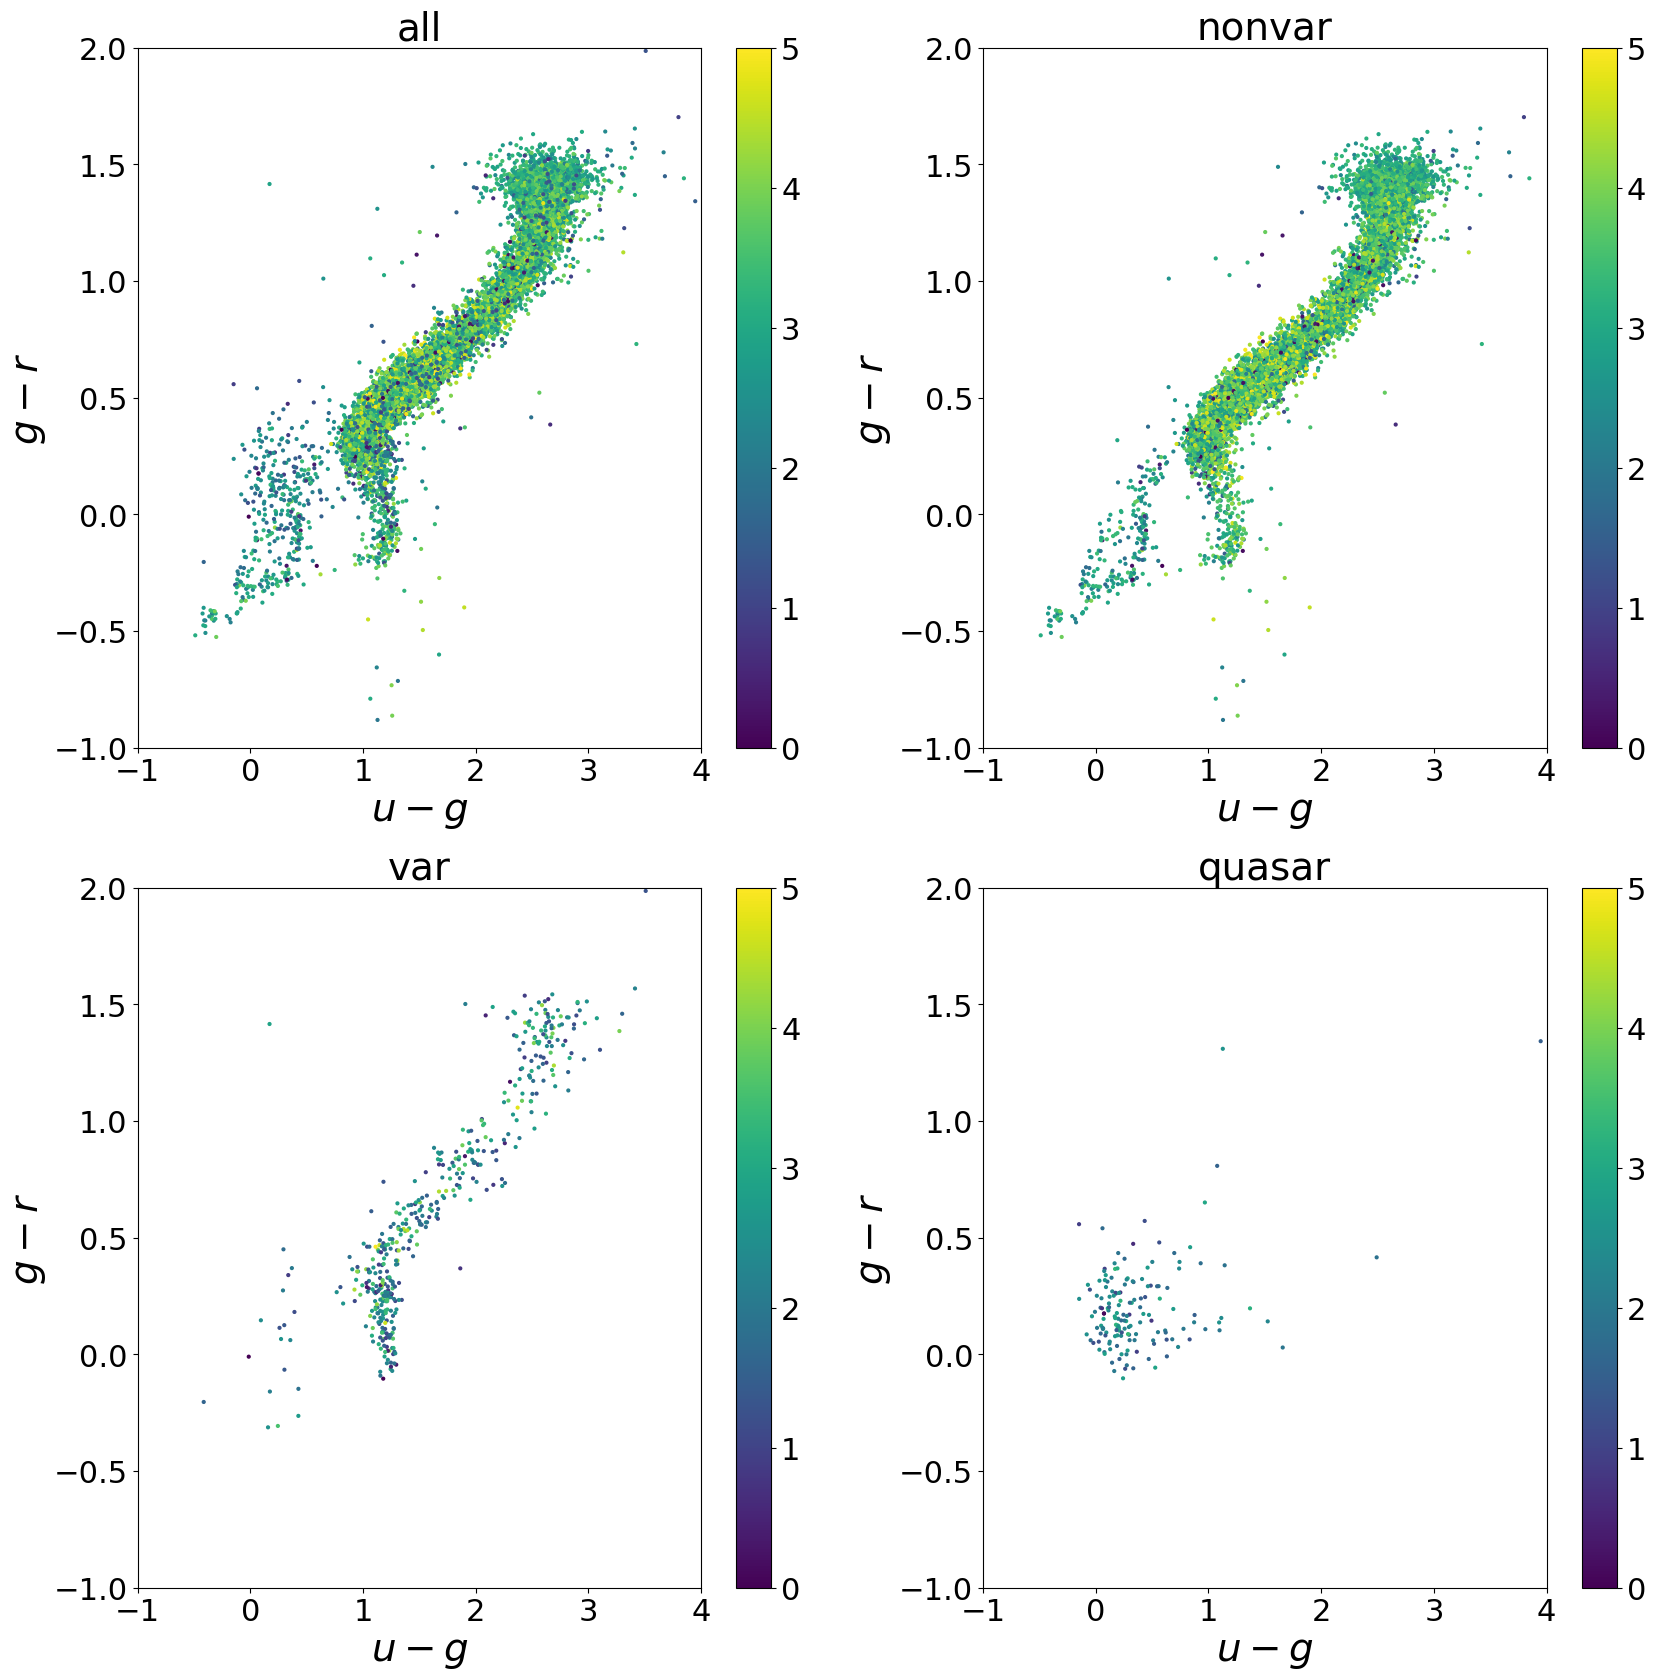

In [190]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

for i in (0, 1):
    for j in (0, 1):
        ax[i][j].set_xlabel('$u-g$')
        ax[i][j].set_ylabel('$g-r$')
        ax[i][j].set_xlim(-1, 4)
        ax[i][j].set_ylim(-1, 2)
        ax[i][j].set_title(TITLES[i][j])

unambi_subset = pd.concat([nonvar_subset, var_subset, quasar_subset])

sc = ax[0][0].scatter(uMg(unambi_subset), gMr(unambi_subset), s=S_cc, label='all', alpha=1,
                      cmap='viridis', c=m(unambi_subset[D_MEDIAN_COLNAME]), vmin=0, vmax=5)
plt.colorbar(sc)

sc = ax[0][1].scatter(uMg(nonvar_subset), gMr(nonvar_subset), s=S_cc, label='all', alpha=1,
                      cmap='viridis', c=m(nonvar_subset[D_MEDIAN_COLNAME]), vmin=0, vmax=5)
plt.colorbar(sc)

sc = ax[1][0].scatter(uMg(var_subset), gMr(var_subset), s=S_cc, label='all', alpha=1,
                      cmap='viridis', c=m(var_subset[D_MEDIAN_COLNAME]), vmin=0, vmax=5)
plt.colorbar(sc)

sc = ax[1][1].scatter(uMg(quasar_subset), gMr(quasar_subset), s=S_cc, label='all', alpha=1,
                      cmap='viridis', c=m(quasar_subset[D_MEDIAN_COLNAME]), vmin=0, vmax=5)
plt.colorbar(sc)

plt.show()

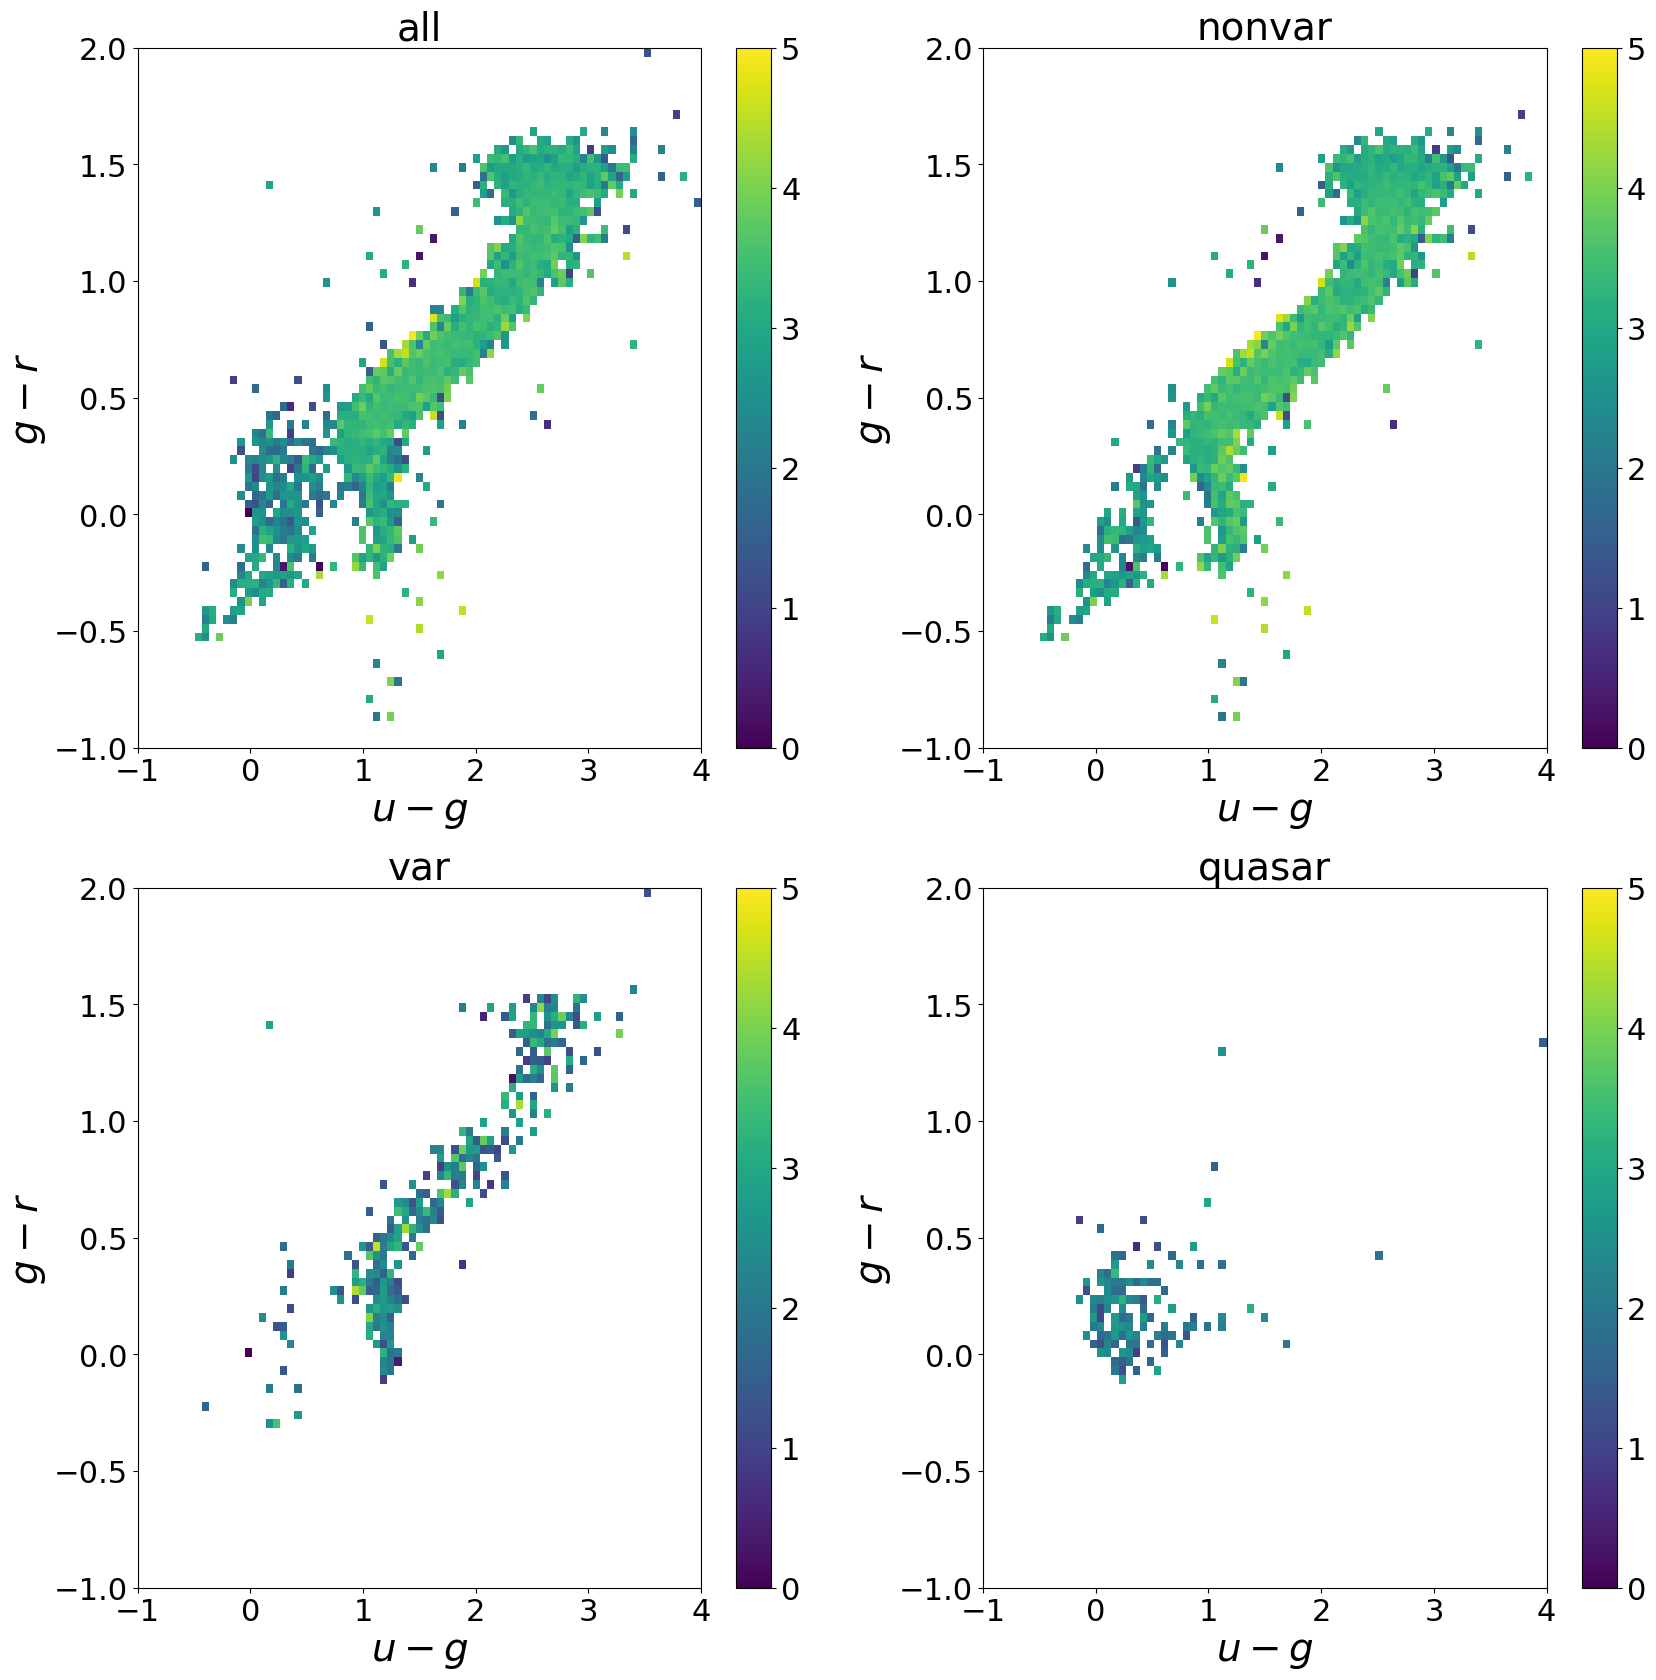

In [191]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

MIN_uMg = -1
MAX_uMg = 4
MIN_gMr = -1
MAX_gMr = 2
N_BINS = 80

bins_uMg = np.linspace(MIN_uMg, MAX_uMg, N_BINS)
bins_gMr = np.linspace(MIN_gMr, MAX_gMr, N_BINS)

# all
counts, _, _ = np.histogram2d(uMg(unambi_subset), gMr(unambi_subset), bins=(bins_uMg, bins_gMr))
sums,   _, _ = np.histogram2d(uMg(unambi_subset), gMr(unambi_subset), bins=(bins_uMg, bins_gMr),
                              weights=m(unambi_subset[D_MEDIAN_COLNAME]))
with np.errstate(divide='ignore', invalid='ignore'):
    mD = masked_invalid(sums/counts).T

mesh = ax[0][0].pcolormesh(bins_uMg, bins_gMr, mD, cmap='viridis',
                           vmin=0, vmax=5)
fig.colorbar(mesh)

# nonvar
counts, _, _ = np.histogram2d(uMg(nonvar_subset), gMr(nonvar_subset), bins=(bins_uMg, bins_gMr))
sums,   _, _ = np.histogram2d(uMg(nonvar_subset), gMr(nonvar_subset), bins=(bins_uMg, bins_gMr),
                              weights=m(nonvar_subset[D_MEDIAN_COLNAME]))
with np.errstate(divide='ignore', invalid='ignore'):
    mD = masked_invalid(sums/counts).T

mesh = ax[0][1].pcolormesh(bins_uMg, bins_gMr, mD, cmap='viridis',
                           vmin=0, vmax=5)
fig.colorbar(mesh)

# var
counts, _, _ = np.histogram2d(uMg(var_subset), gMr(var_subset), bins=(bins_uMg, bins_gMr))
sums,   _, _ = np.histogram2d(uMg(var_subset), gMr(var_subset), bins=(bins_uMg, bins_gMr),
                              weights=m(var_subset[D_MEDIAN_COLNAME]))
with np.errstate(divide='ignore', invalid='ignore'):
    mD = masked_invalid(sums/counts).T

mesh = ax[1][0].pcolormesh(bins_uMg, bins_gMr, mD, cmap='viridis',
                           vmin=0, vmax=5)
fig.colorbar(mesh)

# quasar
counts, _, _ = np.histogram2d(uMg(quasar_subset), gMr(quasar_subset), bins=(bins_uMg, bins_gMr))
sums,   _, _ = np.histogram2d(uMg(quasar_subset), gMr(quasar_subset), bins=(bins_uMg, bins_gMr),
                              weights=m(quasar_subset[D_MEDIAN_COLNAME]))
with np.errstate(divide='ignore', invalid='ignore'):
    mD = masked_invalid(sums/counts).T

mesh = ax[1][1].pcolormesh(bins_uMg, bins_gMr, mD, cmap='viridis',
                           vmin=0, vmax=5)
fig.colorbar(mesh)
    

for i in (0, 1):
    for j in (0, 1):
        ax[i][j].set_xlabel('$u-g$')
        ax[i][j].set_ylabel('$g-r$')
        ax[i][j].set_xlim(-1, 4)
        ax[i][j].set_ylim(-1, 2)
        ax[i][j].set_title(TITLES[i][j])

# plt.scatter(uMg(nonvar_subset), gMr(nonvar_subset), c=C_ORANGE,  s=S, label='nonvar', alpha=AN)
# plt.scatter(uMg(var_subset),    gMr(var_subset),    c=C_BLUE,    s=S, label='var',    alpha=AV)
# plt.scatter(uMg(quasar_subset), gMr(quasar_subset), c=C_GREEN,   s=S, label='quasar', alpha=AV)

plt.show()

# second mode

In [200]:
w_075_subset = nonvar_subset[(nonvar_subset[W_MEDIAN_COLNAME] < 0.77) & (nonvar_subset[W_MEDIAN_COLNAME] > 0.72) & (nonvar_subset[SGW_COLNAME] < 0.04)]
for objId in w_075_subset['objId']:
    print(objId)

1237656567042801734
1237663456705839238
1237663542606037272
1237663456705839294
1237663456704856307
1237663456704922066
1237657189815746724
1237656567042670631
1237663456705118457
1237656567042801765
1237663456705773612
1237657189815026244
1237656567042802188
1237657189815943438
1237663456704856194
1237657189815025894
1237663456704987259
1237656567042933063
1237656567586160705
1237657189815943175
1237663456705249449
1237656567042867322
1237663542606758031
1237663456704921795
1237656567043522730
1237656567043522645
1237656567042932752
1237663456704921812
1237657189815091311
1237657189815746666
1237657189814960210
1237663542605840627
1237663542605643971
1237663542606692519
1237663542605971688
1237663542606823965
1237663542606496012
1237663542605709375
1237663542605709456
1237663542606692568
1237663542606037398
1237663542606757946
1237663542605971884
1237663542606626965
1237663238741295309
1237663457242120356
1237666301094920400
1237663543679451606
1237663543142711359
1237663543142842541


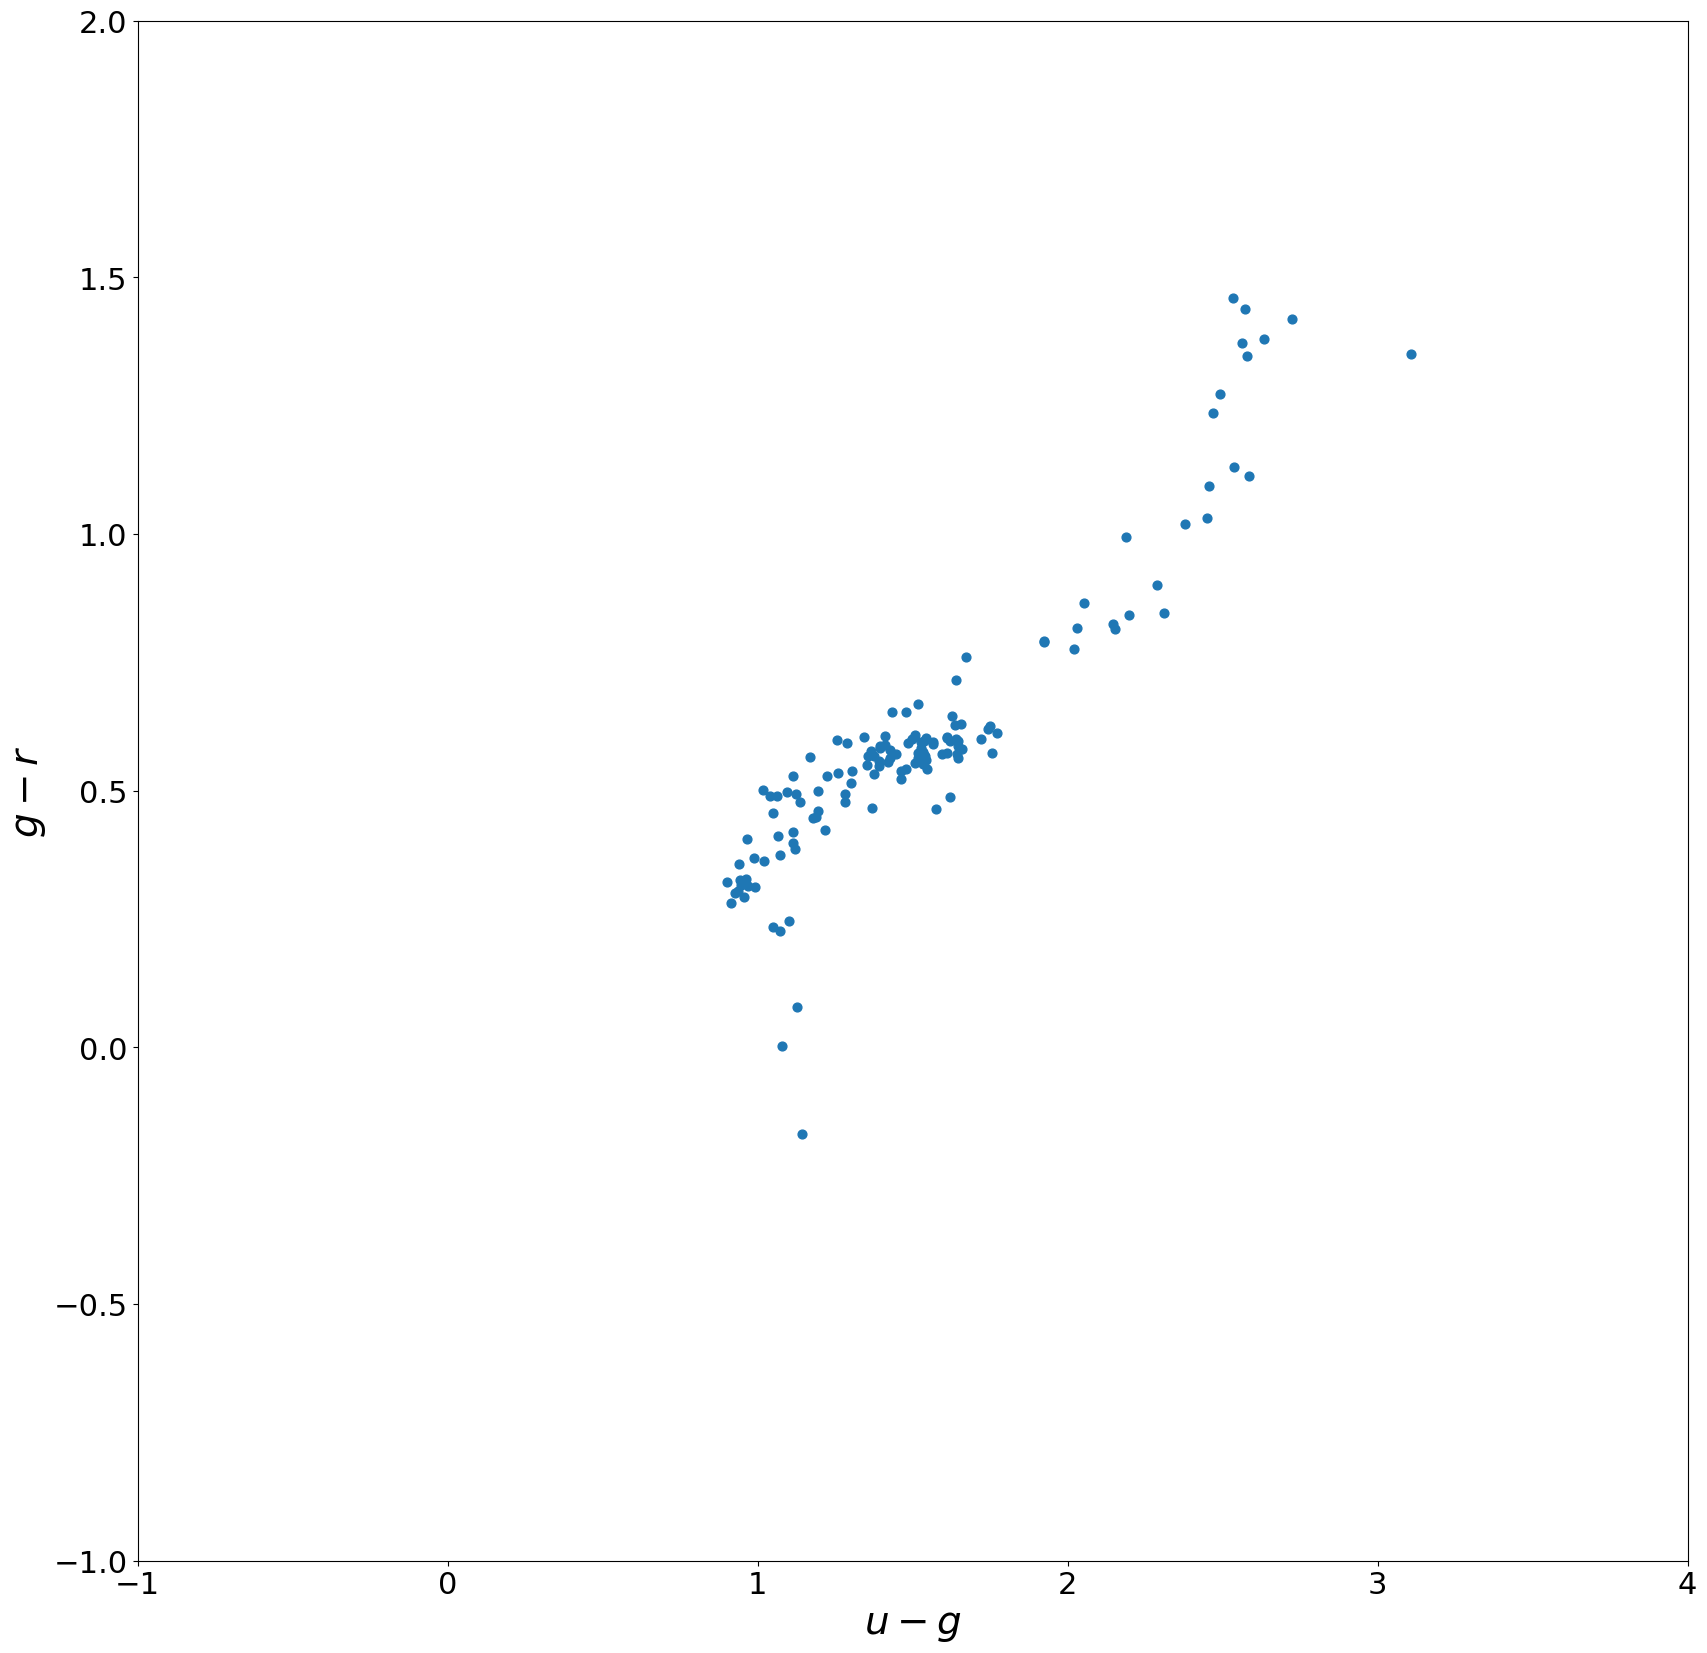

In [228]:
plt.figure(figsize=(20, 20))

plt.xlim(-1, 4)
plt.ylim(-1, 2)

plt.xlabel('$u-g$')
plt.ylabel('$g-r$')

plt.scatter(uMg(w_075_subset), gMr(w_075_subset), s=S)

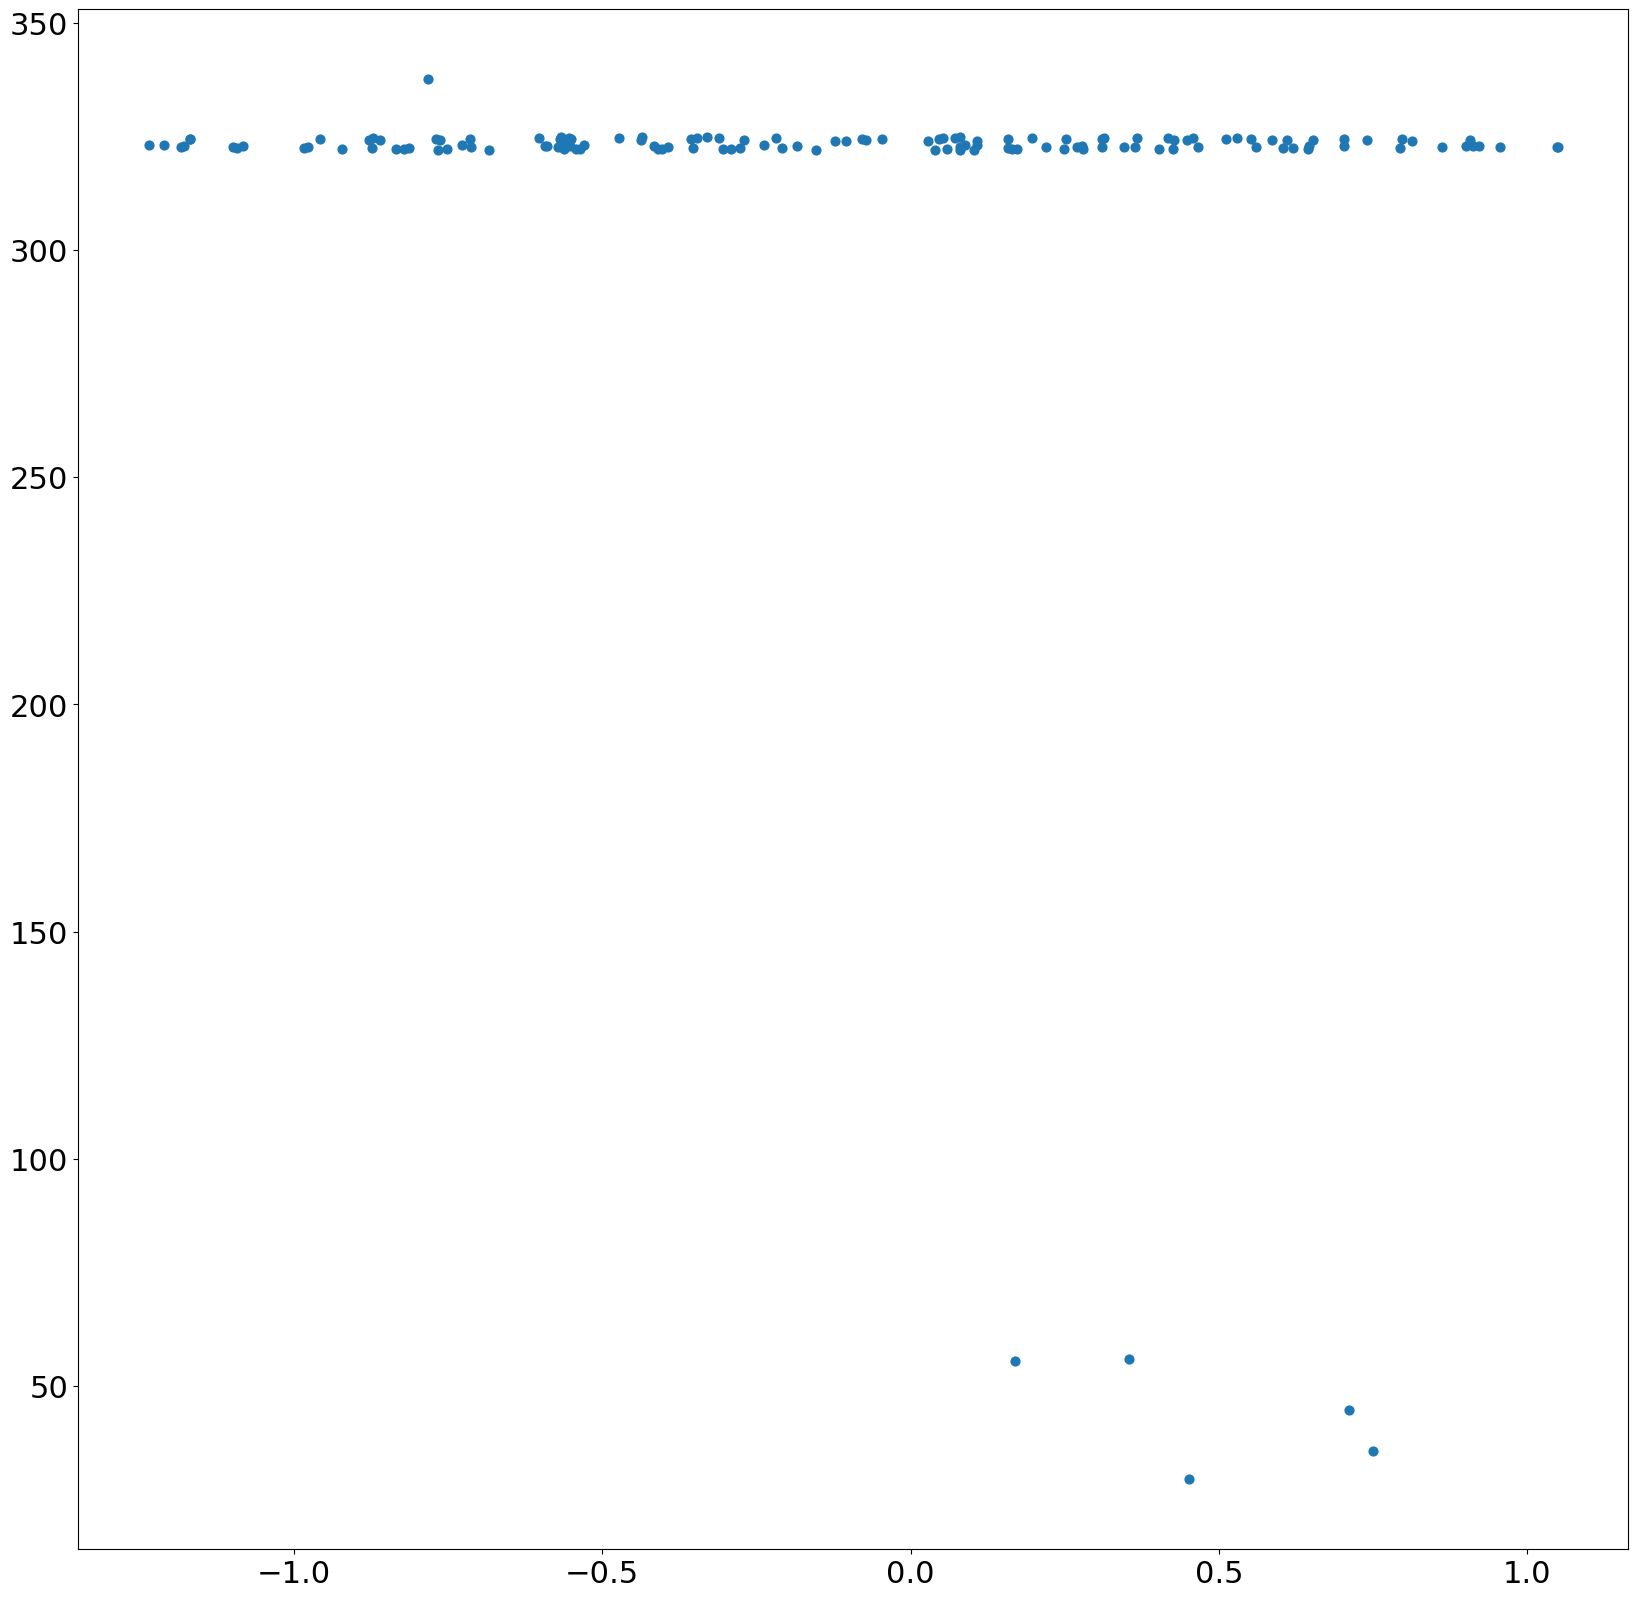

In [213]:
plt.figure(figsize=(20, 20))

plt.scatter(w_075_subset['gaia_dec'], w_075_subset['gaia_ra'], s=S)

In [215]:
list(w_075_subset['source_id'])

[2686786134260762112,
 2686660927373914880,
 2686913948191911680,
 2687036513673968128,
 2687552833167685760,
 2687539364150195584,
 2686664290332769536,
 2686777196433969152,
 2686817470342262144,
 2686784210115385728,
 2686674838772492672,
 2686807261204776448,
 2686737549590657152,
 2686983153000273280,
 2687556582674202112,
 2686779708989759872,
 2687559778129811328,
 2686734147976489600,
 2629989658536802432,
 2686607429261253632,
 2686895707469670784,
 2686739989132078080,
 2687044583917133312,
 2687564034442408704,
 2686594574423495296,
 2686594441280147328,
 2686733971882203392,
 2687539089272277504,
 2686802695654710016,
 2686665114966497024,
 2687533767807869824,
 2687572456873263360,
 2687582386837717760,
 2687056992078066304,
 2686912608162113536,
 2687043351262027392,
 2686867528185059328,
 2687582726140246528,
 2687583280190898176,
 2687060251957905920,
 2686914639686125184,
 2687045722083880192,
 2687664369173275008,
 2687054896133998848,
 3263672599427121024,
 268767697

In [217]:
from astroquery.gaia import Gaia

query = 'SELECT gs.source_id, gs.parallax, gs.pmra, gs.pmdec FROM gaiadr3.gaia_source gs \
         WHERE (gs.ra < 60 OR gs.ra > 300) AND (gs.dec > -1.67 AND gs.dec < 1.67) \
         AND gs.source_id IN ({})'.format(str(list(w_075_subset.source_id))[1:-1])

pdat = Gaia.launch_job_async(query).get_results().to_pandas()

INFO: Query finished. [astroquery.utils.tap.core]


In [218]:
pdat

source_id  parallax      pmra      pmdec
0         98754183803776  0.263292  0.082765  -2.801546
1    2501473791679968256  1.087927  5.079987 -11.176574
2    2507832984682927104  0.477292  5.710709  -1.377583
3    2629989658536802432  0.902646  3.516580 -17.295591
4    2686594441280147328  0.624372  4.138652  -9.760126
..                   ...       ...       ...        ...
131  2688392211511534848  0.321438 -7.131510  -5.224855
132  2688399152178486016  0.608379  7.209241  -2.843678
133  2688399942452480512  0.713719  3.672913  -6.254895
134  3263672599427121024  0.396241  9.330526  -0.377793
135  3269684320987088768  0.296477  3.260536  -0.533708

[136 rows x 4 columns]

In [221]:
w_075_subset = pd.merge(w_075_subset, pdat, left_on='source_id', right_on='source_id')

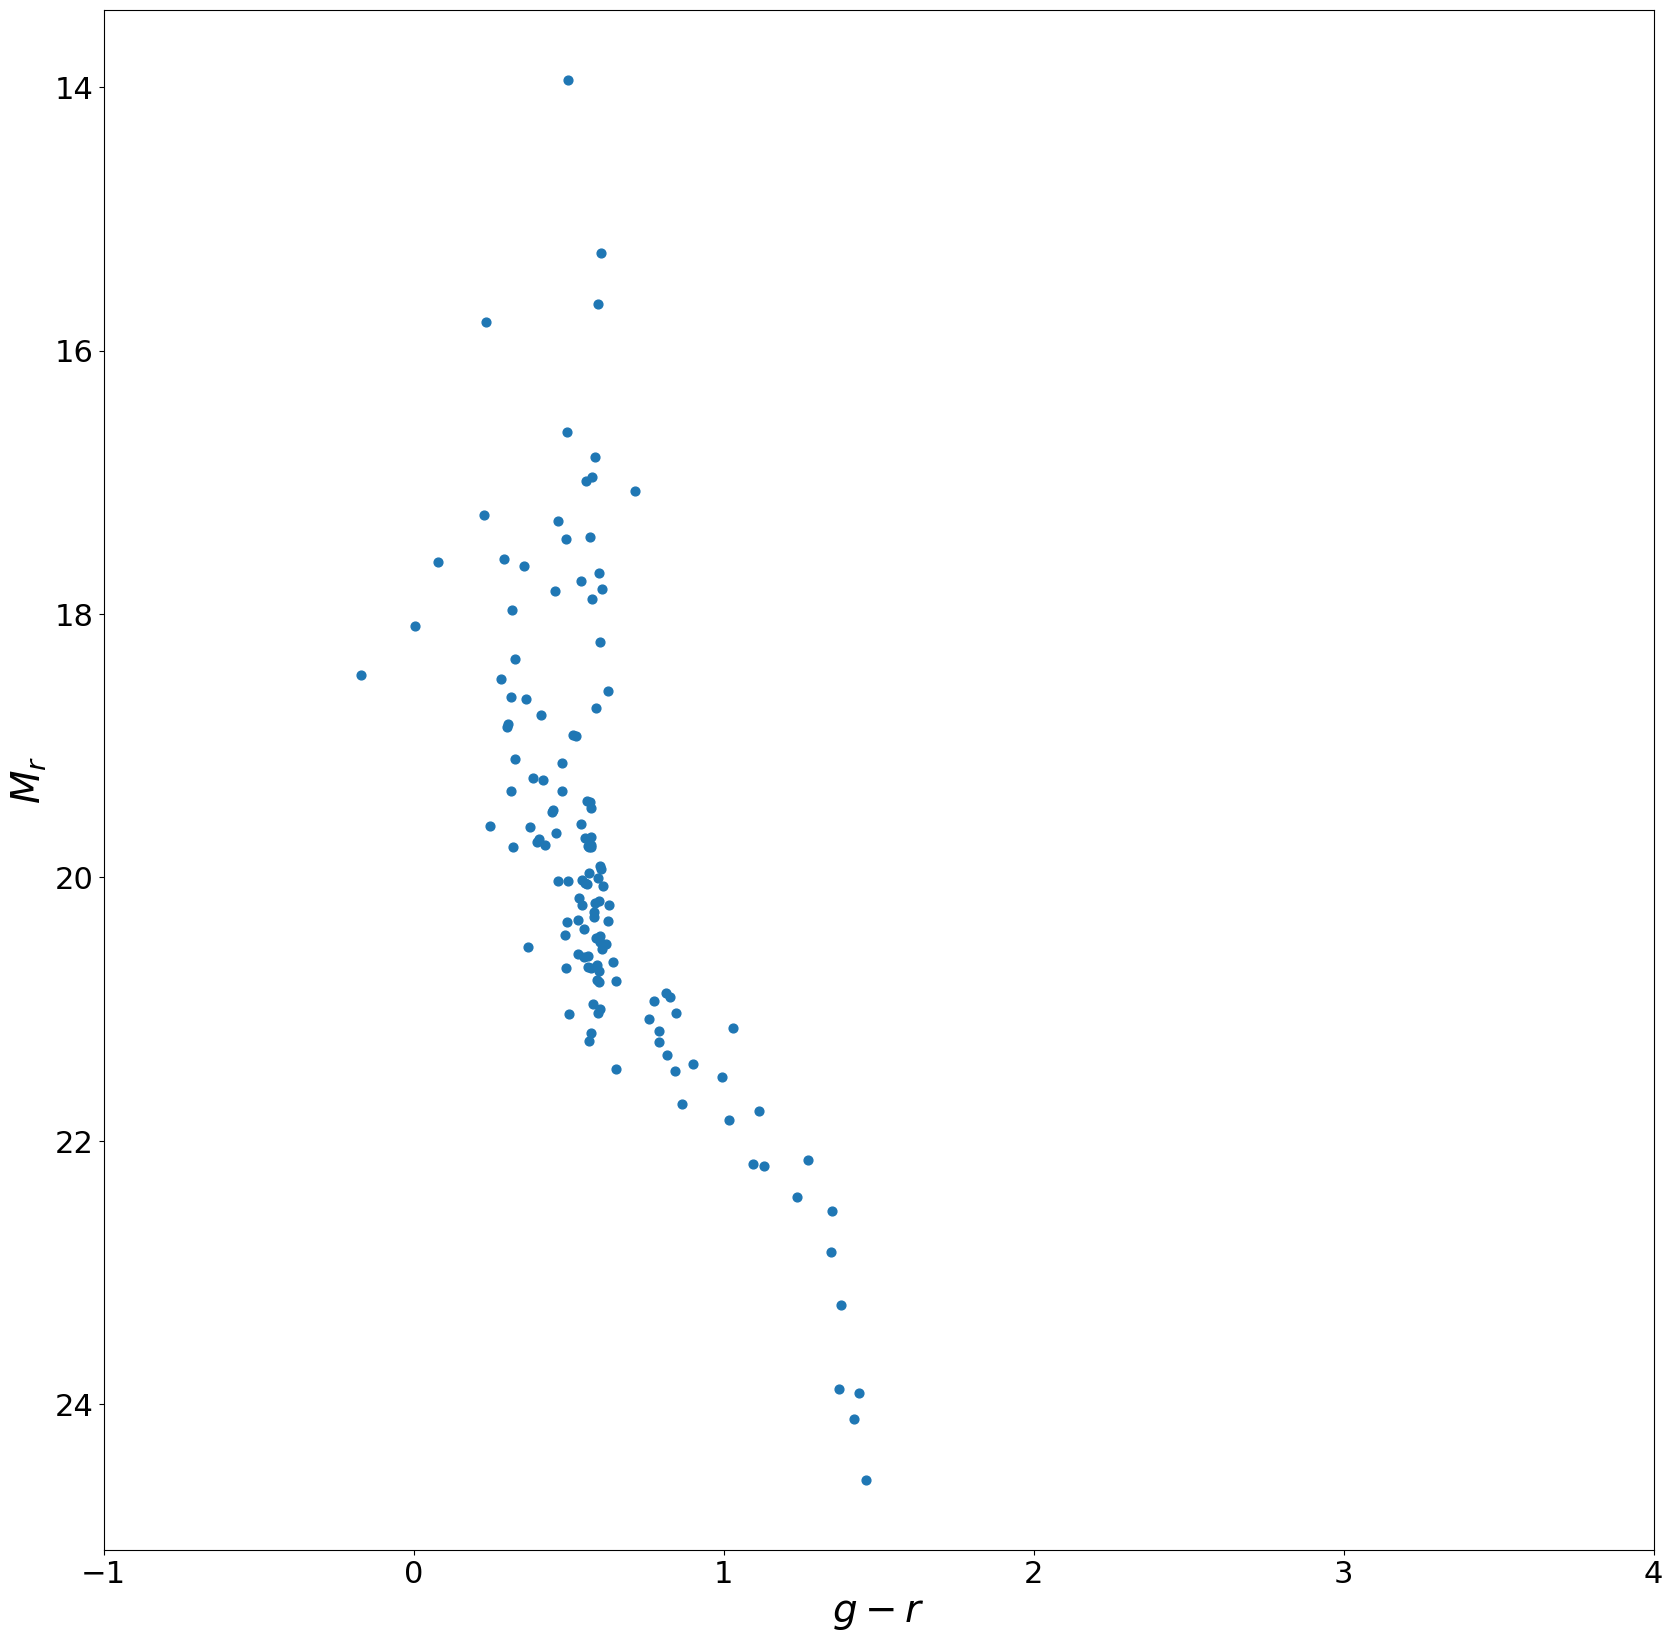

In [229]:
mag_abs = w_075_subset[R_MAG_COLNAME] + 5 + 5*np.log10(w_075_subset['parallax'])

plt.figure(figsize=(20, 20))

plt.xlim(-1, 4)
plt.gca().invert_yaxis()

plt.xlabel('$g-r$')
plt.ylabel('$M_r$')

plt.scatter(gMr(w_075_subset), mag_abs, s=S)